In [1]:
import os
import tweepy as tw
import pandas as pd
from tweepy.parsers import JSONParser
import matplotlib.pyplot as plt
from jsonschema import validate
import numpy as np
import pytz
from datetime import datetime
from dateutil import tz
import glob
from scipy.interpolate import make_interp_spline, BSpline
import pylab
from scipy.optimize import curve_fit
import seaborn as sns

In [4]:
tweets = pd.read_json('/Users/rajesh/Desktop/output-dec15.json', lines=True)

In [5]:
us_tweets = pd.DataFrame(tweets)

In [6]:
us_tweets.shape

(6575473, 19)

In [7]:
us_tweets.to_csv('/Users/rajesh/Desktop/Tweets_data_dec.csv',index=False);

In [2]:
us_tweets = pd.read_csv('/Users/rajesh/Desktop/DSF_ALL_Tweets_CSV/Tweets_data_sep.csv', lineterminator='\n')

In [3]:
us_tweets.head()

created_at                                        description  \
0  2014-02-14 06:04:23.000                                                NaN   
1  2012-08-23 04:13:17.000                                 ! @Caddyshackkk ❤️   
2  2009-03-06 23:00:52.000  I am the news director for JCK and http://JCKo...   
3  2015-01-22 06:25:49.000                                   pizza is life ❤️   
4  2014-04-14 09:50:01.000  Find The Latest Content On The Web Right Here....   

   favourites_count  followers_count  friends_count  geo_enabled          id  \
0                17              783           1772        False  2343137456   
1              1218              131             99         True   775128450   
2               664             4807           1105        False    23132392   
3               728              268            152         True  2991949368   
4               139             2074           2235        False  2443645346   

       id_str lang  listed_count            location             name  \
0  2343137456   en          51.0         Memphis, TN  Wyshawn Herrema   
1   775128450   en           1.0         Meriden, Ct   #Pussyassbitch   
2    23132392   en         167.0  New York, New York         Robbates   
3  2991949368   en           1.0     Kansas City, KS    keniaa abigal   
4  2443645346   en           1.0       New York, USA    WorldStarGang   

   protected    screen_name  statuses_count time_zone  \
0      False    kituwykegug          104757   Yakutsk   
1      False       Bk_Pipes            2900       NaN   
2      False    robbatesjck            9807     Quito   
3      False      abigaaal_            6663       NaN   
4      False  WorldStarGang              62    London   

              timestamp_ms  utc_offset  verified  
0  2015-09-01 00:00:43.658     32400.0     False  
1  2015-09-01 00:00:44.666         NaN     False  
2  2015-09-01 00:00:44.661    -18000.0     False  
3  2015-09-01 00:00:45.664         NaN     False  
4  2015-09-01 00:00:45.664      3600.0     False

In [4]:
us_tweets.tail()

created_at  \
6248951  2015-06-10 23:11:28.000   
6248952  2011-11-12 22:58:22.000   
6248953  2013-05-07 19:08:17.000   
6248954  2015-09-21 23:11:56.000   
6248955  2011-03-08 17:52:04.000   

                                               description  favourites_count  \
6248951  you have to be able to smile through the bullshit               212   
6248952  I watch a lot of sports, play a few and have w...               122   
6248953  @FanSided NY Jets Editor of http://TheJetPress...               227   
6248954                                         i am actor              1111   
6248955  Journalist/Author of CALL FOR TRANSNATIONAL JI...               450   

         followers_count  friends_count  geo_enabled          id      id_str  \
6248951               82            184        False  3318092801  3318092801   
6248952              344            220         True   411055165   411055165   
6248953             3699           4060        False  1411004539  1411004539   
6248954              242           1778        False  3732956002  3732956002   
6248955             5302            428        False   262751844   262751844   

        lang  listed_count         location             name  protected  \
6248951   en           0.0     Westland, MI   Brandon Conley      False   
6248952   en           7.0           Peoria    Josh Wessler       False   
6248953   en         112.0       Queens, NY  Luis Tirado Jr.      False   
6248954   en           5.0  Los Angeles, CA   Demetre hunter      False   
6248955   en          21.0              USA       Arif Jamal      False   

             screen_name  statuses_count                   time_zone  \
6248951  brandonjconley1             203                         NaN   
6248952      joshwessler            1977                         NaN   
6248953            LTJ81           61309  Eastern Time (US & Canada)   
6248954   demetrejaw4122             752                         NaN   
6248955     ArifJamalUSA            1226  Eastern Time (US & Canada)   

                    timestamp_ms  utc_offset  verified  
6248951  2015-10-01 00:00:59.658         NaN     False  
6248952  2015-10-01 00:00:59.663         NaN     False  
6248953  2015-10-01 00:01:00.658    -14400.0     False  
6248954  2015-10-01 00:01:00.666         NaN     False  
6248955  2015-10-01 00:01:00.662    -14400.0     False

In [5]:
us_tweets["timestamp_ms"] = pd.to_datetime(us_tweets["timestamp_ms"])

In [6]:
us_tweets["timestamp_ms"] = us_tweets["timestamp_ms"].astype('int64')

In [7]:
us_states_timezone = {'abilene': 'America/Chicago', 'ak': 'America/Anchorage', 'akron': 'America/New_York', 'al': 'America/Chicago', 'alabama': 'America/Chicago', 'alaska': 'America/Anchorage', 'albuquerque': 'America/Denver', 'alexandria': 'America/New_York', 'allen': 'America/Chicago', 'allentown': 'America/New_York', 'amarillo': 'America/Chicago', 'anaheim': 'America/Los_Angeles', 'anchorage': 'America/Anchorage', 'annarbor': 'America/New_York', 'antioch': 'America/Los_Angeles', 'ar': 'America/Chicago', 'arizona': 'America/Denver', 'arkansas': 'America/Chicago', 'arlington': 'America/Chicago', 'arvada': 'America/Denver', 'athens': 'America/New_York', 'atlanta': 'America/New_York', 'augusta': 'America/New_York', 'aurora': 'America/Denver', 'austin': 'America/Chicago', 'az': 'America/Denver', 'bakersfield': 'America/Los_Angeles', 'baltimore': 'America/New_York', 'batonrouge': 'America/Chicago', 'beaumont': 'America/Chicago', 'bellevue': 'America/Los_Angeles', 'berkeley': 'America/Los_Angeles', 'billings': 'America/Denver', 'birmingham': 'America/Chicago', 'boise': 'America/Denver', 'boston': 'America/New_York', 'boulder': 'America/Denver', 'bridgeport': 'America/New_York', 'brokenarrow': 'America/Chicago', 'brownsville': 'America/Chicago', 'buffalo': 'America/New_York', 'burbank': 'America/Los_Angeles', 'ca': 'America/Los_Angeles', 'california': 'America/Los_Angeles', 'cambridge': 'America/New_York', 'capecoral': 'America/New_York', 'carlsbad': 'America/Los_Angeles', 'carrollton': 'America/Chicago', 'cary': 'America/New_York', 'cedarrapids': 'America/Chicago', 'centennial': 'America/Denver', 'chandler': 'America/Denver', 'charleston': 'America/New_York', 'charlotte': 'America/New_York', 'chattanooga': 'America/New_York', 'chesapeake': 'America/New_York', 'chicago': 'America/Chicago', 'chulavista': 'America/Los_Angeles', 'cincinnati': 'America/New_York', 'clarksville': 'America/Chicago', 'clearwater': 'America/New_York', 'cleveland': 'America/New_York', 'clinton': 'America/New_York', 'clovis': 'America/Los_Angeles', 'co': 'America/Denver', 'collegestation': 'America/Chicago', 'colorado': 'America/Denver', 'coloradosprings': 'America/Denver', 'columbia': 'America/New_York', 'columbus': 'America/New_York', 'concord': 'America/New_York', 'connecticut': 'America/New_York', 'coralsprings': 'America/New_York', 'corona': 'America/Los_Angeles', 'corpuschristi': 'America/Chicago', 'costamesa': 'America/Los_Angeles', 'ct': 'America/New_York', 'dallas': 'America/Chicago', 'dalycity': 'America/Los_Angeles', 'davenport': 'America/Chicago', 'davie': 'America/New_York', 'dayton': 'America/New_York', 'de': 'America/New_York', 'delaware': 'America/New_York', 'denton': 'America/Chicago', 'denver': 'America/Denver', 'desmoines': 'America/Chicago', 'detroit': 'America/New_York', 'downey': 'America/Los_Angeles', 'durham': 'America/New_York', 'edison': 'America/New_York', 'elcajon': 'America/Los_Angeles', 'elgin': 'America/Chicago', 'elizabeth': 'America/New_York', 'elkgrove': 'America/Los_Angeles', 'elmonte': 'America/Los_Angeles', 'elpaso': 'America/Denver', 'escondido': 'America/Los_Angeles', 'eugene': 'America/Los_Angeles', 'evansville': 'America/Chicago', 'everett': 'America/Los_Angeles', 'fairfield': 'America/New_York', 'fargo': 'America/Chicago', 'fayetteville': 'America/New_York', 'fl': 'America/New_York', 'florida': 'America/New_York', 'fontana': 'America/Los_Angeles', 'fortcollins': 'America/Denver', 'fortlauderdale': 'America/New_York', 'fortwayne': 'America/New_York', 'fortworth': 'America/Chicago', 'fremont': 'America/Los_Angeles', 'fresno': 'America/Los_Angeles', 'frisco': 'America/Chicago', 'fullerton': 'America/Los_Angeles', 'ga': 'America/New_York', 'gainesville': 'America/New_York', 'gardengrove': 'America/Los_Angeles', 'garland': 'America/Chicago', 'georgia': 'America/New_York', 'gilbert': 'America/Denver', 'glendale': 'America/Denver', 'grandprairie': 'America/Chicago', 'grandrapids': 'America/New_York', 'greeley': 'America/Denver', 'greenbay': 'America/Chicago', 'greensboro': 'America/New_York', 'gresham': 'America/Los_Angeles', 'hampton': 'America/New_York', 'hartford': 'America/New_York', 'hawaii': 'Pacific/Honolulu', 'hayward': 'America/Los_Angeles', 'henderson': 'America/Los_Angeles', 'hi': 'Pacific/Honolulu', 'hialeah': 'America/New_York', 'highpoint': 'America/New_York', 'hillsboro': 'America/Los_Angeles', 'hollywood': 'America/Los_Angeles', 'honolulu': 'Pacific/Honolulu', 'houston': 'America/Chicago', 'huntingtonbeach': 'America/Los_Angeles', 'huntsville': 'America/Chicago', 'ia': 'America/Chicago', 'id': 'America/Denver', 'idaho': 'America/Los_Angeles', 'il': 'America/Chicago', 'illinois': 'America/Chicago', 'in': 'America/New_York', 'independence': 'America/Chicago', 'indiana': 'America/New_York', 'indianapolis': 'America/New_York', 'inglewood': 'America/Los_Angeles', 'iowa': 'America/Chicago', 'irvine': 'America/Los_Angeles', 'irving': 'America/Chicago', 'jackson': 'America/Chicago', 'jacksonville': 'America/New_York', 'jerseycity': 'America/New_York', 'joliet': 'America/Chicago', 'jurupavalley': 'America/Los_Angeles', 'kansas': 'America/Chicago', 'kansascity': 'America/Chicago', 'kenosha': 'America/Chicago', 'kent': 'America/New_York', 'kentucky': 'America/New_York', 'killeen': 'America/Chicago', 'knoxville': 'America/New_York', 'ks': 'America/Chicago', 'ky': 'America/New_York', 'la': 'America/Los_Angeles', 'lafayette': 'America/Chicago', 'lakeland': 'America/New_York', 'lakewood': 'America/Denver', 'lancaster': 'America/New_York', 'lansing': 'America/New_York', 'laredo': 'America/Chicago', 'lascruces': 'America/Denver', 'lasvegas': 'America/Los_Angeles', 'leaguecity': 'America/Chicago', 'lewisville': 'America/Chicago', 'lexington': 'America/New_York', 'lincoln': 'America/Chicago', 'littlerock': 'America/Chicago', 'longbeach': 'America/Los_Angeles', 'losangeles': 'America/Los_Angeles', 'louisiana': 'America/Chicago', 'louisville': 'America/New_York', 'lowell': 'America/New_York', 'lubbock': 'America/Chicago', 'ma': 'America/New_York', 'macon': 'America/New_York', 'madison': 'America/Chicago', 'maine': 'America/New_York', 'manchester': 'America/New_York', 'maryland': 'America/New_York', 'massachusetts': 'America/New_York', 'mcallen': 'America/Chicago', 'mckinney': 'America/Chicago', 'md': 'America/New_York', 'me': 'America/New_York', 'memphis': 'America/Chicago', 'meridian': 'America/Chicago', 'mesa': 'America/Denver', 'mesquite': 'America/Los_Angeles', 'mi': 'America/New_York', 'miami': 'America/New_York', 'miamigardens': 'America/New_York', 'michigan': 'America/New_York', 'midland': 'America/Chicago', 'milwaukee': 'America/Chicago', 'minneapolis': 'America/Chicago', 'minnesota': 'America/Chicago', 'miramar': 'America/New_York', 'mississippi': 'America/Chicago', 'missouri': 'America/Chicago', 'mn': 'America/Chicago', 'mo': 'America/Chicago', 'mobile': 'America/Chicago', 'modesto': 'America/Los_Angeles', 'montana': 'America/Denver', 'montgomery': 'America/Chicago', 'morenovalley': 'America/Los_Angeles', 'ms': 'America/Chicago', 'mt': 'America/Denver', 'murfreesboro': 'America/Chicago', 'murrieta': 'America/Los_Angeles', 'naperville': 'America/Chicago', 'nashville': 'America/Chicago', 'nc': 'America/New_York', 'nd': 'America/Chicago', 'ne': 'America/Chicago', 'nebraska': 'America/Chicago', 'nevada': 'America/Los_Angeles', 'newark': 'America/New_York', 'newhampshire': 'America/New_York', 'newhaven': 'America/New_York', 'newjersey': 'America/New_York', 'newmexico': 'America/Denver', 'neworleans': 'America/Chicago', 'newportnews': 'America/New_York', 'newyork': 'America/New_York', 'nh': 'America/New_York', 'nj': 'America/New_York', 'nm': 'America/Denver', 'norfolk': 'America/New_York', 'norman': 'America/Chicago', 'northcarolina': 'America/New_York', 'northcharleston': 'America/New_York', 'northdakota': 'America/Chicago', 'northlasvegas': 'America/Los_Angeles', 'norwalk': 'America/New_York', 'nv': 'America/Los_Angeles', 'ny': 'America/New_York', 'oakland': 'America/Los_Angeles', 'oceanside': 'America/Los_Angeles', 'odessa': 'America/Chicago', 'oh': 'America/New_York', 'ohio': 'America/New_York', 'ok': 'America/Chicago', 'oklahoma': 'America/Chicago', 'oklahomacity': 'America/Chicago', 'olathe': 'America/Chicago', 'omaha': 'America/Chicago', 'ontario': 'America/Los_Angeles', 'or': 'America/Los_Angeles', 'orange': 'America/Los_Angeles', 'oregon': 'America/Los_Angeles', 'orlando': 'America/New_York', 'overlandpark': 'America/Chicago', 'oxnard': 'America/Los_Angeles', 'pa': 'America/New_York', 'palmbay': 'America/New_York', 'palmdale': 'America/Los_Angeles', 'pasadena': 'America/Los_Angeles', 'paterson': 'America/New_York', 'pearland': 'America/Chicago', 'pembrokepines': 'America/New_York', 'pennsylvania': 'America/New_York', 'peoria': 'America/Chicago', 'philadelphia': 'America/New_York', 'phoenix': 'America/Denver', 'pittsburgh': 'America/New_York', 'plano': 'America/Chicago', 'pomona': 'America/Los_Angeles', 'pompanobeach': 'America/New_York', 'portland': 'America/Los_Angeles', 'portst.lucie': 'America/New_York', 'providence': 'America/New_York', 'provo': 'America/Denver', 'pueblo': 'America/Denver', 'raleigh': 'America/New_York', 'ranchocucamonga': 'America/Los_Angeles', 'reno': 'America/Los_Angeles', 'renton': 'America/Los_Angeles', 'rhodeisland': 'America/New_York', 'ri': 'America/New_York', 'rialto': 'America/Los_Angeles', 'richardson': 'America/Chicago', 'richmond': 'America/New_York', 'riverside': 'America/Los_Angeles', 'rochester': 'America/New_York', 'rockford': 'America/Chicago', 'roseville': 'America/Los_Angeles', 'roundrock': 'America/Chicago', 'sacramento': 'America/Los_Angeles', 'saintpaul': 'America/Chicago', 'salem': 'America/Los_Angeles', 'salinas': 'America/Los_Angeles', 'saltlakecity': 'America/Denver', 'sanangelo': 'America/Chicago', 'sanantonio': 'America/Chicago', 'sanbernardino': 'America/Los_Angeles', 'sandiego': 'America/Los_Angeles', 'sandysprings': 'America/New_York', 'sanfrancisco': 'America/Los_Angeles', 'sanjose': 'America/Los_Angeles', 'sanmateo': 'America/Los_Angeles', 'santaana': 'America/Los_Angeles', 'santaclara': 'America/Los_Angeles', 'santaclarita': 'America/Los_Angeles', 'santamaria': 'America/Los_Angeles', 'santarosa': 'America/Los_Angeles', 'savannah': 'America/New_York', 'sc': 'America/New_York', 'scottsdale': 'America/Denver', 'sd': 'America/Chicago', 'seattle': 'America/Los_Angeles', 'shreveport': 'America/Chicago', 'simivalley': 'America/Los_Angeles', 'siouxfalls': 'America/Chicago', 'southbend': 'America/New_York', 'southcarolina': 'America/New_York', 'southdakota': 'America/Chicago', 'sparks': 'America/Los_Angeles', 'spokane': 'America/Los_Angeles', 'springfield': 'America/Chicago', 'st.louis': 'America/Chicago', 'st.petersburg': 'America/New_York', 'stamford': 'America/New_York', 'sterlingheights': 'America/New_York', 'stockton': 'America/Los_Angeles', 'sugarland': 'America/Chicago', 'sunnyvale': 'America/Los_Angeles', 'surprise': 'America/Denver', 'syracuse': 'America/New_York', 'tacoma': 'America/Los_Angeles', 'tallahassee': 'America/New_York', 'tampa': 'America/New_York', 'temecula': 'America/Los_Angeles', 'tempe': 'America/Denver', 'tennessee': 'America/New_York', 'texas': 'America/Chicago', 'thornton': 'America/Denver', 'thousandoaks': 'America/Los_Angeles', 'tn': 'America/Chicago', 'toledo': 'America/New_York', 'topeka': 'America/Chicago', 'torrance': 'America/Los_Angeles', 'tucson': 'America/Denver', 'tulsa': 'America/Chicago', 'tuscaloosa': 'America/Chicago', 'tx': 'America/Chicago', 'tyler': 'America/Chicago', 'unitedstates': 'NA', 'unitedstatesofamerica': 'NA', 'us': 'NA', 'usa': 'NA', 'ut': 'America/Denver', 'utah': 'America/Denver', 'va': 'America/New_York', 'vacaville': 'America/Los_Angeles', 'vallejo': 'America/Los_Angeles', 'vancouver': 'America/Los_Angeles', 'ventura': 'America/Los_Angeles', 'vermont': 'America/New_York', 'victorville': 'America/Los_Angeles', 'virginia': 'America/New_York', 'virginiabeach': 'America/New_York', 'visalia': 'America/Los_Angeles', 'vista': 'America/Los_Angeles', 'vt': 'America/New_York', 'wa': 'America/New_York', 'waco': 'America/Chicago', 'warren': 'America/New_York', 'washington': 'America/Los_Angeles', 'waterbury': 'America/New_York', 'westcovina': 'America/Los_Angeles', 'westjordan': 'America/Denver', 'westminster': 'America/Denver', 'westpalmbeach': 'America/New_York', 'westvalleycity': 'America/Denver', 'westvirginia': 'America/New_York', 'wi': 'America/Chicago', 'wichita': 'America/Chicago', 'wichitafalls': 'America/Chicago', 'wilmington': 'America/New_York', 'winstonsalem': 'America/New_York', 'wisconsin': 'America/Chicago', 'woodbridge': 'America/New_York', 'worcester': 'America/New_York', 'wv': 'America/New_York', 'wy': 'America/Denver', 'wyoming': 'America/Denver', 'yonkers': 'America/New_York'}

us_cities_timezone = {'forthunt':'America/New_York','bessemer':'America/Chicago','paducah':'America/Chicago','birmingham':'America/Chicago','centerpoint':'America/Chicago','cullman':'America/Chicago','daphne':'America/Chicago','decatur':'America/Chicago','dothan':'America/Chicago','eastflorence':'America/Chicago','enterprise':'America/Chicago','fairhope':'America/Chicago','florence':'America/Chicago','foley':'America/Chicago','gadsden':'America/Chicago','helena':'America/Chicago','homewood':'America/Chicago','hoover':'America/Chicago','hueytown':'America/Chicago','huntsville':'America/Chicago','madison':'America/Chicago','millbrook':'America/Chicago','mobile':'America/Chicago','montgomery':'America/Chicago','mountainbrook':'America/Chicago','northport':'America/Chicago','opelika':'America/Chicago','oxford':'America/Chicago','pelham':'America/Chicago','phenixcity':'America/New_York','prattville':'America/Chicago','prichard':'America/Chicago','selma':'America/Chicago','talladega':'America/Chicago','tillmanscorner':'America/Chicago','troy':'America/Chicago','trussville':'America/Chicago','tuscaloosa':'America/Chicago','vestaviahills':'America/Chicago','bellavista':'America/Chicago','benton':'America/Chicago','bentonville':'America/Chicago','bryant':'America/Chicago','cabot':'America/Chicago','conway':'America/Chicago','eldorado':'America/Chicago','fayetteville':'America/Chicago','fortsmith':'America/Chicago','hotsprings':'America/Chicago','jacksonville':'America/Chicago','jonesboro':'America/Chicago','littlerock':'America/Chicago','maumelle':'America/Chicago','northlittlerock':'America/Chicago','paragould':'America/Chicago','pinebluff':'America/Chicago','rogers':'America/Chicago','russellville':'America/Chicago','searcy':'America/Chicago','siloamsprings':'America/Chicago','springdale':'America/Chicago','texarkana':'America/Chicago','vanburen':'America/Chicago','westmemphis':'America/Chicago','washingtond.c.':'America/New_York','bear':'America/New_York','dover':'America/New_York','middletown':'America/New_York','newark':'America/New_York','wilmington':'America/New_York','allapattah':'America/New_York','altamontesprings':'America/New_York','apopka':'America/New_York','auburndale':'America/New_York','aventura':'America/New_York','bartow':'America/New_York','bayonetpoint':'America/New_York','bayshoregardens':'America/New_York','belleglade':'America/New_York','bellview':'America/Chicago','bloomingdale':'America/New_York','bocadelmar':'America/New_York','bocaraton':'America/New_York','bonitasprings':'America/New_York','boyntonbeach':'America/New_York','bradenton':'America/New_York','brandon':'America/New_York','brent':'America/Chicago','brownsville':'America/New_York','buenaventuralakes':'America/New_York','cantonment':'America/Chicago','capecoral':'America/New_York','carolcity':'America/New_York','carrollwood':'America/New_York','carrollwoodvillage':'America/New_York','casselberry':'America/New_York','citruspark':'America/New_York','clearwater':'America/New_York','clermont':'America/New_York','cocoa':'America/New_York','coconutcreek':'America/New_York','coconutgrove':'America/New_York','coopercity':'America/New_York','coralgables':'America/New_York','coralsprings':'America/New_York','coralterrace':'America/New_York','countrywalk':'America/New_York','countryclub':'America/New_York','crestview':'America/Chicago','cutler':'America/New_York','cutlerridge':'America/New_York','daniabeach':'America/New_York','davie':'America/New_York','daytonabeach':'America/New_York','deland':'America/New_York','debary':'America/New_York','deerfieldbeach':'America/New_York','delraybeach':'America/New_York','deltona':'America/New_York','doral':'America/New_York','dunedin':'America/New_York','eastlake':'America/New_York','eastpensacolaheights':'America/Chicago','edgewater':'America/New_York','egyptlake-leto':'America/New_York','ensley':'America/Chicago','estero':'America/New_York','eustis':'America/New_York','ferrypass':'America/Chicago','flagami':'America/New_York','flemingisland':'America/New_York','floridaridge':'America/New_York','fortlauderdale':'America/New_York','fortmyers':'America/New_York','fortpierce':'America/New_York','fortwaltonbeach':'America/Chicago','fountainebleau':'America/New_York','fruitcove':'America/New_York','gainesville':'America/New_York','glenvarheights':'America/New_York','goldengate':'America/New_York','goldenglades':'America/New_York','greenacrescity':'America/New_York','hainescity':'America/New_York','hallandalebeach':'America/New_York','hialeah':'America/New_York','hialeahgardens':'America/New_York','holiday':'America/New_York','hollywood':'America/New_York','homestead':'America/New_York','immokalee':'America/New_York','iona':'America/New_York','ivesestates':'America/New_York','jacksonville':'America/New_York','jacksonvillebeach':'America/New_York','jasmineestates':'America/New_York','jupiter':'America/New_York','kendalelakes':'America/New_York','kendall':'America/New_York','keywest':'America/New_York','keystone':'America/New_York','kissimmee':'America/New_York','lakebutler':'America/New_York','lakemagdalene':'America/New_York','lakemary':'America/New_York','lakewales':'America/New_York','lakeworth':'America/New_York','lakeworthcorridor':'America/New_York','lakeland':'America/New_York','lakeside':'America/New_York','lando\'lakes':'America/New_York','largo':'America/New_York','lauderdalelakes':'America/New_York','lauderhill':'America/New_York','lealman':'America/New_York','leesburg':'America/New_York','lehighacres':'America/New_York','leisurecity':'America/New_York','lutz':'America/New_York','lynnhaven':'America/Chicago','maitland':'America/New_York','marcoisland':'America/New_York','margate':'America/New_York','meadowwoods':'America/New_York','melbourne':'America/New_York','merrittisland':'America/New_York','miami':'America/New_York','miamibeach':'America/New_York','miamigardens':'America/New_York','miamilakes':'America/New_York','miramar':'America/New_York','myrtlegrove':'America/Chicago','naples':'America/New_York','navarre':'America/Chicago','newportrichey':'America/New_York','newsmyrnabeach':'America/New_York','norland':'America/New_York','northfortmyers':'America/New_York','northlauderdale':'America/New_York','northmiami':'America/New_York','northmiamibeach':'America/New_York','northport':'America/New_York','oakridge':'America/New_York','oaklandpark':'America/New_York','ocala':'America/New_York','ocoee':'America/New_York','ojus':'America/New_York','opa-locka':'America/New_York','orlando':'America/New_York','ormondbeach':'America/New_York','oviedo':'America/New_York','pace':'America/Chicago','palmbay':'America/New_York','palmbeachgardens':'America/New_York','palmcity':'America/New_York','palmcoast':'America/New_York','palmharbor':'America/New_York','palmsprings':'America/New_York','palmvalley':'America/New_York','palmettobay':'America/New_York','panamacity':'America/Chicago','parkland':'America/New_York','pembrokepines':'America/New_York','pensacola':'America/Chicago','pinehills':'America/New_York','pinecrest':'America/New_York','pinellaspark':'America/New_York','pinewood':'America/New_York','plantcity':'America/New_York','plantation':'America/New_York','poinciana':'America/New_York','pompanobeach':'America/New_York','pontevedrabeach':'America/New_York','portcharlotte':'America/New_York','portorange':'America/New_York','portsaintlucie':'America/New_York','princeton':'America/New_York','puntagorda':'America/New_York','puntagordaisles':'America/New_York','richmondwest':'America/New_York','riverview':'America/New_York','rivierabeach':'America/New_York','rockledge':'America/New_York','royalpalmbeach':'America/New_York','ruskin':'America/New_York','safetyharbor':'America/New_York','saintcloud':'America/New_York','st.petersburg':'America/New_York','sancarlospark':'America/New_York','sanford':'America/New_York','sarasota':'America/New_York','sebastian':'America/New_York','seminole':'America/New_York','southbradenton':'America/New_York','southmiamiheights':'America/New_York','southchase':'America/New_York','springhill':'America/New_York','stuart':'America/New_York','suncitycenter':'America/New_York','sunnyislesbeach':'America/New_York','sunrise':'America/New_York','sunset':'America/New_York','sweetwater':'America/New_York','tallahassee':'America/New_York','tamarac':'America/New_York','tamiami':'America/New_York','tampa':'America/New_York','tarponsprings':'America/New_York','tavares':'America/New_York','templeterrace':'America/New_York','thecrossings':'America/New_York','thehammocks':'America/New_York','thevillages':'America/New_York','threelakes':'America/New_York','titusville':'America/New_York','town\'n\'country':'America/New_York','universitypark':'America/New_York','valrico':'America/New_York','venice':'America/New_York','verobeach':'America/New_York','wekiwasprings':'America/New_York','wellington':'America/New_York','wesleychapel':'America/New_York','westchase':'America/New_York','westlittleriver':'America/New_York','westmelbourne':'America/New_York','westpalmbeach':'America/New_York','westpark':'America/New_York','westpensacola':'America/Chicago','westandeastlealman':'America/New_York','westchester':'America/New_York','weston':'America/New_York','wintergarden':'America/New_York','winterhaven':'America/New_York','winterpark':'America/New_York','wintersprings':'America/New_York','wright':'America/Chicago','acworth':'America/New_York','albany':'America/New_York','alpharetta':'America/New_York','americus':'America/New_York','athens':'America/New_York','atlanta':'America/New_York','augusta':'America/New_York','belvederepark':'America/New_York','brookhaven':'America/New_York','brunswick':'America/New_York','calhoun':'America/New_York','canton':'America/New_York','carrollton':'America/New_York','cartersville':'America/New_York','chamblee':'America/New_York','columbus':'America/New_York','conyers':'America/New_York','dalton':'America/New_York','decatur':'America/New_York','douglasville':'America/New_York','dublin':'America/New_York','duluth':'America/New_York','dunwoody':'America/New_York','eastpoint':'America/New_York','evans':'America/New_York','fayetteville':'America/New_York','forestpark':'America/New_York','gainesville':'America/New_York','griffin':'America/New_York','hinesville':'America/New_York','kennesaw':'America/New_York','kingsland':'America/New_York','lagrange':'America/New_York','lawrenceville':'America/New_York','lithiasprings':'America/New_York','mableton':'America/New_York','macon':'America/New_York','marietta':'America/New_York','martinez':'America/New_York','mcdonough':'America/New_York','milledgeville':'America/New_York','newnan':'America/New_York','norcross':'America/New_York','northatlanta':'America/New_York','northdecatur':'America/New_York','northdruidhills':'America/New_York','peachtreecity':'America/New_York','peachtreecorners':'America/New_York','perry':'America/New_York','pooler':'America/New_York','redan':'America/New_York','riverdale':'America/New_York','rome':'America/New_York','roswell':'America/New_York','st.marys':'America/New_York','sandysprings':'America/New_York','savannah':'America/New_York','smyrna':'America/New_York','snellville':'America/New_York','statesboro':'America/New_York','stockbridge':'America/New_York','sugarhill':'America/New_York','suwanee':'America/New_York','thomasville':'America/New_York','tifton':'America/New_York','tucker':'America/New_York','unioncity':'America/New_York','valdosta':'America/New_York','warnerrobins':'America/New_York','wilmingtonisland':'America/New_York','winder':'America/New_York','woodstock':'America/New_York','alton':'America/Chicago','belleville':'America/Chicago','carbondale':'America/Chicago','charleston':'America/Chicago','collinsville':'America/Chicago','decatur':'America/Chicago','eastsaintlouis':'America/Chicago','edwardsville':'America/Chicago','fairviewheights':'America/Chicago','godfrey':'America/Chicago','granitecity':'America/Chicago','jacksonville':'America/Chicago','marion':'America/Chicago','mattoon':'America/Chicago','mountvernon':'America/Chicago','o\'fallon':'America/Chicago','quincy':'America/Chicago','springfield':'America/Chicago','upperalton':'America/Chicago','avon':'America/Indiana/Indianapolis','bloomington':'America/Indiana/Indianapolis','broadripple':'America/Indiana/Indianapolis','brownsburg':'America/Indiana/Indianapolis','carmel':'America/Indiana/Indianapolis','clarksville':'America/Kentucky/Louisville','columbus':'America/Indiana/Indianapolis','evansville':'America/Chicago','fishers':'America/Indiana/Indianapolis','greenfield':'America/Indiana/Indianapolis','greenwood':'America/Indiana/Indianapolis','indianapolis':'America/Indiana/Indianapolis','jasper':'America/Indiana/Vincennes','jeffersonville':'America/Kentucky/Louisville','lawrence':'America/Indiana/Indianapolis','newalbany':'America/Kentucky/Louisville','newcastle':'America/Indiana/Indianapolis','plainfield':'America/Indiana/Indianapolis','richmond':'America/Indiana/Indianapolis','seymour':'America/Indiana/Indianapolis','shelbyville':'America/Indiana/Indianapolis','terrehaute':'America/Indiana/Indianapolis','vincennes':'America/Indiana/Vincennes','zionsville':'America/Indiana/Indianapolis','derby':'America/Chicago','emporia':'America/Chicago','gardner':'America/Chicago','greatbend':'America/Chicago','hays':'America/Chicago','hutchinson':'America/Chicago','junctioncity':'America/Chicago','kansascity':'America/Chicago','lawrence':'America/Chicago','leavenworth':'America/Chicago','leawood':'America/Chicago','lenexa':'America/Chicago','manhattan':'America/Chicago','newton':'America/Chicago','olathe':'America/Chicago','overlandpark':'America/Chicago','pittsburg':'America/Chicago','prairievillage':'America/Chicago','salina':'America/Chicago','shawnee':'America/Chicago','topeka':'America/Chicago','wichita':'America/Chicago','ashland':'America/New_York','bowlinggreen':'America/Chicago','burlington':'America/New_York','covington':'America/New_York','danville':'America/New_York','elizabethtown':'America/New_York','erlanger':'America/New_York','ferncreek':'America/Kentucky/Louisville','florence':'America/New_York','fortthomas':'America/New_York','frankfort':'America/New_York','georgetown':'America/New_York','henderson':'America/Chicago','highview':'America/Kentucky/Louisville','hopkinsville':'America/Chicago','independence':'America/New_York','ironville':'America/New_York','jeffersontown':'America/Kentucky/Louisville','lexington':'America/New_York','lexington-fayette':'America/New_York','louisville':'America/Kentucky/Louisville','madisonville':'America/Chicago','meads':'America/New_York','murray':'America/Chicago','newburg':'America/Kentucky/Louisville','newport':'America/New_York','nicholasville':'America/New_York','okolona':'America/Kentucky/Louisville','owensboro':'America/Chicago','pleasureridgepark':'America/Kentucky/Louisville','radcliff':'America/New_York','richmond':'America/New_York','saintmatthews':'America/Kentucky/Louisville','shelbyville':'America/New_York','shively':'America/Kentucky/Louisville','valleystation':'America/Kentucky/Louisville','winchester':'America/New_York','alexandria':'America/Chicago','batonrouge':'America/Chicago','bayoucane':'America/Chicago','bossiercity':'America/Chicago','central':'America/Chicago','chalmette':'America/Chicago','estelle':'America/Chicago','gretna':'America/Chicago','hammond':'America/Chicago','harvey':'America/Chicago','houma':'America/Chicago','kenner':'America/Chicago','lafayette':'America/Chicago','lakecharles':'America/Chicago','laplace':'America/Chicago','marrero':'America/Chicago','metairie':'America/Chicago','metairieterrace':'America/Chicago','monroe':'America/Chicago','natchitoches':'America/Chicago','newiberia':'America/Chicago','neworleans':'America/Chicago','opelousas':'America/Chicago','prairieville':'America/Chicago','ruston':'America/Chicago','shenandoah':'America/Chicago','shreveport':'America/Chicago','slidell':'America/Chicago','sulphur':'America/Chicago','terrytown':'America/Chicago','zachary':'America/Chicago','aberdeen':'America/New_York','adelphi':'America/New_York','annapolis':'America/New_York','arbutus':'America/New_York','arnold':'America/New_York','aspenhill':'America/New_York','baltimore':'America/New_York','ballengercreek':'America/New_York','beltsville':'America/New_York','bethesda':'America/New_York','bowie':'America/New_York','calverton':'America/New_York','campsprings':'America/New_York','carney':'America/New_York','catonsville':'America/New_York','chillum':'America/New_York','cloverly':'America/New_York','clinton':'America/New_York','cockeysville':'America/New_York','collegepark':'America/New_York','columbia':'America/New_York','crofton':'America/New_York','cumberland':'America/New_York','damascus':'America/New_York','dundalk':'America/New_York','eastriverdale':'America/New_York','easton':'America/New_York','edgewood':'America/New_York','eldersburg':'America/New_York','elkton':'America/New_York','elkridge':'America/New_York','ellicottcity':'America/New_York','essex':'America/New_York','fairland':'America/New_York','ferndale':'America/New_York','fortwashington':'America/New_York','frederick':'America/New_York','gaithersburg':'America/New_York','germantown':'America/New_York','glassmanor':'America/New_York','glenburnie':'America/New_York','greenhaven':'America/New_York','greenbelt':'America/New_York','hagerstown':'America/New_York','hanover':'America/New_York','hillcrestheights':'America/New_York','huntvalley':'America/New_York','hyattsville':'America/New_York','ilchester':'America/New_York','lakeshore':'America/New_York','landover':'America/New_York','langleypark':'America/New_York','laurel':'America/New_York','lochearn':'America/New_York','marylandcity':'America/New_York','middleriver':'America/New_York','milfordmill':'America/New_York','montgomeryvillage':'America/New_York','northbelair':'America/New_York','northbethesda':'America/New_York','northpotomac':'America/New_York','odenton':'America/New_York','olney':'America/New_York','owingsmills':'America/New_York','oxonhill':'America/New_York','parkville':'America/New_York','parole':'America/New_York','pasadena':'America/New_York','perryhall':'America/New_York','pikesville':'America/New_York','potomac':'America/New_York','randallstown':'America/New_York','redland':'America/New_York','reisterstown':'America/New_York','rockville':'America/New_York','rosedale':'America/New_York','rossville':'America/New_York','saintcharles':'America/New_York','salisbury':'America/New_York','scaggsville':'America/New_York','seabrook':'America/New_York','severn':'America/New_York','severnapark':'America/New_York','silverspring':'America/New_York','southbelair':'America/New_York','southgate':'America/New_York','southlaurel':'America/New_York','suitland':'America/New_York','takomapark':'America/New_York','towson':'America/New_York','waldorf':'America/New_York','westelkridge':'America/New_York','westminster':'America/New_York','wheaton':'America/New_York','whiteoak':'America/New_York','woodlawn':'America/New_York','affton':'America/Chicago','arnold':'America/Chicago','ballwin':'America/Chicago','belton':'America/Chicago','bluesprings':'America/Chicago','capegirardeau':'America/Chicago','chesterfield':'America/Chicago','clayton':'America/Chicago','columbia':'America/Chicago','concord':'America/Chicago','crevecoeur':'America/Chicago','eastindependence':'America/Chicago','farmington':'America/Chicago','ferguson':'America/Chicago','florissant':'America/Chicago','gladstone':'America/Chicago','grandview':'America/Chicago','hannibal':'America/Chicago','hazelwood':'America/Chicago','independence':'America/Chicago','jeffersoncity':'America/Chicago','joplin':'America/Chicago','kansascity':'America/Chicago','kirkwood':'America/Chicago','lee\'ssummit':'America/Chicago','lemay':'America/Chicago','liberty':'America/Chicago','manchester':'America/Chicago','marylandheights':'America/Chicago','mehlville':'America/Chicago','nixa':'America/Chicago','o\'fallon':'America/Chicago','oakville':'America/Chicago','overland':'America/Chicago','ozark':'America/Chicago','poplarbluff':'America/Chicago','raymore':'America/Chicago','raytown':'America/Chicago','republic':'America/Chicago','rolla':'America/Chicago','saintcharles':'America/Chicago','saintjoseph':'America/Chicago','st.louis':'America/Chicago','saintpeters':'America/Chicago','sedalia':'America/Chicago','sikeston':'America/Chicago','spanishlake':'America/Chicago','springfield':'America/Chicago','universitycity':'America/Chicago','warrensburg':'America/Chicago','webstergroves':'America/Chicago','wentzville':'America/Chicago','wildwood':'America/Chicago','biloxi':'America/Chicago','brandon':'America/Chicago','clarksdale':'America/Chicago','clinton':'America/Chicago','columbus':'America/Chicago','gautier':'America/Chicago','greenville':'America/Chicago','greenwood':'America/Chicago','gulfport':'America/Chicago','hattiesburg':'America/Chicago','hernando':'America/Chicago','hornlake':'America/Chicago','jackson':'America/Chicago','laurel':'America/Chicago','longbeach':'America/Chicago','madison':'America/Chicago','meridian':'America/Chicago','natchez':'America/Chicago','oceansprings':'America/Chicago','olivebranch':'America/Chicago','oxford':'America/Chicago','pascagoula':'America/Chicago','pearl':'America/Chicago','ridgeland':'America/Chicago','southaven':'America/Chicago','starkville':'America/Chicago','tupelo':'America/Chicago','vicksburg':'America/Chicago','westgulfport':'America/Chicago','albemarle':'America/New_York','apex':'America/New_York','asheboro':'America/New_York','asheville':'America/New_York','boone':'America/New_York','burlington':'America/New_York','carrboro':'America/New_York','cary':'America/New_York','chapelhill':'America/New_York','charlotte':'America/New_York','clayton':'America/New_York','clemmons':'America/New_York','concord':'America/New_York','cornelius':'America/New_York','durham':'America/New_York','eden':'America/New_York','elizabethcity':'America/New_York','fayetteville':'America/New_York','fuquay-varina':'America/New_York','garner':'America/New_York','gastonia':'America/New_York','goldsboro':'America/New_York','greensboro':'America/New_York','greenville':'America/New_York','havelock':'America/New_York','henderson':'America/New_York','hickory':'America/New_York','highpoint':'America/New_York','hollysprings':'America/New_York','hopemills':'America/New_York','huntersville':'America/New_York','indiantrail':'America/New_York','jacksonville':'America/New_York','kannapolis':'America/New_York','kernersville':'America/New_York','kinston':'America/New_York','laurinburg':'America/New_York','leland':'America/New_York','lenoir':'America/New_York','lexington':'America/New_York','lumberton':'America/New_York','matthews':'America/New_York','minthill':'America/New_York','monroe':'America/New_York','mooresville':'America/New_York','morganton':'America/New_York','morrisville':'America/New_York','newbern':'America/New_York','pinehurst':'America/New_York','raleigh':'America/New_York','roanokerapids':'America/New_York','rockymount':'America/New_York','salisbury':'America/New_York','sanford':'America/New_York','shelby':'America/New_York','stallings':'America/New_York','statesville':'America/New_York','thomasville':'America/New_York','wakeforest':'America/New_York','westraleigh':'America/New_York','wilmington':'America/New_York','wilson':'America/New_York','winston-salem':'America/New_York','atlanticcity':'America/New_York','bridgeton':'America/New_York','camden':'America/New_York','cherryhill':'America/New_York','glassboro':'America/New_York','jackson':'America/New_York','lindenwold':'America/New_York','mapleshade':'America/New_York','millville':'America/New_York','mountlaurel':'America/New_York','oceanacres':'America/New_York','pennsauken':'America/New_York','pleasantville':'America/New_York','sicklerville':'America/New_York','southvineland':'America/New_York','tomsriver':'America/New_York','vineland':'America/New_York','williamstown':'America/New_York','athens':'America/New_York','beavercreek':'America/New_York','centerville':'America/New_York','cincinnati':'America/New_York','columbus':'America/New_York','dayton':'America/New_York','fairborn':'America/New_York','fairfield':'America/New_York','forestpark':'America/New_York','grovecity':'America/New_York','hamilton':'America/New_York','huberheights':'America/New_York','kettering':'America/New_York','lancaster':'America/New_York','lebanon':'America/New_York','mason':'America/New_York','miamisburg':'America/New_York','middletown':'America/New_York','norwood':'America/New_York','oxford':'America/New_York','pataskala':'America/New_York','pickerington':'America/New_York','portsmouth':'America/New_York','reynoldsburg':'America/New_York','riverside':'America/New_York','springboro':'America/New_York','springfield':'America/New_York','trotwood':'America/New_York','upperarlington':'America/New_York','vandalia':'America/New_York','whiteoak':'America/New_York','whitehall':'America/New_York','xenia':'America/New_York','zanesville':'America/New_York','ada':'America/Chicago','altus':'America/Chicago','ardmore':'America/Chicago','bartlesville':'America/Chicago','bethany':'America/Chicago','bixby':'America/Chicago','brokenarrow':'America/Chicago','chickasha':'America/Chicago','claremore':'America/Chicago','delcity':'America/Chicago','duncan':'America/Chicago','durant':'America/Chicago','edmond':'America/Chicago','elreno':'America/Chicago','enid':'America/Chicago','jenks':'America/Chicago','lawton':'America/Chicago','mcalester':'America/Chicago','midwestcity':'America/Chicago','moore':'America/Chicago','muskogee':'America/Chicago','mustang':'America/Chicago','norman':'America/Chicago','oklahomacity':'America/Chicago','owasso':'America/Chicago','poncacity':'America/Chicago','sandsprings':'America/Chicago','sapulpa':'America/Chicago','shawnee':'America/Chicago','stillwater':'America/Chicago','tahlequah':'America/Chicago','tulsa':'America/Chicago','yukon':'America/Chicago','chambersburg':'America/New_York','chester':'America/New_York','drexelhill':'America/New_York','hanover':'America/New_York','philadelphia':'America/New_York','springfield':'America/New_York','westchester':'America/New_York','york':'America/New_York','aiken':'America/New_York','anderson':'America/New_York','bluffton':'America/New_York','charleston':'America/New_York','clemson':'America/New_York','columbia':'America/New_York','conway':'America/New_York','easley':'America/New_York','florence':'America/New_York','goosecreek':'America/New_York','greenville':'America/New_York','greenwood':'America/New_York','greer':'America/New_York','hanahan':'America/New_York','hiltonheadisland':'America/New_York','hiltonhead':'America/New_York','lexington':'America/New_York','mauldin':'America/New_York','mountpleasant':'America/New_York','myrtlebeach':'America/New_York','northaugusta':'America/New_York','northcharleston':'America/New_York','northmyrtlebeach':'America/New_York','rockhill':'America/New_York','saintandrews':'America/New_York','sevenoaks':'America/New_York','simpsonville':'America/New_York','socastee':'America/New_York','spartanburg':'America/New_York','summerville':'America/New_York','sumter':'America/New_York','taylors':'America/New_York','wadehampton':'America/New_York','westcolumbia':'America/New_York','bartlett':'America/Chicago','brentwood':'America/Chicago','brentwoodestates':'America/Chicago','bristol':'America/New_York','chattanooga':'America/New_York','clarksville':'America/Chicago','cleveland':'America/New_York','collierville':'America/Chicago','columbia':'America/Chicago','cookeville':'America/Chicago','dickson':'America/Chicago','dyersburg':'America/Chicago','eastbrainerd':'America/New_York','eastchattanooga':'America/New_York','eastridge':'America/New_York','farragut':'America/New_York','franklin':'America/Chicago','gallatin':'America/Chicago','germantown':'America/Chicago','goodlettsville':'America/Chicago','greeneville':'America/New_York','hendersonville':'America/Chicago','jackson':'America/Chicago','johnsoncity':'America/New_York','kingsport':'America/New_York','knoxville':'America/New_York','lavergne':'America/Chicago','lebanon':'America/Chicago','maryville':'America/New_York','memphis':'America/Chicago','morristown':'America/New_York','mountjuliet':'America/Chicago','murfreesboro':'America/Chicago','nashville':'America/Chicago','newsouthmemphis':'America/Chicago','oakridge':'America/New_York','sevierville':'America/New_York','shelbyville':'America/Chicago','smyrna':'America/Chicago','springhill':'America/Chicago','springfield':'America/Chicago','tullahoma':'America/Chicago','abilene':'America/Chicago','addison':'America/Chicago','alamo':'America/Chicago','aldine':'America/Chicago','alice':'America/Chicago','allen':'America/Chicago','alton':'America/Chicago','alvin':'America/Chicago','angleton':'America/Chicago','arlington':'America/Chicago','atascocita':'America/Chicago','austin':'America/Chicago','balchsprings':'America/Chicago','baytown':'America/Chicago','beaumont':'America/Chicago','bedford':'America/Chicago','bellaire':'America/Chicago','belton':'America/Chicago','benbrook':'America/Chicago','brenham':'America/Chicago','brownsville':'America/Chicago','brownwood':'America/Chicago','brushycreek':'America/Chicago','bryan':'America/Chicago','burleson':'America/Chicago','canyonlake':'America/Chicago','carrollton':'America/Chicago','cedarhill':'America/Chicago','cedarpark':'America/Chicago','channelview':'America/Chicago','cibolo':'America/Chicago','cincoranch':'America/Chicago','cleburne':'America/Chicago','cloverleaf':'America/Chicago','collegestation':'America/Chicago','colleyville':'America/Chicago','conroe':'America/Chicago','converse':'America/Chicago','coppell':'America/Chicago','copperascove':'America/Chicago','corinth':'America/Chicago','corpuschristi':'America/Chicago','corsicana':'America/Chicago','cypress':'America/Chicago','dallas':'America/Chicago','desoto':'America/Chicago','deerpark':'America/Chicago','denison':'America/Chicago','denton':'America/Chicago','dickinson':'America/Chicago','donna':'America/Chicago','duncanville':'America/Chicago','edinburg':'America/Chicago','ennis':'America/Chicago','euless':'America/Chicago','farmersbranch':'America/Chicago','flowermound':'America/Chicago','forney':'America/Chicago','fortworth':'America/Chicago','fresno':'America/Chicago','friendswood':'America/Chicago','frisco':'America/Chicago','gainesville':'America/Chicago','galveston':'America/Chicago','garland':'America/Chicago','gatesville':'America/Chicago','georgetown':'America/Chicago','grandprairie':'America/Chicago','grapevine':'America/Chicago','greenville':'America/Chicago','groves':'America/Chicago','haltomcity':'America/Chicago','harkerheights':'America/Chicago','harlingen':'America/Chicago','highlandvillage':'America/Chicago','houston':'America/Chicago','humble':'America/Chicago','huntsville':'America/Chicago','hurst':'America/Chicago','hutto':'America/Chicago','irving':'America/Chicago','lakeridge':'America/New_York','laurel':'America/New_York','leesburg':'America/New_York','lincolnia':'America/New_York','lintonhall':'America/New_York','lorton':'America/New_York','lynchburg':'America/New_York','manassas':'America/New_York','manassaspark':'America/New_York','mclean':'America/New_York','mechanicsville':'America/New_York','merrifield':'America/New_York','montclair':'America/New_York','newportnews':'America/New_York','norfolk':'America/New_York','oakton':'America/New_York','petersburg':'America/New_York','portsmouth':'America/New_York','portsmouthheights':'America/New_York','radford':'America/New_York','reston':'America/New_York','richmond':'America/New_York','roanoke':'America/New_York','rosehill':'America/New_York','salem':'America/New_York','shortpump':'America/New_York','southriding':'America/New_York','southsuffolk':'America/New_York','springfield':'America/New_York','staunton':'America/New_York','sterling':'America/New_York','sudley':'America/New_York','suffolk':'America/New_York','tuckahoe':'America/New_York','tysonscorner':'America/New_York','vienna':'America/New_York','virginiabeach':'America/New_York','waynesboro':'America/New_York','westfallschurch':'America/New_York','westlynchburg':'America/New_York','westspringfield':'America/New_York','williamsburg':'America/New_York','winchester':'America/New_York','wolftrap':'America/New_York','woodlawn':'America/New_York','beckley':'America/New_York','charleston':'America/New_York','clarksburg':'America/New_York','fairmont':'America/New_York','huntington':'America/New_York','martinsburg':'America/New_York','morgantown':'America/New_York','parkersburg':'America/New_York','sherwood':'America/Chicago','franklin':'America/Indiana/Indianapolis','chillicothe':'America/New_York','baycity':'America/Chicago','alabaster':'America/Chicago','albertville':'America/Chicago','anniston':'America/Chicago','athens':'America/Chicago','auburn':'America/Chicago','glendaleheights':'America/Chicago','northandover':'America/New_York','revere':'America/New_York','danbury':'America/New_York','darien':'America/New_York','inkster':'America/Detroit','clevelandheights':'America/New_York','easthartford':'America/New_York','easthaven':'America/New_York','eastnorwalk':'America/New_York','enfield':'America/New_York','fairfield':'America/New_York','farmington':'America/New_York','glastonbury':'America/New_York','guilford':'America/New_York','hamden':'America/New_York','hartford':'America/New_York','killinglycenter':'America/New_York','ledyard':'America/New_York','madison':'America/New_York','manchester':'America/New_York','mansfieldcity':'America/New_York','meriden':'America/New_York','middletown':'America/New_York','milford':'America/New_York','montvillecenter':'America/New_York','naugatuck':'America/New_York','newbritain':'America/New_York','newcanaan':'America/New_York','newhaven':'America/New_York','newlondon':'America/New_York','newington':'America/New_York','northhaven':'America/New_York','northstamford':'America/New_York','norwalk':'America/New_York','norwich':'America/New_York','plainfield':'America/New_York','plainville':'America/New_York','seymour':'America/New_York','shelton':'America/New_York','southwindsor':'America/New_York','southbury':'America/New_York','stamford':'America/New_York','storrs':'America/New_York','stratford':'America/New_York','torrington':'America/New_York','trumbull':'America/New_York','wallingford':'America/New_York','waterbury':'America/New_York','westhartford':'America/New_York','westhaven':'America/New_York','westtorrington':'America/New_York','westport':'America/New_York','wethersfield':'America/New_York','willimantic':'America/New_York','wilton':'America/New_York','windham':'America/New_York','windsor':'America/New_York','wolcott':'America/New_York','altoona':'America/Chicago','ames':'America/Chicago','ankeny':'America/Chicago','bettendorf':'America/Chicago','burlington':'America/Chicago','cedarfalls':'America/Chicago','cedarrapids':'America/Chicago','clinton':'America/Chicago','clive':'America/Chicago','clive':'America/Chicago','coralville':'America/Chicago','councilbluffs':'America/Chicago','davenport':'America/Chicago','desmoines':'America/Chicago','dubuque':'America/Chicago','fortdodge':'America/Chicago','indianola':'America/Chicago','iowacity':'America/Chicago','johnston':'America/Chicago','marion':'America/Chicago','marshalltown':'America/Chicago','masoncity':'America/Chicago','muscatine':'America/Chicago','newton':'America/Chicago','northliberty':'America/Chicago','ottumwa':'America/Chicago','siouxcity':'America/Chicago','urbandale':'America/Chicago','waterloo':'America/Chicago','waukee':'America/Chicago','westdesmoines':'America/Chicago','addison':'America/Chicago','algonquin':'America/Chicago','alsip':'America/Chicago','arlingtonheights':'America/Chicago','aurora':'America/Chicago','bartlett':'America/Chicago','batavia':'America/Chicago','bellwood':'America/Chicago','belvidere':'America/Chicago','bensenville':'America/Chicago','berwyn':'America/Chicago','bloomingdale':'America/Chicago','bloomington':'America/Chicago','blueisland':'America/Chicago','bolingbrook':'America/Chicago','bourbonnais':'America/Chicago','bradley':'America/Chicago','bridgeview':'America/Chicago','brookfield':'America/Chicago','buffalogrove':'America/Chicago','burbank':'America/Chicago','calumetcity':'America/Chicago','carolstream':'America/Chicago','carpentersville':'America/Chicago','cary':'America/Chicago','champaign':'America/Chicago','chicago':'America/Chicago','chicagoheights':'America/Chicago','cicero':'America/Chicago','countryclubhills':'America/Chicago','cresthill':'America/Chicago','crystallake':'America/Chicago','danville':'America/Chicago','darien':'America/Chicago','dekalb':'America/Chicago','deerfield':'America/Chicago','desplaines':'America/Chicago','dixon':'America/Chicago','dolton':'America/Chicago','downersgrove':'America/Chicago','eastmoline':'America/Chicago','eastpeoria':'America/Chicago','elgin':'America/Chicago','elkgrovevillage':'America/Chicago','elmhurst':'America/Chicago','elmwoodpark':'America/Chicago','evanston':'America/Chicago','evergreenpark':'America/Chicago','frankfort':'America/Chicago','franklinpark':'America/Chicago','freeport':'America/Chicago','galesburg':'America/Chicago','geneva':'America/Chicago','glenellyn':'America/Chicago','glenview':'America/Chicago','goodingsgrove':'America/Chicago','grayslake':'America/Chicago','gurnee':'America/Chicago','hanoverpark':'America/Chicago','harvey':'America/Chicago','highlandpark':'America/Chicago','hinsdale':'America/Chicago','hoffmanestates':'America/Chicago','homerglen':'America/Chicago','homewood':'America/Chicago','huntley':'America/Chicago','joliet':'America/Chicago','kankakee':'America/Chicago','lagrange':'America/Chicago','lakeforest':'America/Chicago','lakezurich':'America/Chicago','lakeinthehills':'America/Chicago','lansing':'America/Chicago','lemont':'America/Chicago','libertyville':'America/Chicago','lisle':'America/Chicago','lockport':'America/Chicago','lombard':'America/Chicago','lovespark':'America/Chicago','machesneypark':'America/Chicago','macomb':'America/Chicago','matteson':'America/Chicago','maywood':'America/Chicago','mchenry':'America/Chicago','melrosepark':'America/Chicago','mokena':'America/Chicago','moline':'America/Chicago','montgomery':'America/Chicago','morton':'America/Chicago','mortongrove':'America/Chicago','mountprospect':'America/Chicago','mundelein':'America/Chicago','naperville':'America/Chicago','newlenox':'America/Chicago','niles':'America/Chicago','normal':'America/Chicago','northaurora':'America/Chicago','northchicago':'America/Chicago','northpeoria':'America/Chicago','northbrook':'America/Chicago','oakforest':'America/Chicago','oaklawn':'America/Chicago','oakpark':'America/Chicago','orlandpark':'America/Chicago','oswego':'America/Chicago','ottawa':'America/Chicago','palatine':'America/Chicago','paloshills':'America/Chicago','parkforest':'America/Chicago','parkridge':'America/Chicago','pekin':'America/Chicago','peoria':'America/Chicago','plainfield':'America/Chicago','prospectheights':'America/Chicago','rockisland':'America/Chicago','rockford':'America/Chicago','rollingmeadows':'America/Chicago','romeoville':'America/Chicago','roselle':'America/Chicago','roundlake':'America/Chicago','roundlakebeach':'America/Chicago','saintcharles':'America/Chicago','schaumburg':'America/Chicago','shorewood':'America/Chicago','skokie':'America/Chicago','southelgin':'America/Chicago','southholland':'America/Chicago','sterling':'America/Chicago','streamwood':'America/Chicago','sycamore':'America/Chicago','tinleypark':'America/Chicago','urbana':'America/Chicago','vernonhills':'America/Chicago','villapark':'America/Chicago','wasco':'America/Chicago','washington':'America/Chicago','waukegan':'America/Chicago','westchicago':'America/Chicago','westchester':'America/Chicago','westmont':'America/Chicago','wheaton':'America/Chicago','wheeling':'America/Chicago','wilmette':'America/Chicago','woodridge':'America/Chicago','woodstock':'America/Chicago','yorkville':'America/Chicago','zion':'America/Chicago','anderson':'America/Indiana/Indianapolis','crawfordsville':'America/Indiana/Indianapolis','crownpoint':'America/Chicago','dyer':'America/Chicago','eastchicago':'America/Chicago','elkhart':'America/Indiana/Indianapolis','fortwayne':'America/Indiana/Indianapolis','frankfort':'America/Indiana/Indianapolis','gary':'America/Chicago','goshen':'America/Indiana/Indianapolis','granger':'America/Indiana/Indianapolis','griffith':'America/Chicago','hammond':'America/Chicago','highland':'America/Chicago','hobart':'America/Chicago','huntington':'America/Indiana/Indianapolis','kokomo':'America/Indiana/Indianapolis','laporte':'America/Chicago','lafayette':'America/Indiana/Indianapolis','lebanon':'America/Indiana/Indianapolis','logansport':'America/Indiana/Indianapolis','marion':'America/Indiana/Indianapolis','merrillville':'America/Chicago','michigancity':'America/Chicago','mishawaka':'America/Indiana/Indianapolis','muncie':'America/Indiana/Indianapolis','munster':'America/Chicago','newhaven':'America/Indiana/Indianapolis','noblesville':'America/Indiana/Indianapolis','portage':'America/Chicago','schererville':'America/Chicago','southbend':'America/Indiana/Indianapolis','valparaiso':'America/Chicago','westlafayette':'America/Indiana/Indianapolis','westfield':'America/Indiana/Indianapolis','abington':'America/New_York','acton':'America/New_York','agawam':'America/New_York','amesbury':'America/New_York','amherst':'America/New_York','amherstcenter':'America/New_York','arlington':'America/New_York','ashland':'America/New_York','attleboro':'America/New_York','auburn':'America/New_York','barnstable':'America/New_York','belmont':'America/New_York','beverly':'America/New_York','beverlycove':'America/New_York','billerica':'America/New_York','boston':'America/New_York','braintree':'America/New_York','brockton':'America/New_York','brookline':'America/New_York','burlington':'America/New_York','cambridge':'America/New_York','canton':'America/New_York','chelmsford':'America/New_York','chelsea':'America/New_York','chicopee':'America/New_York','concord':'America/New_York','danvers':'America/New_York','dedham':'America/New_York','dracut':'America/New_York','eastlongmeadow':'America/New_York','easthampton':'America/New_York','easton':'America/New_York','everett':'America/New_York','fairhaven':'America/New_York','fallriver':'America/New_York','fitchburg':'America/New_York','framingham':'America/New_York','framinghamcenter':'America/New_York','franklin':'America/New_York','gardner':'America/New_York','gloucester':'America/New_York','grafton':'America/New_York','greenfield':'America/New_York','hanover':'America/New_York','haverhill':'America/New_York','holden':'America/New_York','holyoke':'America/New_York','jamaicaplain':'America/New_York','lawrence':'America/New_York','leominster':'America/New_York','lexington':'America/New_York','longmeadow':'America/New_York','lowell':'America/New_York','ludlow':'America/New_York','lynn':'America/New_York','malden':'America/New_York','mansfield':'America/New_York','marblehead':'America/New_York','marlborough':'America/New_York','medford':'America/New_York','melrose':'America/New_York','methuen':'America/New_York','middleborough':'America/New_York','milford':'America/New_York','milton':'America/New_York','natick':'America/New_York','needham':'America/New_York','newbedford':'America/New_York','newburyport':'America/New_York','newton':'America/New_York','northchicopee':'America/New_York','northampton':'America/New_York','norton':'America/New_York','norwood':'America/New_York','palmer':'America/New_York','peabody':'America/New_York','pittsfield':'America/New_York','quincy':'America/New_York','randolph':'America/New_York','reading':'America/New_York','rockland':'America/New_York','salem':'America/New_York','saugus':'America/New_York','shrewsbury':'America/New_York','somerset':'America/New_York','somerville':'America/New_York','southboston':'America/New_York','southhadley':'America/New_York','southpeabody':'America/New_York','southbridge':'America/New_York','springfield':'America/New_York','stoneham':'America/New_York','stoughton':'America/New_York','sudbury':'America/New_York','swansea':'America/New_York','taunton':'America/New_York','tewksbury':'America/New_York','wakefield':'America/New_York','waltham':'America/New_York','watertown':'America/New_York','wellesley':'America/New_York','westspringfield':'America/New_York','westfield':'America/New_York','westford':'America/New_York','weymouth':'America/New_York','wilmington':'America/New_York','winchester':'America/New_York','winthrop':'America/New_York','woburn':'America/New_York','worcester':'America/New_York','yarmouth':'America/New_York','auburn':'America/New_York','augusta':'America/New_York','bangor':'America/New_York','biddeford':'America/New_York','brunswick':'America/New_York','lewiston':'America/New_York','portland':'America/New_York','saco':'America/New_York','sanford':'America/New_York','southportland':'America/New_York','southportlandgardens':'America/New_York','waterville':'America/New_York','westscarborough':'America/New_York','westbrook':'America/New_York','adrian':'America/Detroit','allenpark':'America/Detroit','allendale':'America/Detroit','annarbor':'America/Detroit','auburnhills':'America/Detroit','battlecreek':'America/Detroit','baycity':'America/Detroit','berkley':'America/Detroit','birmingham':'America/Detroit','burton':'America/Detroit','canton':'America/Detroit','clintontownship':'America/Detroit','dearborn':'America/Detroit','dearbornheights':'America/Detroit','detroit':'America/Detroit','eastlansing':'America/Detroit','eastpointe':'America/Detroit','farmingtonhills':'America/Detroit','ferndale':'America/Detroit','flint':'America/Detroit','foresthills':'America/Detroit','gardencity':'America/Detroit','grandrapids':'America/Detroit','grandville':'America/Detroit','grossepointewoods':'America/Detroit','hamtramck':'America/Detroit','haslett':'America/Detroit','hazelpark':'America/Detroit','holland':'America/Detroit','holt':'America/Detroit','ironriver':'America/Menominee','jackson':'America/Detroit','jenison':'America/Detroit','kalamazoo':'America/Detroit','kentwood':'America/Detroit','lansing':'America/Detroit','lincolnpark':'America/Detroit','livonia':'America/Detroit','madisonheights':'America/Detroit','marquette':'America/Detroit','midland':'America/Detroit','monroe':'America/Detroit','mountclemens':'America/Detroit','mountpleasant':'America/Detroit','muskegon':'America/Detroit','nortonshores':'America/Detroit','novi':'America/Detroit','oakpark':'America/Detroit','okemos':'America/Detroit','pontiac':'America/Detroit','porthuron':'America/Detroit','portage':'America/Detroit','redford':'America/Detroit','rochesterhills':'America/Detroit','romulus':'America/Detroit','roseville':'America/Detroit','royaloak':'America/Detroit','saginaw':'America/Detroit','shelby':'America/Detroit','southfield':'America/Detroit','southgate':'America/Detroit','saintclairshores':'America/Detroit','sterlingheights':'America/Detroit','taylor':'America/Detroit','traversecity':'America/Detroit','trenton':'America/Detroit','troy':'America/Detroit','walker':'America/Detroit','warren':'America/Detroit','waterford':'America/Detroit','waverly':'America/Detroit','wayne':'America/Detroit','westland':'America/Detroit','wyandotte':'America/Detroit','wyoming':'America/Detroit','ypsilanti':'America/Detroit','albertlea':'America/Chicago','andover':'America/Chicago','anoka':'America/Chicago','applevalley':'America/Chicago','austin':'America/Chicago','blaine':'America/Chicago','bloomington':'America/Chicago','brooklyncenter':'America/Chicago','brooklynpark':'America/Chicago','buffalo':'America/Chicago','burnsville':'America/Chicago','champlin':'America/Chicago','chanhassen':'America/Chicago','chaska':'America/Chicago','columbiaheights':'America/Chicago','coonrapids':'America/Chicago','cottagegrove':'America/Chicago','crystal':'America/Chicago','duluth':'America/Chicago','eagan':'America/Chicago','edenprairie':'America/Chicago','edina':'America/Chicago','elkriver':'America/Chicago','faribault':'America/Chicago','farmington':'America/Chicago','forestlake':'America/Chicago','fridley':'America/Chicago','goldenvalley':'America/Chicago','hamlake':'America/Chicago','hastings':'America/Chicago','hibbing':'America/Chicago','hopkins':'America/Chicago','invergroveheights':'America/Chicago','lakeville':'America/Chicago','linolakes':'America/Chicago','mankato':'America/Chicago','maplegrove':'America/Chicago','maplewood':'America/Chicago','minneapolis':'America/Chicago','minnetonka':'America/Chicago','minnetonkamills':'America/Chicago','moorhead':'America/Chicago','newbrighton':'America/Chicago','newhope':'America/Chicago','northfield':'America/Chicago','oakdale':'America/Chicago','otsego':'America/Chicago','owatonna':'America/Chicago','plymouth':'America/Chicago','priorlake':'America/Chicago','ramsey':'America/Chicago','redwing':'America/Chicago','richfield':'America/Chicago','rochester':'America/Chicago','rosemount':'America/Chicago','roseville':'America/Chicago','saintcloud':'America/Chicago','saintlouispark':'America/Chicago','saintmichael':'America/Chicago','saintpaul':'America/Chicago','sartell':'America/Chicago','savage':'America/Chicago','shakopee':'America/Chicago','shoreview':'America/Chicago','southsaintpaul':'America/Chicago','stillwater':'America/Chicago','westcoonrapids':'America/Chicago','westsaintpaul':'America/Chicago','whitebearlake':'America/Chicago','willmar':'America/Chicago','winona':'America/Chicago','woodbury':'America/Chicago','kirksville':'America/Chicago','fargo':'America/Chicago','grandforks':'America/Chicago','jamestown':'America/Chicago','westfargo':'America/Chicago','bellevue':'America/Chicago','columbus':'America/Chicago','fremont':'America/Chicago','grandisland':'America/Chicago','hastings':'America/Chicago','kearney':'America/Chicago','lavista':'America/Chicago','lincoln':'America/Chicago','norfolk':'America/Chicago','omaha':'America/Chicago','papillion':'America/Chicago','bedford':'America/New_York','concord':'America/New_York','derry':'America/New_York','derryvillage':'America/New_York','dover':'America/New_York','eastconcord':'America/New_York','keene':'America/New_York','laconia':'America/New_York','manchester':'America/New_York','merrimack':'America/New_York','nashua':'America/New_York','portsmouth':'America/New_York','rochester':'America/New_York','salem':'America/New_York','asburypark':'America/New_York','avenel':'America/New_York','bayonne':'America/New_York','belleville':'America/New_York','bergenfield':'America/New_York','bloomfield':'America/New_York','carteret':'America/New_York','cliffsidepark':'America/New_York','clifton':'America/New_York','colonia':'America/New_York','cranford':'America/New_York','dover':'America/New_York','dumont':'America/New_York','eastbrunswick':'America/New_York','eastorange':'America/New_York','edison':'America/New_York','elizabeth':'America/New_York','elmwoodpark':'America/New_York','englewood':'America/New_York','ewing':'America/New_York','fairlawn':'America/New_York','fords':'America/New_York','fortlee':'America/New_York','garfield':'America/New_York','hackensack':'America/New_York','harrison':'America/New_York','hawthorne':'America/New_York','hillside':'America/New_York','hoboken':'America/New_York','hopatconghills':'America/New_York','irvington':'America/New_York','iselin':'America/New_York','jerseycity':'America/New_York','kearny':'America/New_York','lakewood':'America/New_York','linden':'America/New_York','livingston':'America/New_York','lodi':'America/New_York','longbranch':'America/New_York','lyndhurst':'America/New_York','madison':'America/New_York','mahwah':'America/New_York','maplewood':'America/New_York','marlboro':'America/New_York','montclair':'America/New_York','morristown':'America/New_York','newbrunswick':'America/New_York','newmilford':'America/New_York','newark':'America/New_York','northarlington':'America/New_York','northbergen':'America/New_York','northplainfield':'America/New_York','nutley':'America/New_York','oldbridge':'America/New_York','orange':'America/New_York','palisadespark':'America/New_York','paramus':'America/New_York','parsippany':'America/New_York','passaic':'America/New_York','paterson':'America/New_York','perthamboy':'America/New_York','piscataway':'America/New_York','plainfield':'America/New_York','pointpleasant':'America/New_York','princeton':'America/New_York','rahway':'America/New_York','ramsey':'America/New_York','ridgewood':'America/New_York','roselle':'America/New_York','rutherford':'America/New_York','sayreville':'America/New_York','sayrevillejunction':'America/New_York','scotchplains':'America/New_York','secaucus':'America/New_York','somerset':'America/New_York','southoldbridge':'America/New_York','southorange':'America/New_York','southplainfield':'America/New_York','southriver':'America/New_York','summit':'America/New_York','teaneck':'America/New_York','tintonfalls':'America/New_York','trenton':'America/New_York','union':'America/New_York','unioncity':'America/New_York','voorhees':'America/New_York','wayne':'America/New_York','westmilford':'America/New_York','westnewyork':'America/New_York','westorange':'America/New_York','westfield':'America/New_York','willingboro':'America/New_York','woodbridge':'America/New_York','wyckoff':'America/New_York','albany':'America/New_York','amherst':'America/New_York','amsterdam':'America/New_York','astoria':'America/New_York','auburn':'America/New_York','baldwin':'America/New_York','batavia':'America/New_York','bathbeach':'America/New_York','bayshore':'America/New_York','baychester':'America/New_York','bayside':'America/New_York','bellmore':'America/New_York','bensonhurst':'America/New_York','bethpage':'America/New_York','binghamton':'America/New_York','boroughpark':'America/New_York','brentwood':'America/New_York','brighton':'America/New_York','brightonbeach':'America/New_York','thebronx':'America/New_York','brooklyn':'America/New_York','brownsville':'America/New_York','buffalo':'America/New_York','bushwick':'America/New_York','cambriaheights':'America/New_York','canarsie':'America/New_York','centereach':'America/New_York','centralislip':'America/New_York','cheektowaga':'America/New_York','cohoes':'America/New_York','collegepoint':'America/New_York','commack':'America/New_York','coneyisland':'America/New_York','copiague':'America/New_York','coram':'America/New_York','corona':'America/New_York','cortland':'America/New_York','cypresshills':'America/New_York','deerpark':'America/New_York','depew':'America/New_York','dixhills':'America/New_York','dykerheights':'America/New_York','eastflatbush':'America/New_York','eastmeadow':'America/New_York','eastmassapequa':'America/New_York','eastnewyork':'America/New_York','eastnorthport':'America/New_York','eastpatchogue':'America/New_York','eastsetauket':'America/New_York','easttremont':'America/New_York','eastchester':'America/New_York','eastchester':'America/New_York','eggertsville':'America/New_York','elmhurst':'America/New_York','elmira':'America/New_York','elmont':'America/New_York','emersonhill':'America/New_York','farrockaway':'America/New_York','farmingville':'America/New_York','flatbush':'America/New_York','flatlands':'America/New_York','floralpark':'America/New_York','fordham':'America/New_York','foresthills':'America/New_York','forthamilton':'America/New_York','franklinsquare':'America/New_York','freeport':'America/New_York','freshmeadows':'America/New_York','gardencity':'America/New_York','glencove':'America/New_York','glendale':'America/New_York','gloversville':'America/New_York','grandisland':'America/New_York','graniteville':'America/New_York','gravesend':'America/New_York','greatkills':'America/New_York','greenburgh':'America/New_York','harlem':'America/New_York','harrison':'America/New_York','hauppauge':'America/New_York','hempstead':'America/New_York','hicksville':'America/New_York','hillside':'America/New_York','holbrook':'America/New_York','holtsville':'America/New_York','howardbeach':'America/New_York','huntington':'America/New_York','huntingtonstation':'America/New_York','irondequoit':'America/New_York','islip':'America/New_York','ithaca':'America/New_York','jacksonheights':'America/New_York','jamaica':'America/New_York','jamestown':'America/New_York','kenmore':'America/New_York','kensington':'America/New_York','kewgardens':'America/New_York','kingsbridge':'America/New_York','kingspark':'America/New_York','kingston':'America/New_York','kiryasjoel':'America/New_York','lackawanna':'America/New_York','lakeronkonkoma':'America/New_York','laurelton':'America/New_York','levittown':'America/New_York','lindenhurst':'America/New_York','lockport':'America/New_York','longbeach':'America/New_York','longislandcity':'America/New_York','lynbrook':'America/New_York','mamaroneck':'America/New_York','manhattan':'America/New_York','marinersharbor':'America/New_York','maspeth':'America/New_York','massapequa':'America/New_York','massapequapark':'America/New_York','mastic':'America/New_York','medford':'America/New_York','melrose':'America/New_York','melville':'America/New_York','merrick':'America/New_York','middlevillage':'America/New_York','middletown':'America/New_York','mineola':'America/New_York','monsey':'America/New_York','morrisheights':'America/New_York','morrisania':'America/New_York','motthaven':'America/New_York','mountvernon':'America/New_York','nanuet':'America/New_York','newcity':'America/New_York','newrochelle':'America/New_York','newspringville':'America/New_York','newyorkcity':'America/New_York','newburgh':'America/New_York','niagarafalls':'America/New_York','northamityville':'America/New_York','northbabylon':'America/New_York','northbayshore':'America/New_York','northbellmore':'America/New_York','northmassapequa':'America/New_York','northtonawanda':'America/New_York','northvalleystream':'America/New_York','oceanside':'America/New_York','ossining':'America/New_York','oswego':'America/New_York','ozonepark':'America/New_York','parkchester':'America/New_York','pearlriver':'America/New_York','peekskill':'America/New_York','plainview':'America/New_York','plattsburgh':'America/New_York','portchester':'America/New_York','portrichmond':'America/New_York','portwashington':'America/New_York','poughkeepsie':'America/New_York','queensvillage':'America/New_York','queens':'America/New_York','queensbury':'America/New_York','regopark':'America/New_York','richmondhill':'America/New_York','rochester':'America/New_York','rockvillecentre':'America/New_York','rome':'America/New_York','ronkonkoma':'America/New_York','roosevelt':'America/New_York','rosedale':'America/New_York','rossville':'America/New_York','rotterdam':'America/New_York','rye':'America/New_York','saratogasprings':'America/New_York','sayville':'America/New_York','scarsdale':'America/New_York','schenectady':'America/New_York','seaford':'America/New_York','selden':'America/New_York','sheepsheadbay':'America/New_York','shirley':'America/New_York','smithtown':'America/New_York','springfieldgardens':'America/New_York','springvalley':'America/New_York','statenisland':'America/New_York','sunnyside':'America/New_York','syosset':'America/New_York','syracuse':'America/New_York','terraceheights':'America/New_York','throgsneck':'America/New_York','tremont':'America/New_York','troy':'America/New_York','uniondale':'America/New_York','unionport':'America/New_York','universityheights':'America/New_York','utica':'America/New_York','valleystream':'America/New_York','vannest':'America/New_York','wakefield':'America/New_York','wantagh':'America/New_York','washingtonheights':'America/New_York','watertown':'America/New_York','westalbany':'America/New_York','westbabylon':'America/New_York','westhempstead':'America/New_York','westislip':'America/New_York','westseneca':'America/New_York','westbury':'America/New_York','whiteplains':'America/New_York','whitestone':'America/New_York','woodhaven':'America/New_York','woodmere':'America/New_York','woodrow':'America/New_York','woodside':'America/New_York','yonkers':'America/New_York','akron':'America/New_York','alliance':'America/New_York','ashland':'America/New_York','ashtabula':'America/New_York','aurora':'America/New_York','austintown':'America/New_York','avon':'America/New_York','avoncenter':'America/New_York','avonlake':'America/New_York','barberton':'America/New_York','bayvillage':'America/New_York','berea':'America/New_York','boardman':'America/New_York','bowlinggreen':'America/New_York','broadviewheights':'America/New_York','brookpark':'America/New_York','brunswick':'America/New_York','canton':'America/New_York','cleveland':'America/New_York','cuyahogafalls':'America/New_York','defiance':'America/New_York','delaware':'America/New_York','dublin':'America/New_York','eastcleveland':'America/New_York','eastlake':'America/New_York','elyria':'America/New_York','euclid':'America/New_York','fairviewpark':'America/New_York','findlay':'America/New_York','fremont':'America/New_York','gahanna':'America/New_York','garfieldheights':'America/New_York','green':'America/New_York','hilliard':'America/New_York','hudson':'America/New_York','kent':'America/New_York','lakewood':'America/New_York','lima':'America/New_York','lorain':'America/New_York','mansfield':'America/New_York','mapleheights':'America/New_York','marion':'America/New_York','marysville':'America/New_York','massillon':'America/New_York','mayfieldheights':'America/New_York','medina':'America/New_York','mentor':'America/New_York','middleburgheights':'America/New_York','mountvernon':'America/New_York','newphiladelphia':'America/New_York','newark':'America/New_York','niles':'America/New_York','northcanton':'America/New_York','northolmsted':'America/New_York','northridgeville':'America/New_York','northroyalton':'America/New_York','norwalk':'America/New_York','oregon':'America/New_York','painesville':'America/New_York','parma':'America/New_York','parmaheights':'America/New_York','perrysburg':'America/New_York','piqua':'America/New_York','rockyriver':'America/New_York','sandusky':'America/New_York','shakerheights':'America/New_York','sidney':'America/New_York','solon':'America/New_York','southeuclid':'America/New_York','steubenville':'America/New_York','stow':'America/New_York','streetsboro':'America/New_York','strongsville':'America/New_York','sylvania':'America/New_York','tallmadge':'America/New_York','tiffin':'America/New_York','toledo':'America/New_York','troy':'America/New_York','twinsburg':'America/New_York','wadsworth':'America/New_York','warren':'America/New_York','westerville':'America/New_York','westlake':'America/New_York','willoughby':'America/New_York','wooster':'America/New_York','youngstown':'America/New_York','allentown':'America/New_York','allisonpark':'America/New_York','altoona':'America/New_York','backmountain':'America/New_York','baldwin':'America/New_York','bethelpark':'America/New_York','bethlehem':'America/New_York','carlisle':'America/New_York','easton':'America/New_York','erie':'America/New_York','harrisburg':'America/New_York','hazleton':'America/New_York','hermitage':'America/New_York','johnstown':'America/New_York','kingofprussia':'America/New_York','lancaster':'America/New_York','lansdale':'America/New_York','lebanon':'America/New_York','levittown':'America/New_York','limerick':'America/New_York','mckeesport':'America/New_York','monroeville':'America/New_York','mountlebanon':'America/New_York','murrysville':'America/New_York','newcastle':'America/New_York','norristown':'America/New_York','pennhills':'America/New_York','phoenixville':'America/New_York','pittsburgh':'America/New_York','plum':'America/New_York','pottstown':'America/New_York','radnor':'America/New_York','reading':'America/New_York','scranton':'America/New_York','statecollege':'America/New_York','uppersaintclair':'America/New_York','wayne':'America/New_York','westmifflin':'America/New_York','whitehalltownship':'America/New_York','wilkes-barre':'America/New_York','wilkinsburg':'America/New_York','williamsport':'America/New_York','willowgrove':'America/New_York','barrington':'America/New_York','bristol':'America/New_York','centralfalls':'America/New_York','coventry':'America/New_York','cranston':'America/New_York','cumberland':'America/New_York','eastprovidence':'America/New_York','middletown':'America/New_York','newport':'America/New_York','northkingstown':'America/New_York','northprovidence':'America/New_York','pawtucket':'America/New_York','portsmouth':'America/New_York','providence':'America/New_York','smithfield':'America/New_York','warwick':'America/New_York','westwarwick':'America/New_York','westerly':'America/New_York','woonsocket':'America/New_York','aberdeen':'America/Chicago','brookings':'America/Chicago','mitchell':'America/Chicago','siouxfalls':'America/Chicago','watertown':'America/Chicago','burlington':'America/New_York','colchester':'America/New_York','rutland':'America/New_York','southburlington':'America/New_York','appleton':'America/Chicago','ashwaubenon':'America/Chicago','beaverdam':'America/Chicago','bellevue':'America/Chicago','beloit':'America/Chicago','brookfield':'America/Chicago','caledonia':'America/Chicago','cudahy':'America/Chicago','depere':'America/Chicago','eauclaire':'America/Chicago','fitchburg':'America/Chicago','fonddulac':'America/Chicago','franklin':'America/Chicago','germantown':'America/Chicago','greenbay':'America/Chicago','greenfield':'America/Chicago','howard':'America/Chicago','janesville':'America/Chicago','kaukauna':'America/Chicago','kenosha':'America/Chicago','lacrosse':'America/Chicago','madison':'America/Chicago','manitowoc':'America/Chicago','marshfield':'America/Chicago','menasha':'America/Chicago','menomoneefalls':'America/Chicago','menomonie':'America/Chicago','mequon':'America/Chicago','middleton':'America/Chicago','milwaukee':'America/Chicago','muskego':'America/Chicago','neenah':'America/Chicago','newberlin':'America/Chicago','northlacrosse':'America/Chicago','oakcreek':'America/Chicago','oconomowoc':'America/Chicago','onalaska':'America/Chicago','oshkosh':'America/Chicago','pleasantprairie':'America/Chicago','racine':'America/Chicago','riverfalls':'America/Chicago','sheboygan':'America/Chicago','southmilwaukee':'America/Chicago','stevenspoint':'America/Chicago','sunprairie':'America/Chicago','superior':'America/Chicago','watertown':'America/Chicago','waukesha':'America/Chicago','wausau':'America/Chicago','wauwatosa':'America/Chicago','westallis':'America/Chicago','westbend':'America/Chicago','weston':'America/Chicago','wisconsinrapids':'America/Chicago','weirton':'America/New_York','weirtonheights':'America/New_York','wheeling':'America/New_York','ansonia':'America/New_York','bridgeport':'America/New_York','bristol':'America/New_York','branford':'America/New_York','cheshire':'America/New_York','fillmore':'America/Los_Angeles','buckeye':'America/Phoenix','bullheadcity':'America/Phoenix','casagrande':'America/Phoenix','casasadobes':'America/Phoenix','catalinafoothills':'America/Phoenix','chandler':'America/Phoenix','douglas':'America/Phoenix','drexelheights':'America/Phoenix','elmirage':'America/Phoenix','eloy':'America/Phoenix','flagstaff':'America/Phoenix','florence':'America/Phoenix','flowingwells':'America/Phoenix','fortunafoothills':'America/Phoenix','fountainhills':'America/Phoenix','gilbert':'America/Phoenix','glendale':'America/Phoenix','goodyear':'America/Phoenix','greenvalley':'America/Phoenix','kingman':'America/Phoenix','lakehavasucity':'America/Phoenix','marana':'America/Phoenix','maricopa':'America/Phoenix','mesa':'America/Phoenix','nogales':'America/Phoenix','orovalley':'America/Phoenix','payson':'America/Phoenix','peoria':'America/Phoenix','phoenix':'America/Phoenix','prescott':'America/Phoenix','prescottvalley':'America/Phoenix','queencreek':'America/Phoenix','riorico':'America/Phoenix','sahuarita':'America/Phoenix','sanluis':'America/Phoenix','scottsdale':'America/Phoenix','sierravista':'America/Phoenix','somerton':'America/Phoenix','suncity':'America/Phoenix','suncitywest':'America/Phoenix','surprise':'America/Phoenix','tanqueverde':'America/Phoenix','tempe':'America/Phoenix','tempejunction':'America/Phoenix','tucson':'America/Phoenix','yuma':'America/Phoenix','adelanto':'America/Los_Angeles','agoura':'America/Los_Angeles','agourahills':'America/Los_Angeles','alameda':'America/Los_Angeles','albany':'America/Los_Angeles','alhambra':'America/Los_Angeles','alisoviejo':'America/Los_Angeles','altadena':'America/Los_Angeles','alumrock':'America/Los_Angeles','americancanyon':'America/Los_Angeles','anaheim':'America/Los_Angeles','antelope':'America/Los_Angeles','antioch':'America/Los_Angeles','applevalley':'America/Los_Angeles','arcadia':'America/Los_Angeles','arroyogrande':'America/Los_Angeles','artesia':'America/Los_Angeles','arvin':'America/Los_Angeles','ashland':'America/Los_Angeles','atascadero':'America/Los_Angeles','atwater':'America/Los_Angeles','avocadoheights':'America/Los_Angeles','azusa':'America/Los_Angeles','bakersfield':'America/Los_Angeles','baldwinpark':'America/Los_Angeles','banning':'America/Los_Angeles','barstow':'America/Los_Angeles','barstowheights':'America/Los_Angeles','baypoint':'America/Los_Angeles','beaumont':'America/Los_Angeles','bell':'America/Los_Angeles','bellgardens':'America/Los_Angeles','bellflower':'America/Los_Angeles','belmont':'America/Los_Angeles','benicia':'America/Los_Angeles','berkeley':'America/Los_Angeles','beverlyhills':'America/Los_Angeles','bloomington':'America/Los_Angeles','blythe':'America/Los_Angeles','bostonia':'America/Los_Angeles','boyleheights':'America/Los_Angeles','brawley':'America/Los_Angeles','brea':'America/Los_Angeles','brentwood':'America/Los_Angeles','buenapark':'America/Los_Angeles','burbank':'America/Los_Angeles','burlingame':'America/Los_Angeles','calabasas':'America/Los_Angeles','calexico':'America/Los_Angeles','camarillo':'America/Los_Angeles','cameronpark':'America/Los_Angeles','campbell':'America/Los_Angeles','canogapark':'America/Los_Angeles','carlsbad':'America/Los_Angeles','carmichael':'America/Los_Angeles','carson':'America/Los_Angeles','castaic':'America/Los_Angeles','castrovalley':'America/Los_Angeles','cathedralcity':'America/Los_Angeles','ceres':'America/Los_Angeles','cerritos':'America/Los_Angeles','chatsworth':'America/Los_Angeles','chico':'America/Los_Angeles','chino':'America/Los_Angeles','chinohills':'America/Los_Angeles','chowchilla':'America/Los_Angeles','chulavista':'America/Los_Angeles','citrusheights':'America/Los_Angeles','claremont':'America/Los_Angeles','clearlake':'America/Los_Angeles','clovis':'America/Los_Angeles','coachella':'America/Los_Angeles','coalinga':'America/Los_Angeles','colton':'America/Los_Angeles','compton':'America/Los_Angeles','concord':'America/Los_Angeles','corcoran':'America/Los_Angeles','corona':'America/Los_Angeles','coronado':'America/Los_Angeles','costamesa':'America/Los_Angeles','covina':'America/Los_Angeles','cudahy':'America/Los_Angeles','culvercity':'America/Los_Angeles','cupertino':'America/Los_Angeles','cypress':'America/Los_Angeles','dalycity':'America/Los_Angeles','danapoint':'America/Los_Angeles','danville':'America/Los_Angeles','davis':'America/Los_Angeles','delano':'America/Los_Angeles','deserthotsprings':'America/Los_Angeles','diamondbar':'America/Los_Angeles','dinuba':'America/Los_Angeles','dixon':'America/Los_Angeles','downey':'America/Los_Angeles','duarte':'America/Los_Angeles','dublin':'America/Los_Angeles','eastranchodominguez':'America/Los_Angeles','easthemet':'America/Los_Angeles','eastlosangeles':'America/Los_Angeles','eastpaloalto':'America/Los_Angeles','elcajon':'America/Los_Angeles','elcentro':'America/Los_Angeles','elcerrito':'America/Los_Angeles','eldoradohills':'America/Los_Angeles','elmonte':'America/Los_Angeles','elsegundo':'America/Los_Angeles','elkgrove':'America/Los_Angeles','encinitas':'America/Los_Angeles','escondido':'America/Los_Angeles','fairoaks':'America/Los_Angeles','fairfield':'America/Los_Angeles','fallbrook':'America/Los_Angeles','florin':'America/Los_Angeles','folsom':'America/Los_Angeles','fontana':'America/Los_Angeles','foothillfarms':'America/Los_Angeles','fostercity':'America/Los_Angeles','fountainvalley':'America/Los_Angeles','fremont':'America/Los_Angeles','fresno':'America/Los_Angeles','fullerton':'America/Los_Angeles','galt':'America/Los_Angeles','gardengrove':'America/Los_Angeles','gardena':'America/Los_Angeles','gilroy':'America/Los_Angeles','glenavon':'America/Los_Angeles','glendale':'America/Los_Angeles','glendora':'America/Los_Angeles','goleta':'America/Los_Angeles','granitebay':'America/Los_Angeles','greenfield':'America/Los_Angeles','haciendaheights':'America/Los_Angeles','hanford':'America/Los_Angeles','hawthorne':'America/Los_Angeles','hayward':'America/Los_Angeles','hemet':'America/Los_Angeles','hercules':'America/Los_Angeles','hermosabeach':'America/Los_Angeles','hesperia':'America/Los_Angeles','highland':'America/Los_Angeles','hollister':'America/Los_Angeles','hollywood':'America/Los_Angeles','huntingtonbeach':'America/Los_Angeles','huntingtonpark':'America/Los_Angeles','imperial':'America/Los_Angeles','imperialbeach':'America/Los_Angeles','indio':'America/Los_Angeles','inglewood':'America/Los_Angeles','irvine':'America/Los_Angeles','lodi':'America/Los_Angeles','lomalinda':'America/Los_Angeles','lomita':'America/Los_Angeles','lompoc':'America/Los_Angeles','longbeach':'America/Los_Angeles','losaltos':'America/Los_Angeles','losangeles':'America/Los_Angeles','losbanos':'America/Los_Angeles','losgatos':'America/Los_Angeles','lynwood':'America/Los_Angeles','madera':'America/Los_Angeles','manhattanbeach':'America/Los_Angeles','manteca':'America/Los_Angeles','marina':'America/Los_Angeles','martinez':'America/Los_Angeles','maywood':'America/Los_Angeles','meadvalley':'America/Los_Angeles','menifee':'America/Los_Angeles','menlopark':'America/Los_Angeles','merced':'America/Los_Angeles','millbrae':'America/Los_Angeles','milpitas':'America/Los_Angeles','miraloma':'America/Los_Angeles','miramesa':'America/Los_Angeles','missionviejo':'America/Los_Angeles','modesto':'America/Los_Angeles','monrovia':'America/Los_Angeles','montclair':'America/Los_Angeles','montebello':'America/Los_Angeles','monterey':'America/Los_Angeles','montereypark':'America/Los_Angeles','moorpark':'America/Los_Angeles','moraga':'America/Los_Angeles','morenovalley':'America/Los_Angeles','morganhill':'America/Los_Angeles','mountainview':'America/Los_Angeles','murrieta':'America/Los_Angeles','napa':'America/Los_Angeles','nationalcity':'America/Los_Angeles','newark':'America/Los_Angeles','newportbeach':'America/Los_Angeles','nipomo':'America/Los_Angeles','norco':'America/Los_Angeles','northglendale':'America/Los_Angeles','northhighlands':'America/Los_Angeles','northhollywood':'America/Los_Angeles','northridge':'America/Los_Angeles','norwalk':'America/Los_Angeles','novato':'America/Los_Angeles','oakdale':'America/Los_Angeles','oakland':'America/Los_Angeles','oakley':'America/Los_Angeles','oceanside':'America/Los_Angeles','oildale':'America/Los_Angeles','ontario':'America/Los_Angeles','orange':'America/Los_Angeles','orangevale':'America/Los_Angeles','orcutt':'America/Los_Angeles','orinda':'America/Los_Angeles','oroville':'America/Los_Angeles','oxnard':'America/Los_Angeles','oxnardshores':'America/Los_Angeles','pacifica':'America/Los_Angeles','pacificgrove':'America/Los_Angeles','palmdesert':'America/Los_Angeles','palmsprings':'America/Los_Angeles','palmdale':'America/Los_Angeles','paloalto':'America/Los_Angeles','paradise':'America/Los_Angeles','paramount':'America/Los_Angeles','parlier':'America/Los_Angeles','pasadena':'America/Los_Angeles','pasorobles':'America/Los_Angeles','patterson':'America/Los_Angeles','perris':'America/Los_Angeles','petaluma':'America/Los_Angeles','picorivera':'America/Los_Angeles','pinole':'America/Los_Angeles','pittsburg':'America/Los_Angeles','placentia':'America/Los_Angeles','pleasanthill':'America/Los_Angeles','pleasanton':'America/Los_Angeles','pomona':'America/Los_Angeles','porthueneme':'America/Los_Angeles','porterville':'America/Los_Angeles','poway':'America/Los_Angeles','prunedale':'America/Los_Angeles','ramona':'America/Los_Angeles','ranchocordova':'America/Los_Angeles','ranchocucamonga':'America/Los_Angeles','ranchomirage':'America/Los_Angeles','ranchopalosverdes':'America/Los_Angeles','ranchopenasquitos':'America/Los_Angeles','ranchosandiego':'America/Los_Angeles','ranchosantamargarita':'America/Los_Angeles','redlands':'America/Los_Angeles','redondobeach':'America/Los_Angeles','redwoodcity':'America/Los_Angeles','reedley':'America/Los_Angeles','rialto':'America/Los_Angeles','richmond':'America/Los_Angeles','ridgecrest':'America/Los_Angeles','riolinda':'America/Los_Angeles','ripon':'America/Los_Angeles','riverbank':'America/Los_Angeles','riverside':'America/Los_Angeles','rocklin':'America/Los_Angeles','rohnertpark':'America/Los_Angeles','rosamond':'America/Los_Angeles','rosemead':'America/Los_Angeles','rosemont':'America/Los_Angeles','roseville':'America/Los_Angeles','rowlandheights':'America/Los_Angeles','rubidoux':'America/Los_Angeles','sacramento':'America/Los_Angeles','salinas':'America/Los_Angeles','sanbernardino':'America/Los_Angeles','sanbruno':'America/Los_Angeles','sancarlos':'America/Los_Angeles','sanclemente':'America/Los_Angeles','sandiego':'America/Los_Angeles','sandimas':'America/Los_Angeles','sanfernando':'America/Los_Angeles','sanfrancisco':'America/Los_Angeles','sangabriel':'America/Los_Angeles','sanjacinto':'America/Los_Angeles','sanjose':'America/Los_Angeles','sanjuancapistrano':'America/Los_Angeles','sanleandro':'America/Los_Angeles','sanlorenzo':'America/Los_Angeles','sanluisobispo':'America/Los_Angeles','sanmarcos':'America/Los_Angeles','sanmateo':'America/Los_Angeles','sanpablo':'America/Los_Angeles','sanpedro':'America/Los_Angeles','sanrafael':'America/Los_Angeles','sanramon':'America/Los_Angeles','sanger':'America/Los_Angeles','santaana':'America/Los_Angeles','santabarbara':'America/Los_Angeles','santaclara':'America/Los_Angeles','santaclarita':'America/Los_Angeles','santacruz':'America/Los_Angeles','santafesprings':'America/Los_Angeles','santamaria':'America/Los_Angeles','santamonica':'America/Los_Angeles','santapaula':'America/Los_Angeles','santarosa':'America/Los_Angeles','santee':'America/Los_Angeles','saratoga':'America/Los_Angeles','sealbeach':'America/Los_Angeles','seaside':'America/Los_Angeles','selma':'America/Los_Angeles','shafter':'America/Los_Angeles','shermanoaks':'America/Los_Angeles','simivalley':'America/Los_Angeles','soledad':'America/Los_Angeles','southelmonte':'America/Los_Angeles','southgate':'America/Los_Angeles','southlaketahoe':'America/Los_Angeles','southpasadena':'America/Los_Angeles','southsanfrancisco':'America/Los_Angeles','southsanjosehills':'America/Los_Angeles','southwhittier':'America/Los_Angeles','southyubacity':'America/Los_Angeles','springvalley':'America/Los_Angeles','stanton':'America/Los_Angeles','stockton':'America/Los_Angeles','suisun':'America/Los_Angeles','suncity':'America/Los_Angeles','sunland':'America/Los_Angeles','sunnyvale':'America/Los_Angeles','temecula':'America/Los_Angeles','templecity':'America/Los_Angeles','thousandoaks':'America/Los_Angeles','torrance':'America/Los_Angeles','tracy':'America/Los_Angeles','truckee':'America/Los_Angeles','tujunga':'America/Los_Angeles','tulare':'America/Los_Angeles','turlock':'America/Los_Angeles','tustin':'America/Los_Angeles','northtustin':'America/Los_Angeles','twentyninepalms':'America/Los_Angeles','ukiah':'America/Los_Angeles','unioncity':'America/Los_Angeles','universalcity':'America/Los_Angeles','upland':'America/Los_Angeles','walnutpark':'America/Los_Angeles','watsonville':'America/Los_Angeles','westcarson':'America/Los_Angeles','westcovina':'America/Los_Angeles','westhollywood':'America/Los_Angeles','westpuentevalley':'America/Los_Angeles','westsacramento':'America/Los_Angeles','westminster':'America/Los_Angeles','westmont':'America/Los_Angeles','whittier':'America/Los_Angeles','wildomar':'America/Los_Angeles','willowbrook':'America/Los_Angeles','windsor':'America/Los_Angeles','wintergardens':'America/Los_Angeles','woodland':'America/Los_Angeles','woodlandhills':'America/Los_Angeles','yorbalinda':'America/Los_Angeles','yubacity':'America/Los_Angeles','yucaipa':'America/Los_Angeles','yuccavalley':'America/Los_Angeles','arvada':'America/Denver','aurora':'America/Denver','brighton':'America/Denver','broomfield':'America/Denver','caм±oncity':'America/Denver','castlerock':'America/Denver','castlewood':'America/Denver','centennial':'America/Denver','cimarronhills':'America/Denver','clifton':'America/Denver','coloradosprings':'America/Denver','columbine':'America/Denver','commercecity':'America/Denver','denver':'America/Denver','durango':'America/Denver','englewood':'America/Denver','fountain':'America/Denver','golden':'America/Denver','grandjunction':'America/Denver','greenwoodvillage':'America/Denver','highlandsranch':'America/Denver','kencaryl':'America/Denver','lafayette':'America/Denver','lakewood':'America/Denver','littleton':'America/Denver','louisville':'America/Denver','montrose':'America/Denver','northglenn':'America/Denver','parker':'America/Denver','pueblo':'America/Denver','pueblowest':'America/Denver','sherrelwood':'America/Denver','southglenn':'America/Denver','thornton':'America/Denver','westminster':'America/Denver','wheatridge':'America/Denver','dodgecity':'America/Chicago','gardencity':'America/Chicago','liberal':'America/Chicago','alamogordo':'America/Denver','albuquerque':'America/Denver','carlsbad':'America/Denver','clovis':'America/Denver','farmington':'America/Denver','gallup':'America/Denver','hobbs':'America/Denver','lascruces':'America/Denver','loslunas':'America/Denver','riorancho':'America/Denver','riorancho':'America/Denver','roswell':'America/Denver','santafe':'America/Denver','southvalley':'America/Denver','sunlandpark':'America/Denver','bouldercity':'America/Los_Angeles','carsoncity':'America/Los_Angeles','enterprise':'America/Los_Angeles','fernley':'America/Los_Angeles','henderson':'America/Los_Angeles','lasvegas':'America/Los_Angeles','mesquite':'America/Los_Angeles','northlasvegas':'America/Los_Angeles','pahrump':'America/Los_Angeles','paradise':'America/Los_Angeles','reno':'America/Los_Angeles','spanishsprings':'America/Los_Angeles','sparks':'America/Los_Angeles','springvalley':'America/Los_Angeles','sunvalley':'America/Los_Angeles','sunrisemanor':'America/Los_Angeles','whitney':'America/Los_Angeles','winchester':'America/Los_Angeles','amarillo':'America/Chicago','bigspring':'America/Chicago','delrio':'America/Chicago','dumas':'America/Chicago','eaglepass':'America/Chicago','elpaso':'America/Denver','hereford':'America/Chicago','horizoncity':'America/Denver','lubbock':'America/Chicago','midland':'America/Chicago','odessa':'America/Chicago','pampa':'America/Chicago','plainview':'America/Chicago','sanangelo':'America/Chicago','socorro':'America/Denver','socorromissionnumber1colonia':'America/Denver','westodessa':'America/Chicago','cedarcity':'America/Denver','hurricane':'America/Denver','saintgeorge':'America/Denver','washington':'America/Denver','wasco':'America/Los_Angeles','anthem':'America/Phoenix','apachejunction':'America/Phoenix','avondale':'America/Phoenix','juneau':'America/Juneau','arcata':'America/Los_Angeles','bayside':'America/Los_Angeles','eureka':'America/Los_Angeles','mckinleyville':'America/Los_Angeles','redding':'America/Los_Angeles','susanville':'America/Los_Angeles','boulder':'America/Denver','erie':'America/Denver','evans':'America/Denver','fortcollins':'America/Denver','greeley':'America/Denver','longmont':'America/Denver','loveland':'America/Denver','windsor':'America/Denver','boise':'America/Boise','caldwell':'America/Boise','coeurd\'alene':'America/Los_Angeles','eagle':'America/Boise','idahofalls':'America/Boise','kuna':'America/Boise','lewiston':'America/Los_Angeles','lewistonorchards':'America/Los_Angeles','meridian':'America/Boise','moscow':'America/Los_Angeles','nampa':'America/Boise','pocatello':'America/Boise','postfalls':'America/Los_Angeles','rexburg':'America/Boise','twinfalls':'America/Boise','billings':'America/Denver','bozeman':'America/Denver','butte':'America/Denver','greatfalls':'America/Denver','helena':'America/Denver','kalispell':'America/Denver','missoula':'America/Denver','bismarck':'America/Chicago','dickinson':'America/Denver','mandan':'America/North_Dakota/New_Salem','minot':'America/Chicago','williston':'America/Chicago','northplatte':'America/Chicago','elko':'America/Los_Angeles','albany':'America/Los_Angeles','aloha':'America/Los_Angeles','altamont':'America/Los_Angeles','ashland':'America/Los_Angeles','beaverton':'America/Los_Angeles','bend':'America/Los_Angeles','bethany':'America/Los_Angeles','canby':'America/Los_Angeles','centralpoint':'America/Los_Angeles','coosbay':'America/Los_Angeles','corvallis':'America/Los_Angeles','dallas':'America/Los_Angeles','eugene':'America/Los_Angeles','forestgrove':'America/Los_Angeles','fourcorners':'America/Los_Angeles','grantspass':'America/Los_Angeles','gresham':'America/Los_Angeles','happyvalley':'America/Los_Angeles','hayesville':'America/Los_Angeles','hermiston':'America/Los_Angeles','hillsboro':'America/Los_Angeles','keizer':'America/Los_Angeles','klamathfalls':'America/Los_Angeles','lakeoswego':'America/Los_Angeles','lebanon':'America/Los_Angeles','lents':'America/Los_Angeles','mcminnville':'America/Los_Angeles','medford':'America/Los_Angeles','milwaukie':'America/Los_Angeles','newberg':'America/Los_Angeles','oakgrove':'America/Los_Angeles','oregoncity':'America/Los_Angeles','pendleton':'America/Los_Angeles','portland':'America/Los_Angeles','redmond':'America/Los_Angeles','roseburg':'America/Los_Angeles','salem':'America/Los_Angeles','sherwood':'America/Los_Angeles','springfield':'America/Los_Angeles','thedalles':'America/Los_Angeles','tigard':'America/Los_Angeles','troutdale':'America/Los_Angeles','tualatin':'America/Los_Angeles','westlinn':'America/Los_Angeles','wilsonville':'America/Los_Angeles','woodburn':'America/Los_Angeles','rapidcity':'America/Denver','bountiful':'America/Denver','brighamcity':'America/Denver','centerville':'America/Denver','clearfield':'America/Denver','clinton':'America/Denver','cottonwoodheights':'America/Denver','draper':'America/Denver','eaglemountain':'America/Denver','eastmillcreek':'America/Denver','farmington':'America/Denver','herriman':'America/Denver','highland':'America/Denver','holladay':'America/Denver','kaysville':'America/Denver','kearns':'America/Denver','layton':'America/Denver','lehi':'America/Denver','logan':'America/Denver','magna':'America/Denver','midvale':'America/Denver','millcreek':'America/Denver','murray':'America/Denver','northogden':'America/Denver','northsaltlake':'America/Denver','ogden':'America/Denver','orem':'America/Denver','payson':'America/Denver','pleasantgrove':'America/Denver','provo':'America/Denver','riverton':'America/Denver','roy':'America/Denver','saltlakecity':'America/Denver','sandy':'America/Denver','sandyhills':'America/Denver','saratogasprings':'America/Denver','southjordanheights':'America/Denver','southjordan':'America/Denver','southogden':'America/Denver','southsaltlake':'America/Denver','spanishfork':'America/Denver','springville':'America/Denver','syracuse':'America/Denver','taylorsville':'America/Denver','tooele':'America/Denver','westjordan':'America/Denver','westvalleycity':'America/Denver','aberdeen':'America/Los_Angeles','anacortes':'America/Los_Angeles','arlington':'America/Los_Angeles','auburn':'America/Los_Angeles','battleground':'America/Los_Angeles','bellevue':'America/Los_Angeles','bellingham':'America/Los_Angeles','bonneylake':'America/Los_Angeles','bothell':'America/Los_Angeles','bremerton':'America/Los_Angeles','burien':'America/Los_Angeles','camas':'America/Los_Angeles','centralia':'America/Los_Angeles','cottagelake':'America/Los_Angeles','covington':'America/Los_Angeles','desmoines':'America/Los_Angeles','edmonds':'America/Los_Angeles','ellensburg':'America/Los_Angeles','everett':'America/Los_Angeles','fairwood':'America/Los_Angeles','federalway':'America/Los_Angeles','fivecorners':'America/Los_Angeles','frederickson':'America/Los_Angeles','graham':'America/Los_Angeles','hazeldell':'America/Los_Angeles','issaquah':'America/Los_Angeles','kenmore':'America/Los_Angeles','kennewick':'America/Los_Angeles','kent':'America/Los_Angeles','kirkland':'America/Los_Angeles','lacey':'America/Los_Angeles','lakestevens':'America/Los_Angeles','lakewood':'America/Los_Angeles','longview':'America/Los_Angeles','lynnwood':'America/Los_Angeles','maplevalley':'America/Los_Angeles','marthalake':'America/Los_Angeles','marysville':'America/Los_Angeles','mercerisland':'America/Los_Angeles','millcreek':'America/Los_Angeles','monroe':'America/Los_Angeles','moseslake':'America/Los_Angeles','mountvernon':'America/Los_Angeles','mountlaketerrace':'America/Los_Angeles','mukilteo':'America/Los_Angeles','northcreek':'America/Los_Angeles','oakharbor':'America/Los_Angeles','olympia':'America/Los_Angeles','opportunity':'America/Los_Angeles','orchards':'America/Los_Angeles','parkland':'America/Los_Angeles','pasco':'America/Los_Angeles','portangeles':'America/Los_Angeles','pullman':'America/Los_Angeles','puyallup':'America/Los_Angeles','redmond':'America/Los_Angeles','renton':'America/Los_Angeles','richland':'America/Los_Angeles','salmoncreek':'America/Los_Angeles','sammamish':'America/Los_Angeles','seatac':'America/Los_Angeles','seattle':'America/Los_Angeles','shoreline':'America/Los_Angeles','silverdale':'America/Los_Angeles','southhill':'America/Los_Angeles','spanaway':'America/Los_Angeles','spokane':'America/Los_Angeles','spokanevalley':'America/Los_Angeles','sunnyside':'America/Los_Angeles','tacoma':'America/Los_Angeles','tukwila':'America/Los_Angeles','tumwater':'America/Los_Angeles','universityplace':'America/Los_Angeles','vancouver':'America/Los_Angeles','wallawalla':'America/Los_Angeles','washougal':'America/Los_Angeles','wenatchee':'America/Los_Angeles','westlakesammamish':'America/Los_Angeles','westlakestevens':'America/Los_Angeles','bainbridgeisland':'America/Los_Angeles','yakima':'America/Los_Angeles','casper':'America/Denver','cheyenne':'America/Denver','gillette':'America/Denver','laramie':'America/Denver','rocksprings':'America/Denver','sheridan':'America/Denver','americanfork':'America/Denver','kahului':'Pacific/Honolulu','kailua':'Pacific/Honolulu','kaneohe':'Pacific/Honolulu','kђзhei':'Pacific/Honolulu','makakilocity':'Pacific/Honolulu','mililanitown':'Pacific/Honolulu','pearlcity':'Pacific/Honolulu','wahiawђѓ':'Pacific/Honolulu','wailuku':'Pacific/Honolulu','waipahu':'Pacific/Honolulu','‰ычewagentry':'Pacific/Honolulu','hilo':'Pacific/Honolulu','honolulu':'Pacific/Honolulu','eagleriver':'America/Anchorage','fairbanks':'America/Anchorage','anchorage':'America/Anchorage','badger':'America/Anchorage','milton':'America/New_York','johnscreek':'America/New_York','cutlerbay':'America/New_York','alafaya':'America/New_York','stevensonranch':'America/Los_Angeles','eastchester':'America/New_York','fortbragg':'America/New_York','kapolei':'Pacific/Honolulu','cityofmilford(balance)':'America/New_York','butte-silverbow(balance)':'America/Denver','cityofsammamish':'America/Los_Angeles','silverfirs':'America/Los_Angeles','vineyard':'America/Los_Angeles','wallingfordcenter':'America/New_York','barrington':'America/New_York','westwarwick':'America/New_York','belairnorth':'America/New_York','belairsouth':'America/New_York','setauket-eastsetauket':'America/New_York','fortleonardwood':'America/Chicago','westbloomfieldtownship':'America/Detroit','eastlake-orientpark':'America/New_York','fourcorners':'America/New_York','greaternorthdale':'America/New_York','candler-mcafee':'America/New_York','university':'America/New_York','verobeachsouth':'America/New_York','kendallwest':'America/New_York','palmriver-clairmel':'America/New_York','arden-arcade':'America/Los_Angeles','brynmawr-skyway':'America/Los_Angeles','casadeoro-mounthelix':'America/Los_Angeles','florence-graham':'America/Los_Angeles','forthood':'America/Chicago','inglewood-finnhill':'America/Los_Angeles','lacrescenta-montrose':'America/Los_Angeles','easthill-meridian':'America/Los_Angeles','security-widefield':'America/Denver','unionhill-noveltyhill':'America/Los_Angeles','vincent':'America/Los_Angeles','westwhittier-losnietos':'America/Los_Angeles','summerlinsouth':'America/Los_Angeles','makakilo':'Pacific/Honolulu','schofieldbarracks':'Pacific/Honolulu','santanvalley':'America/Phoenix','midway':'America/Chicago','oakleafplantation':'America/New_York','easthonolulu':'Pacific/Honolulu','oldjamestown':'America/Chicago','bothellwest':'America/Los_Angeles','eastmont':'America/Los_Angeles','millcreekeast':'America/Los_Angeles','enchantedhills':'America/Denver','westhills':'America/Los_Angeles','theacreage':'America/New_York','eastvale':'America/Los_Angeles','oakhill':'America/New_York','bridgewater':'America/New_York','warrentownship':'America/New_York','fairfieldheights':'America/Indiana/Indianapolis','southkingstown':'America/New_York','laporte':'America/Chicago','randolph':'America/New_York','mountpleasant':'America/Chicago','northdale':'America/New_York','waterford':'America/New_York','meadowbrook':'America/New_York','lincoln':'America/New_York','johnston':'America/New_York','hotspringsnationalpark':'America/Chicago','dixiana':'America/Chicago','cranberrytownship':'America/New_York','silverlake':'America/Los_Angeles','echopark':'America/Los_Angeles'}

us_all_state_city_timezone = {**us_states_timezone, **us_cities_timezone}

def check_timezone(x):
    l = str(x).lower().replace(" ", "").split(",")
    return us_all_state_city_timezone.get(l[0])

us_tweets['TimeZone'] = us_tweets['location'].apply(lambda x: check_timezone(x))


In [8]:
def convert_timestamp_in_datetime_utc(timestamp_received):
    timezone1,time = tuple(timestamp_received.split(" "))
    if timezone1 == "NA":
        return "NA"
    dt_naive_utc = datetime.utcfromtimestamp(int(time))
    full_time  = dt_naive_utc.replace(tzinfo=pytz.utc)
    central = full_time.astimezone(tz.gettz(timezone1))
    return central.strftime("%Y-%m-%d %H:%M:%S")

us_tweets['epochTime'] = us_tweets['timestamp_ms'].apply(lambda x: np.int64((x/1000000000)))
us_tweets['Time&TimeZone'] = us_tweets['TimeZone'] +" " + us_tweets['epochTime'].astype(str)
us_tweets['LocalTime'] = us_tweets['Time&TimeZone'].apply(lambda x: convert_timestamp_in_datetime_utc(x))
us_tweets = us_tweets[us_tweets.LocalTime != 'NA']

us_tweets['LocalTime'] =  pd.to_datetime(us_tweets['LocalTime'], format='%Y-%m-%d %H:%M')
us_tweets['year'] = pd.DatetimeIndex(us_tweets['LocalTime']).year
us_tweets['month'] = pd.DatetimeIndex(us_tweets['LocalTime']).month
us_tweets['dayofweek'] = pd.DatetimeIndex(us_tweets['LocalTime']).dayofweek
us_tweets['day'] = pd.DatetimeIndex(us_tweets['LocalTime']).day
us_tweets['hour'] = pd.DatetimeIndex(us_tweets['LocalTime']).hour
us_tweets['minute'] = pd.DatetimeIndex(us_tweets['LocalTime']).minute
us_tweets['second'] = pd.DatetimeIndex(us_tweets['LocalTime']).second


In [9]:
us_tweets.location = us_tweets.location.str.lower()

In [10]:
def sleeping_mins(data):
  mn , tweets = np.unique(data['all_day_minutes'].tolist() , return_counts=True)
  val = tweets.mean() - tweets.std()
  mn = mn.tolist()

  min_list = []
    
  sleep_start_min = -1
  sleep_end_min = -1
    
  for mins in mn:
        if(tweets[mn.index(mins)] <= val):
            min_list.append(mins)

  min_list.sort()
  count = []
  prev_min = min_list[0]

  for mins in min_list:
        if mins - prev_min < 5:
            count.append(mins)
        else:
            count = []
        if len(count) == 16:
            sleep_start_min = count[0]
            break
        prev_min = mins
            
  min_list.sort(reverse = True)  
  count = []
  prev_min = min_list[0]

  for mins in min_list:
        if prev_min - mins < 5:
            count.append(mins)
        else:
#             print("count ",len(count))
            count = []
        if len(count) == 16:
            sleep_end_min = count[0]
            break
        prev_min = mins


  if sleep_start_min < 0 or sleep_end_min < 0:
    print("sleep_start_min ",sleep_start_min)
    print("sleep_end_min ",sleep_end_min)
    print("min_tweet_list ", min_list)
    print("Can't determine sleeping pattern based on given data")

  else:
    sleep_range = sleep_end_min-sleep_start_min
    if sleep_range < 0:
        sleep_range += 1440
#     print("Sleep Starting Mins: ",sleep_start_min)
#     print("Waking Min: ",sleep_end_min)
#     print("Sleep Range: ",sleep_range," mins")
    
  return [sleep_start_min, sleep_end_min, sleep_range]


In [11]:
houston_df_us_data = us_tweets[us_tweets.location.str.contains("houston")]
houston_df_us_data["all_day_minutes"] = houston_df_us_data.hour * 60 + houston_df_us_data.minute
houston_df_us_data = houston_df_us_data.reset_index(drop=True)

def check_LA(location):
  locList = []
  for loc in location:
    check = False
    if("angeles" in loc and "los" in loc):
      locList.append(True)
    else:
      locList.append(False)
  return locList

losangeles_df_us_data = us_tweets[check_LA(us_tweets.location)]
losangeles_df_us_data["all_day_minutes"] = losangeles_df_us_data.hour * 60 + losangeles_df_us_data.minute
losangeles_df_us_data = losangeles_df_us_data.reset_index(drop=True)

chicago_df_us_data = us_tweets[us_tweets.location.str.contains("chicago")]
chicago_df_us_data["all_day_minutes"] = chicago_df_us_data.hour * 60 + chicago_df_us_data.minute
chicago_df_us_data = chicago_df_us_data.reset_index(drop=True)

atlanta_df_us_data = us_tweets[us_tweets.location.str.contains("atlanta")]
atlanta_df_us_data["all_day_minutes"] = atlanta_df_us_data.hour * 60 + atlanta_df_us_data.minute
atlanta_df_us_data = atlanta_df_us_data.reset_index(drop=True)

def check_Las(location):
  locList = []
  for loc in location:
    if("vegas" in loc):
      locList.append(True)
    else:
      locList.append(False) 
  return locList

lasvegas_df_us_data = us_tweets[check_Las(us_tweets.location)]
lasvegas_df_us_data["all_day_minutes"] = lasvegas_df_us_data.hour * 60 + lasvegas_df_us_data.minute
lasvegas_df_us_data = lasvegas_df_us_data.reset_index(drop=True)

miami_df_us_data = us_tweets[us_tweets.location.str.contains("miami")]
miami_df_us_data["all_day_minutes"] = miami_df_us_data.hour * 60 + miami_df_us_data.minute
miami_df_us_data = miami_df_us_data.reset_index(drop=True)

phoenix_df_us_data = us_tweets[us_tweets.location.str.contains("phoenix")]
phoenix_df_us_data["all_day_minutes"] = phoenix_df_us_data.hour * 60 + phoenix_df_us_data.minute
phoenix_df_us_data = phoenix_df_us_data.reset_index(drop=True)

denver_df_us_data = us_tweets[us_tweets.location.str.contains("denver")]
denver_df_us_data = denver_df_us_data.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

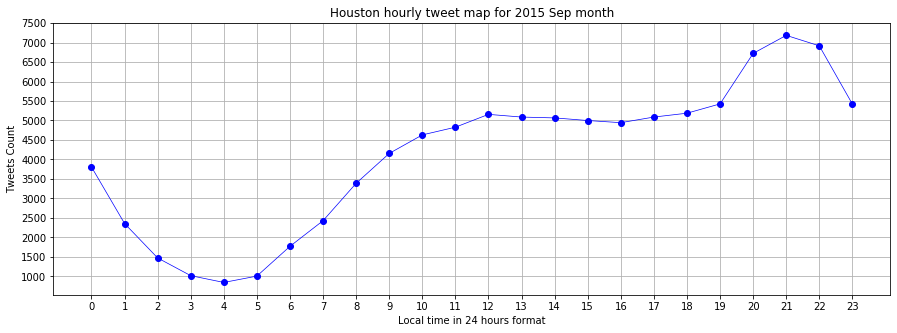

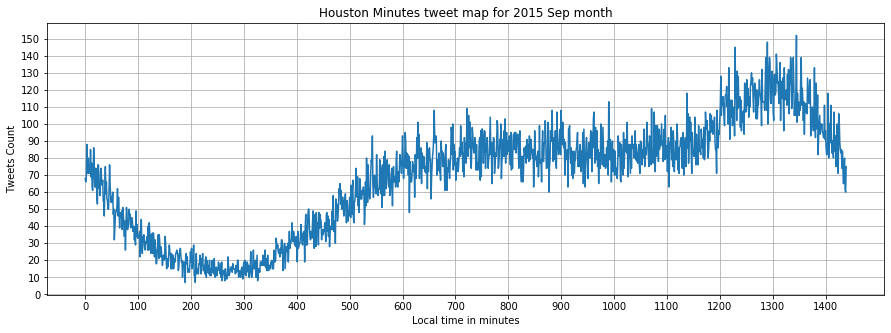

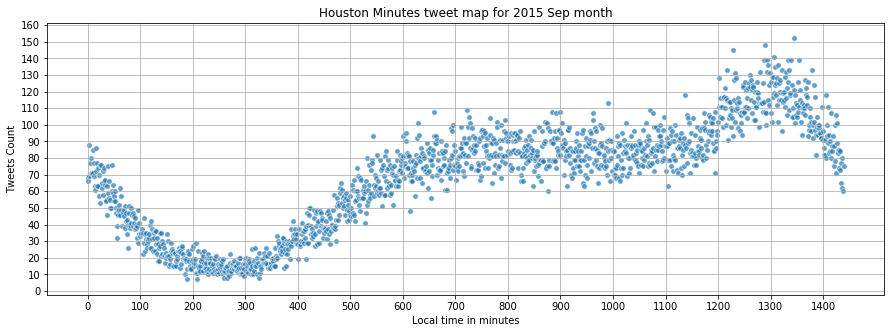

In [97]:
hr_hou , tweets_hr_hou = np.unique(houston_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Houston hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,9000,500) )
ax1.grid('on')
_ = ax1.plot(hr_hou ,tweets_hr_hou, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_hou , tweets_min_hou = np.unique(houston_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Houston Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,180,10) )
ax1.grid('on')
_ = ax1.plot(min_hou ,tweets_min_hou)
plt.show()


min_hou , tweets_min_hou = np.unique(houston_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Houston Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,180,10) )
ax1.grid('on')
sns.scatterplot(min_hou,tweets_min_hou, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()


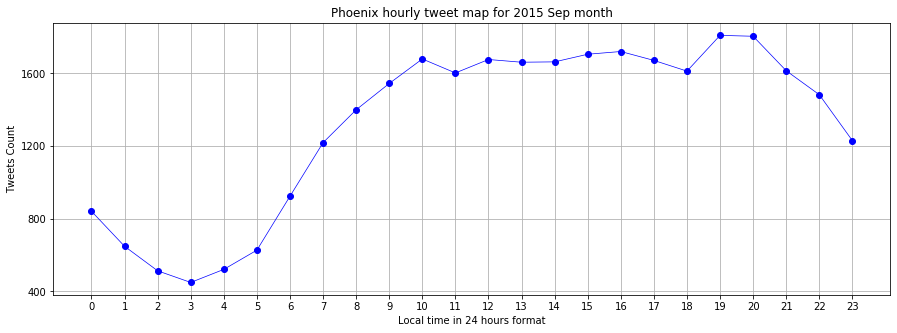

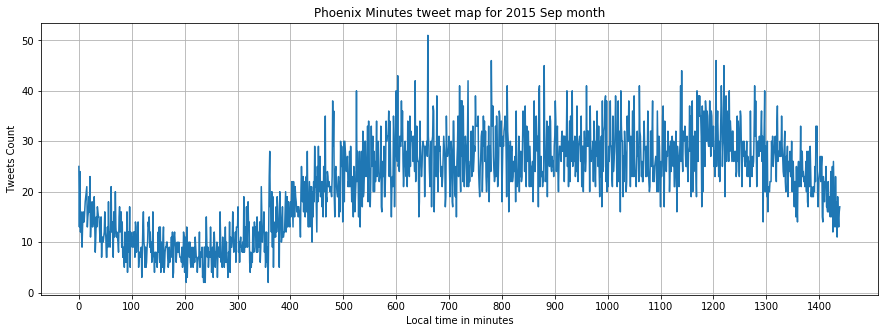

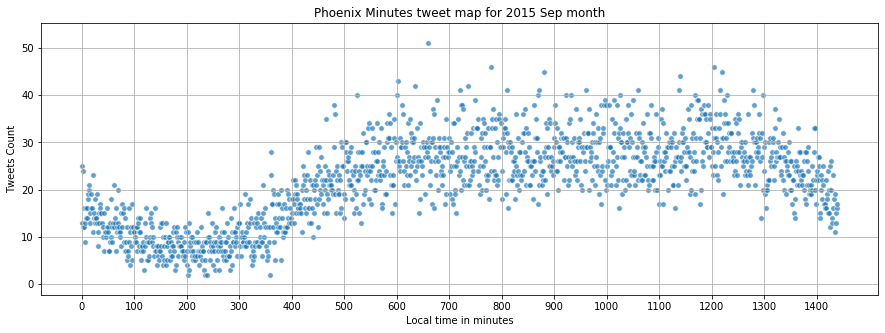

In [98]:
hr_pho , tweets_hr_pho = np.unique(phoenix_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Phoenix hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,7300,400) )
ax1.grid('on')
_ = ax1.plot(hr_pho ,tweets_hr_pho, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_pho , tweets_min_pho = np.unique(phoenix_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Phoenix Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
_ = ax1.plot(min_pho ,tweets_min_pho)
plt.show()


min_pho , tweets_min_pho = np.unique(phoenix_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Phoenix Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
sns.scatterplot(min_pho,tweets_min_pho, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

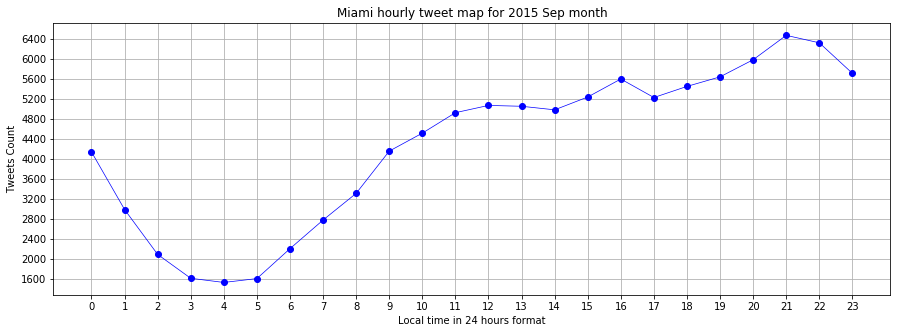

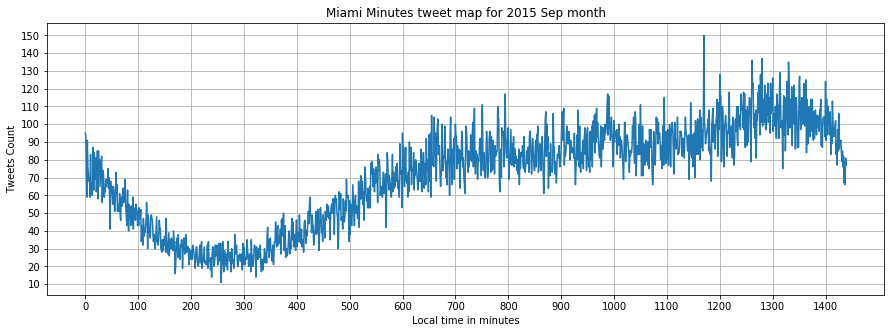

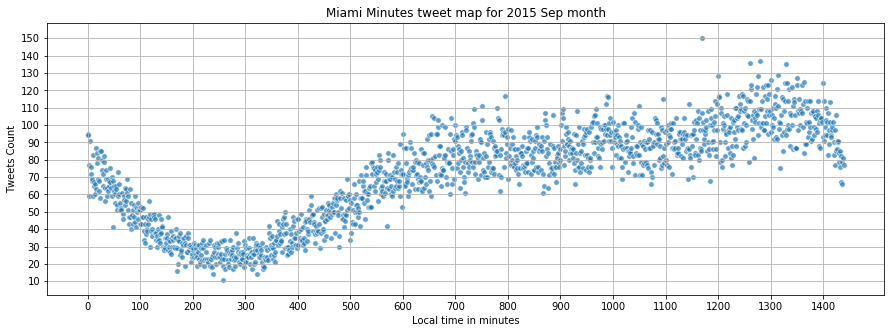

In [99]:
hr_mia , tweets_hr_mia = np.unique(miami_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Miami hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,7300,400) )
ax1.grid('on')
_ = ax1.plot(hr_mia ,tweets_hr_mia, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_mia , tweets_min_mia = np.unique(miami_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Miami Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
_ = ax1.plot(min_mia ,tweets_min_mia)
plt.show()


min_mia , tweets_min_mia = np.unique(miami_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Miami Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
sns.scatterplot(min_mia,tweets_min_mia, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

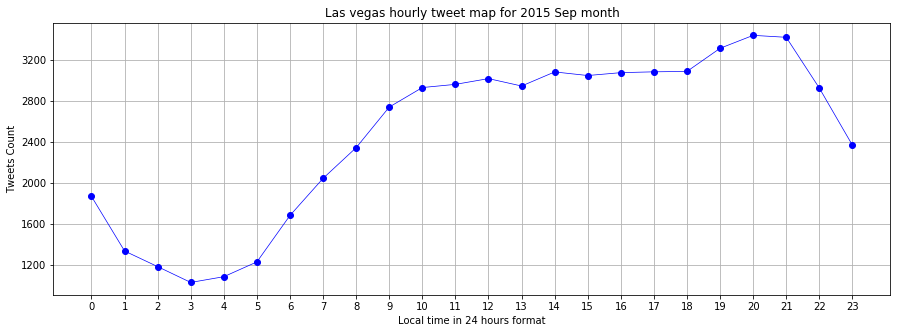

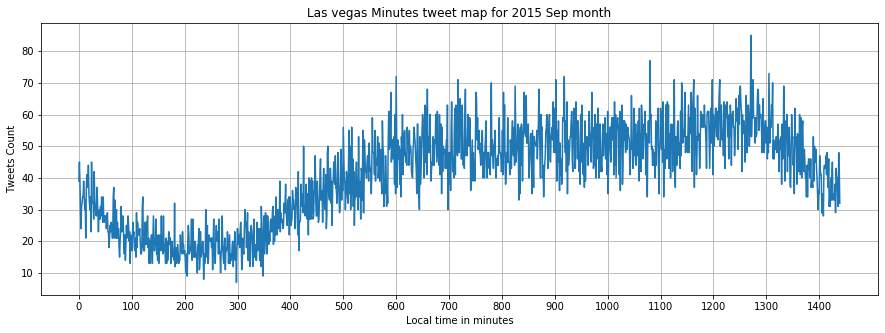

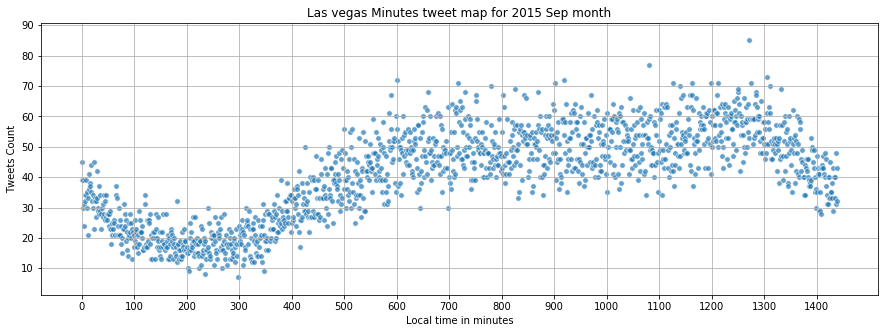

In [100]:
hr_lv , tweets_hr_lv = np.unique(lasvegas_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Las vegas hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,7300,400) )
ax1.grid('on')
_ = ax1.plot(hr_lv ,tweets_hr_lv, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_lv , tweets_min_lv = np.unique(lasvegas_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Las vegas Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
_ = ax1.plot(min_lv ,tweets_min_lv)
plt.show()


min_lv , tweets_min_lv = np.unique(lasvegas_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Las vegas Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
sns.scatterplot(min_lv,tweets_min_lv, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

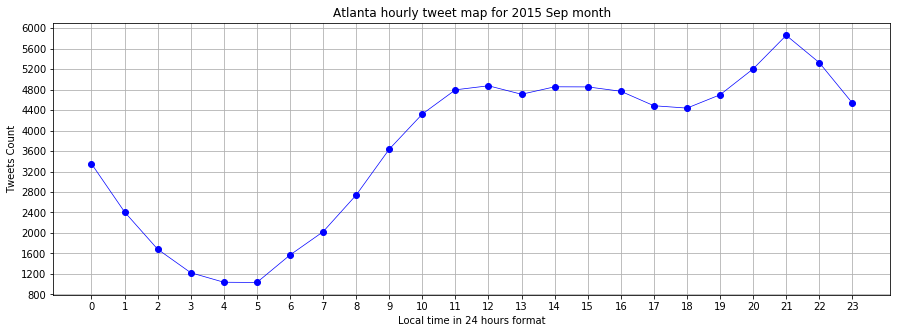

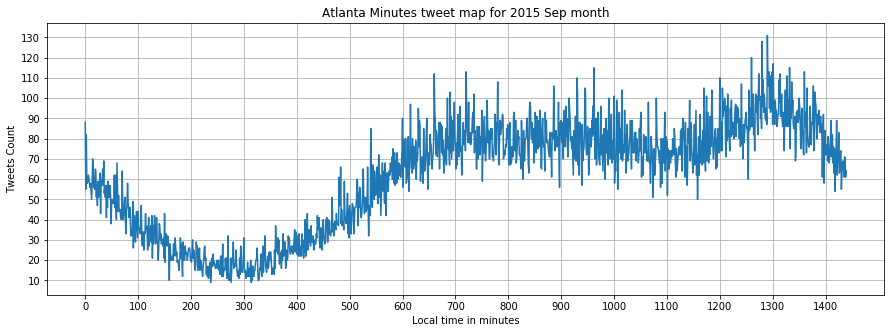

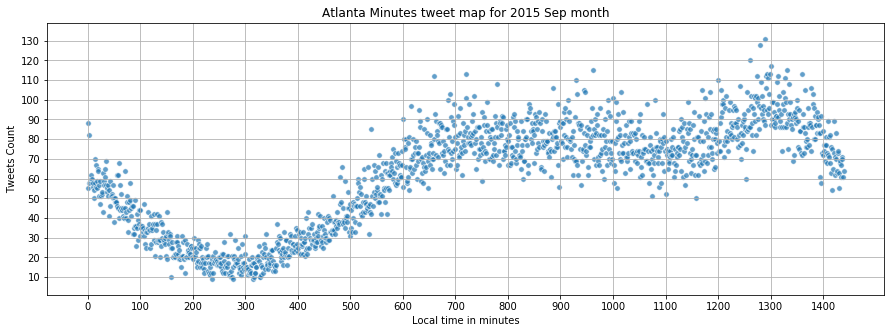

In [101]:
hr_atl , tweets_hr_atl = np.unique(atlanta_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Atlanta hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,7300,400) )
ax1.grid('on')
_ = ax1.plot(hr_atl ,tweets_hr_atl, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_atl , tweets_min_atl = np.unique(atlanta_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Atlanta Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
_ = ax1.plot(min_atl ,tweets_min_atl)
plt.show()


min_atl , tweets_min_atl = np.unique(atlanta_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Atlanta Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,160,10) )
ax1.grid('on')
sns.scatterplot(min_atl,tweets_min_atl, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

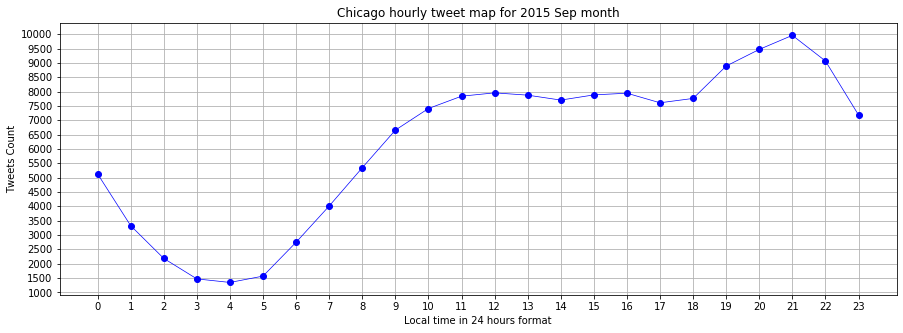

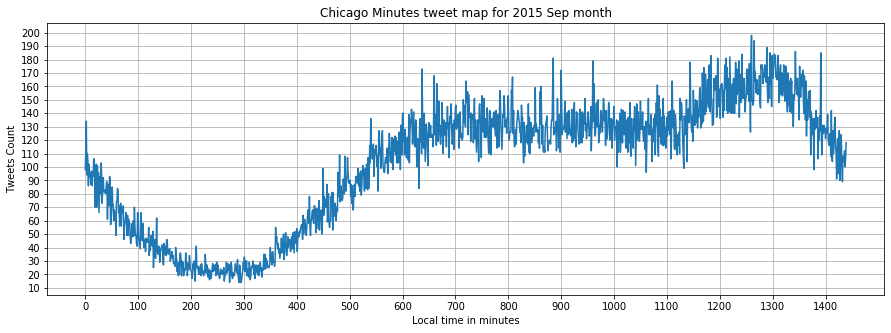

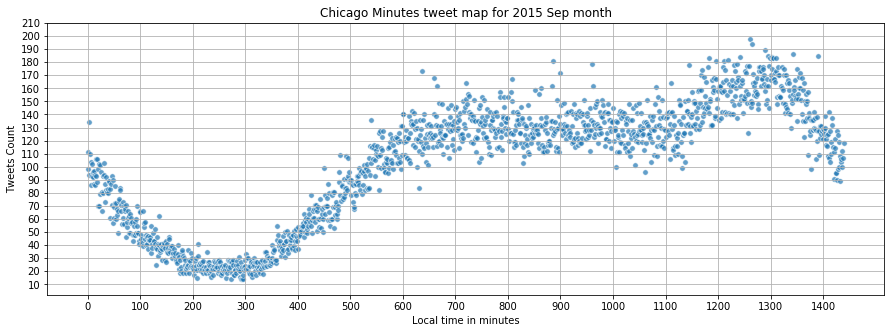

In [102]:
hr_chi , tweets_hr_chi = np.unique(chicago_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Chicago hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,13000,500) )
ax1.grid('on')
_ = ax1.plot(hr_chi ,tweets_hr_chi, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_chi , tweets_min_chi = np.unique(chicago_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Chicago Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,240,10) )
ax1.grid('on')
_ = ax1.plot(min_chi ,tweets_min_chi)
plt.show()


min_chi , tweets_min_chi = np.unique(chicago_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Chicago Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.set_yticks( range(0,240,10) )
ax1.grid('on')
sns.scatterplot(min_chi,tweets_min_chi, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

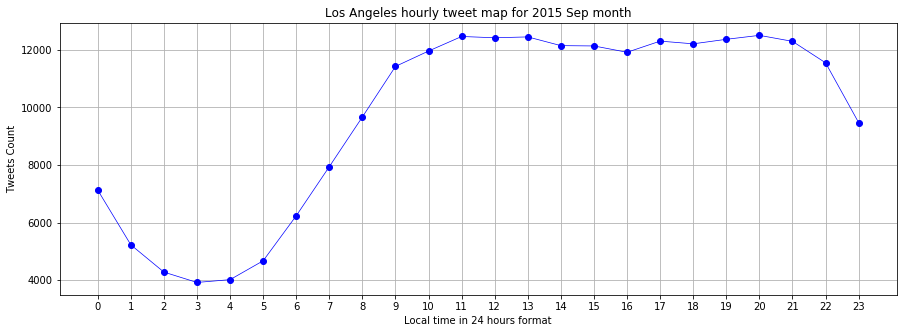

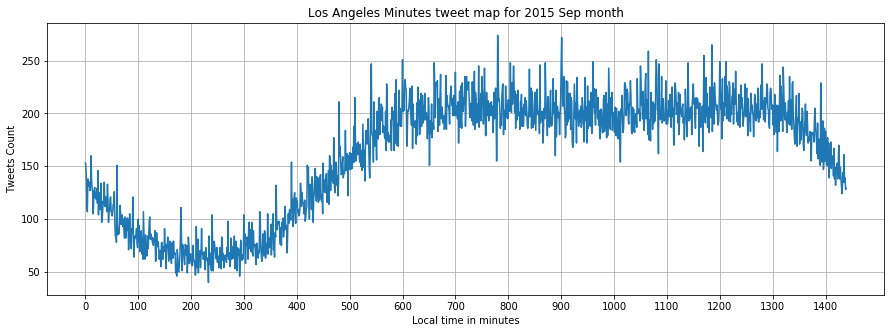

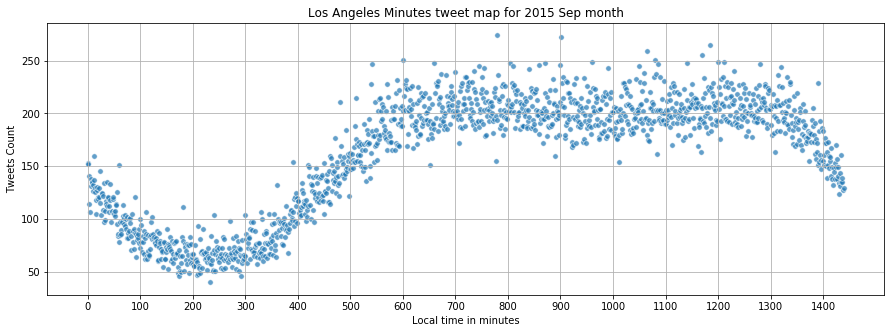

In [103]:
hr_la , tweets_hr_la = np.unique(losangeles_df_us_data['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Los Angeles hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
# ax1.set_yticks( range(0,9000,500) )
ax1.grid('on')
_ = ax1.plot(hr_la ,tweets_hr_la, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_la , tweets_min_la = np.unique(losangeles_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Los Angeles Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
# ax1.set_yticks( range(0,180,10) )
ax1.grid('on')
_ = ax1.plot(min_la ,tweets_min_la)
plt.show()


min_la , tweets_min_la = np.unique(losangeles_df_us_data['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Los Angeles Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
# ax1.set_yticks( range(0,180,10) )
ax1.grid('on')
sns.scatterplot(min_la,tweets_min_la, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()


In [104]:
# houston_df_us_data
# phoenix_df_us_data
# miami_df_us_data
# lasvegas_df_us_data
# atlanta_df_us_data
# chicago_df_us_data
# losangeles_df_us_data


# PST_America_Los_Angeles
# CST_America_Chicago
# EST_America_New_York
# MST_America_Denver

In [105]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [106]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('/Users/rajesh/Downloads/folium-master/examples/data', 'us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# state_unemployment = os.path.join('/Users/rajesh/Downloads/folium-master/examples/data', 'US_Unemployment_Oct2012.csv')
# state_data = pd.read_csv(state_unemployment)
StateWise_Tweet_Count = pd.read_csv('/Users/rajesh/Desktop/Sep_StateWise_Tweet_Count.csv', lineterminator='\n')

    
    
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=StateWise_Tweet_Count,
 columns=['State', 'Count\r'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Tweet Count'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#Sep_folium_chloropleth_USA1.html')


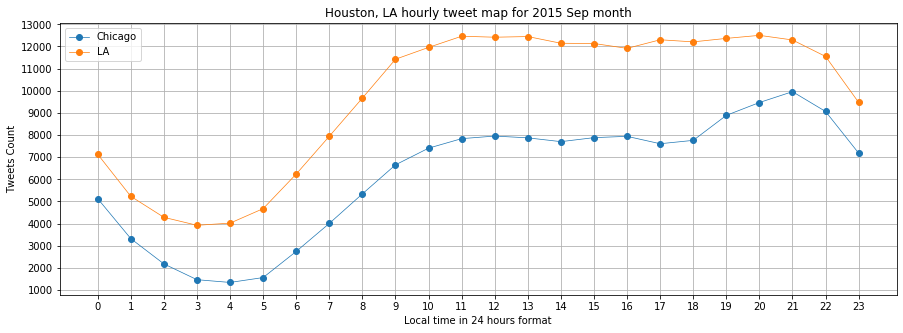

In [107]:
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Houston, LA hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,14000,1000) )
ax1.grid('on')
_ = ax1.plot(hr_chi,tweets_hr_chi,hr_la,tweets_hr_la, marker='o', linewidth = 0.7)
plt.legend(('Chicago' , 'LA'))
plt.show()

In [108]:
TimeZonegroupDF = us_tweets.groupby('TimeZone')

PST_America_Los_Angeles = TimeZonegroupDF.get_group('America/Los_Angeles')
PST_America_Los_Angeles["all_day_minutes"] = PST_America_Los_Angeles.hour * 60 + PST_America_Los_Angeles.minute
PST_America_Los_Angeles = PST_America_Los_Angeles.reset_index(drop=True)

CST_America_Chicago = TimeZonegroupDF.get_group('America/Chicago')
CST_America_Chicago["all_day_minutes"] = CST_America_Chicago.hour * 60 + CST_America_Chicago.minute
CST_America_Chicago = CST_America_Chicago.reset_index(drop=True)

EST_America_New_York = TimeZonegroupDF.get_group('America/New_York')
EST_America_New_York["all_day_minutes"] = EST_America_New_York.hour * 60 + EST_America_New_York.minute
EST_America_New_York = EST_America_New_York.reset_index(drop=True)

MST_America_Denver = TimeZonegroupDF.get_group('America/Denver')
MST_America_Denver["all_day_minutes"] = MST_America_Denver.hour * 60 + MST_America_Denver.minute
MST_America_Denver = MST_America_Denver.reset_index(drop=True)

AKST_America_Anchorage = TimeZonegroupDF.get_group('America/Anchorage')
AKST_America_Anchorage["all_day_minutes"] = AKST_America_Anchorage.hour * 60 + AKST_America_Anchorage.minute
AKST_America_Anchorage = AKST_America_Anchorage.reset_index(drop=True)

HST_Pacific_Honolulu = TimeZonegroupDF.get_group('Pacific/Honolulu')
HST_Pacific_Honolulu["all_day_minutes"] = HST_Pacific_Honolulu.hour * 60 + HST_Pacific_Honolulu.minute
HST_Pacific_Honolulu = HST_Pacific_Honolulu.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

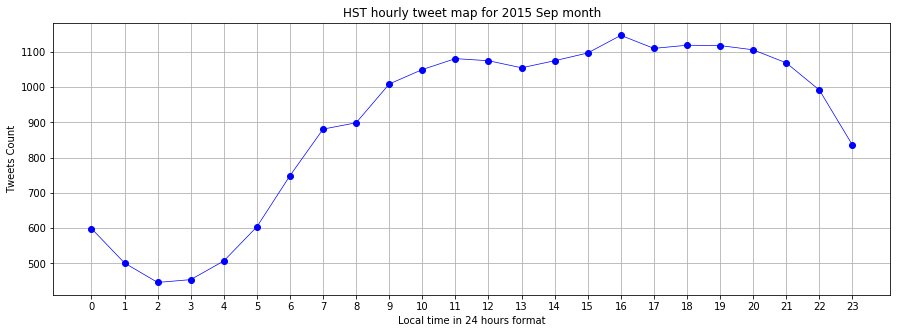

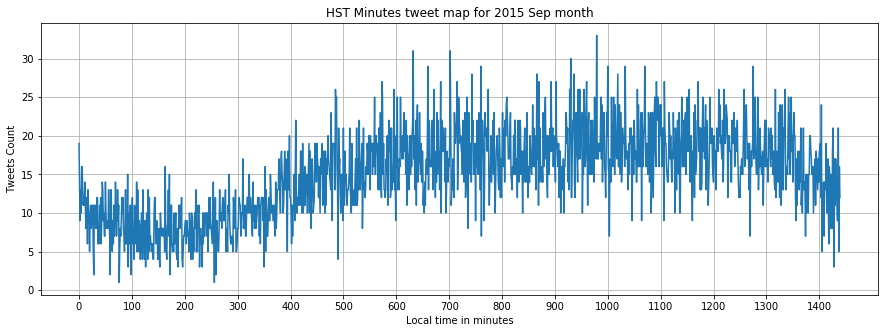

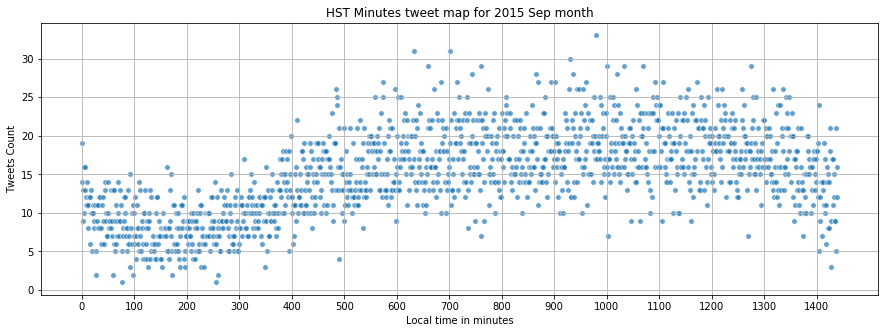

In [109]:
hr_hst , tweets_hr_hst = np.unique(HST_Pacific_Honolulu['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('HST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.grid('on')
_ = ax1.plot(hr_hst ,tweets_hr_hst, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_hst , tweets_min_hst = np.unique(HST_Pacific_Honolulu['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('HST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
_ = ax1.plot(min_hst ,tweets_min_hst)
plt.show()


min_hst , tweets_min_hst = np.unique(HST_Pacific_Honolulu['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('HST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
sns.scatterplot(min_hst,tweets_min_hst, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

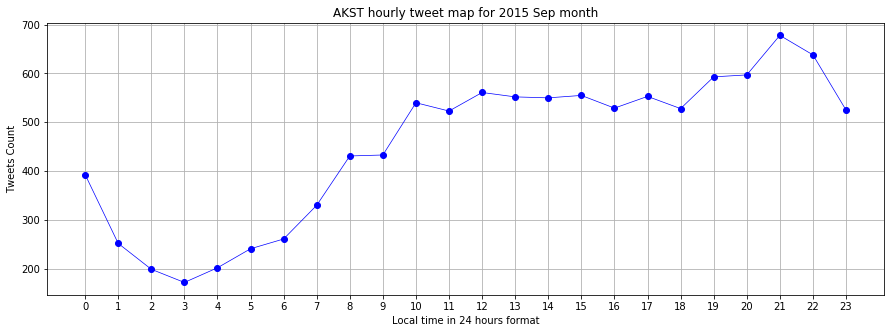

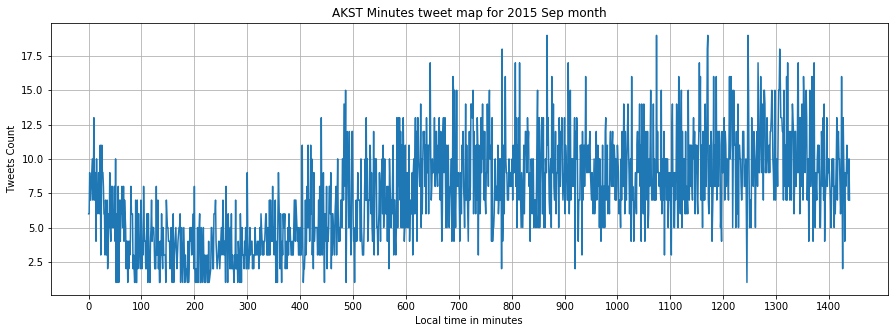

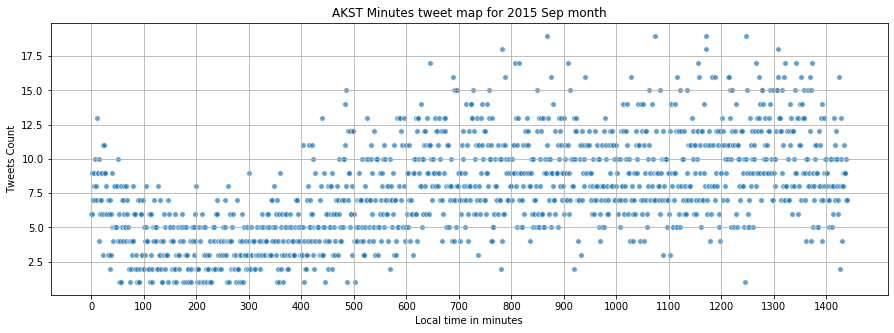

In [110]:
hr_akst , tweets_hr_akst = np.unique(AKST_America_Anchorage['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('AKST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.grid('on')
_ = ax1.plot(hr_akst ,tweets_hr_akst, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_akst , tweets_min_akst = np.unique(AKST_America_Anchorage['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('AKST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
_ = ax1.plot(min_akst ,tweets_min_akst)
plt.show()


min_akst , tweets_min_akst = np.unique(AKST_America_Anchorage['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('AKST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
sns.scatterplot(min_akst,tweets_min_akst, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

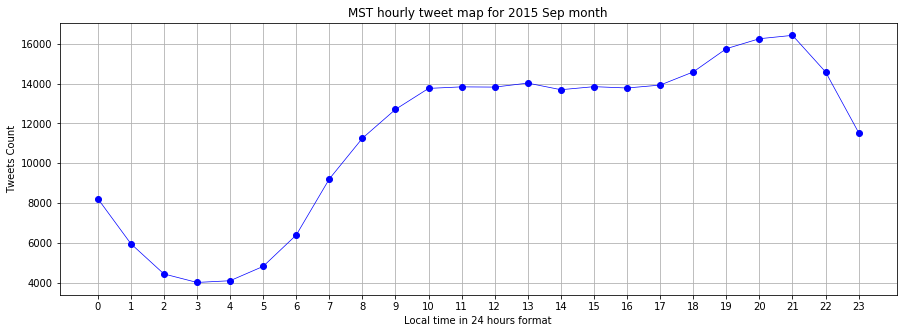

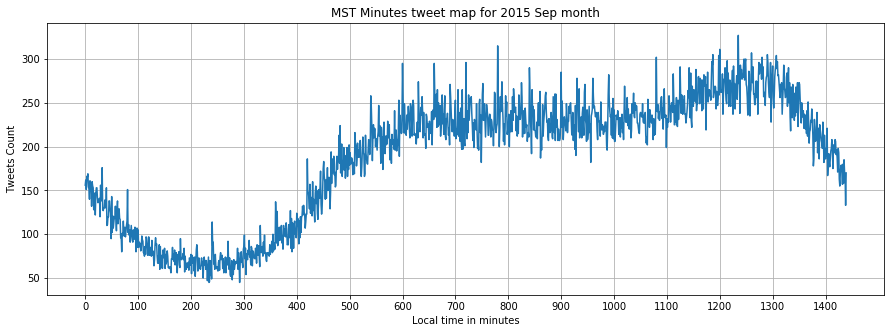

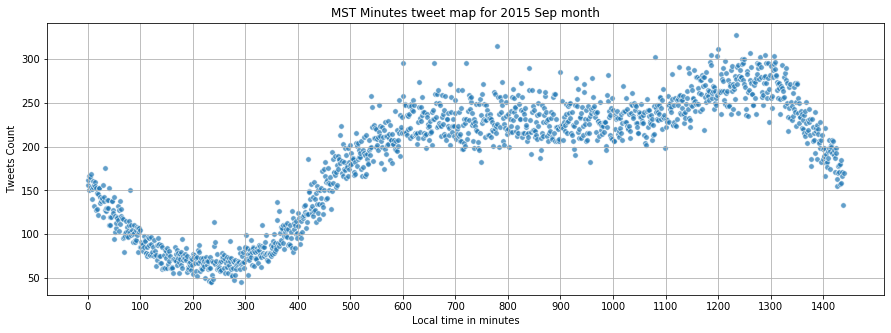

In [111]:
hr_mst , tweets_hr_mst = np.unique(MST_America_Denver['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('MST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.grid('on')
_ = ax1.plot(hr_mst ,tweets_hr_mst, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_mst , tweets_min_mst = np.unique(MST_America_Denver['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('MST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
_ = ax1.plot(min_mst ,tweets_min_mst)
plt.show()


min_mst , tweets_min_mst = np.unique(MST_America_Denver['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('MST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
sns.scatterplot(min_mst,tweets_min_mst, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

In [112]:
# PST_America_Los_Angeles
# CST_America_Chicago
# EST_America_New_York
# MST_America_Denver

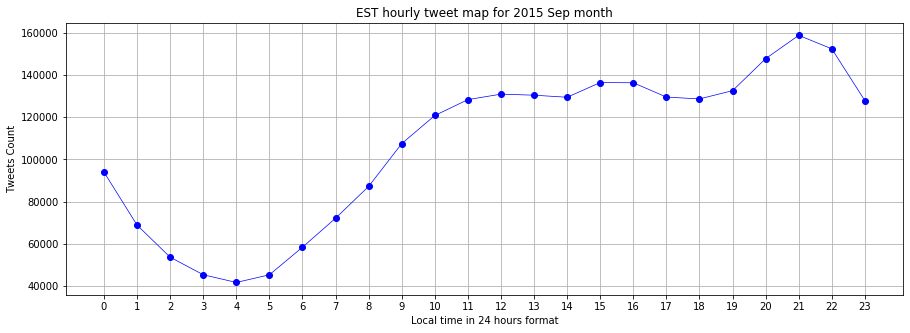

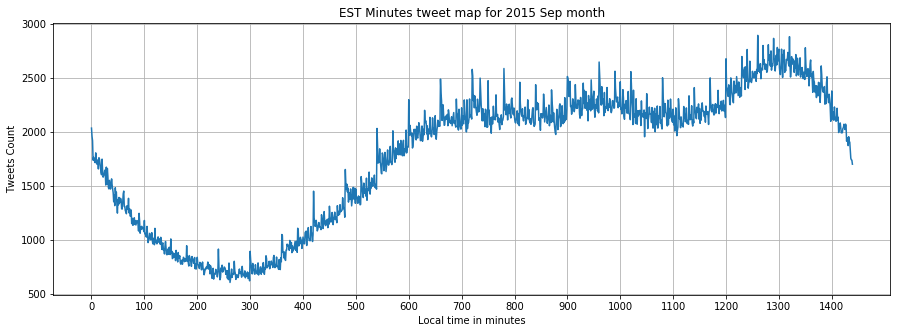

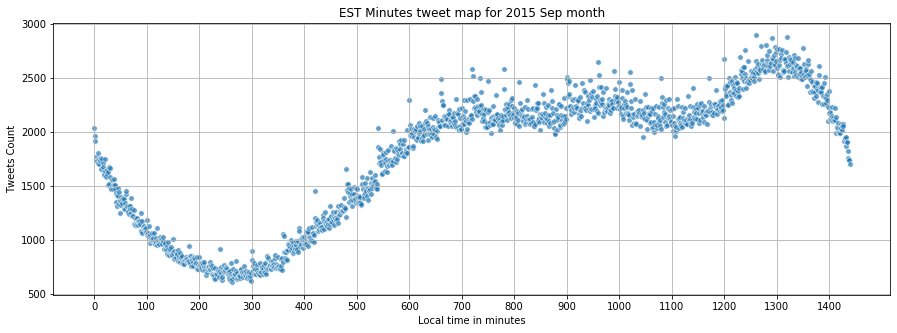

In [113]:
hr_est , tweets_hr_est = np.unique(EST_America_New_York['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('EST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.grid('on')
_ = ax1.plot(hr_est ,tweets_hr_est, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_est , tweets_min_est = np.unique(EST_America_New_York['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('EST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
_ = ax1.plot(min_est ,tweets_min_est)
plt.show()


min_est , tweets_min_est = np.unique(EST_America_New_York['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('EST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
sns.scatterplot(min_est,tweets_min_est, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

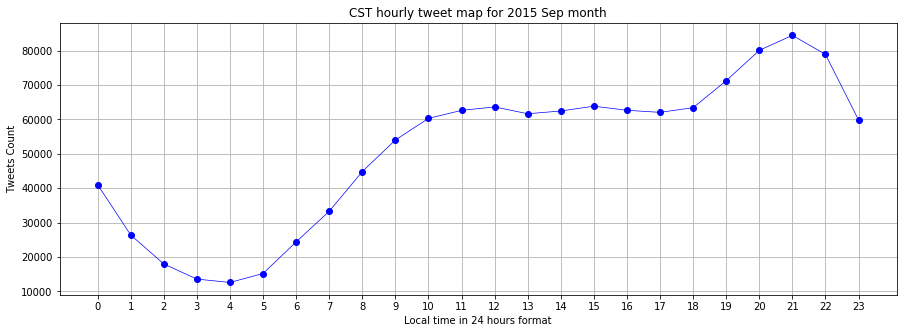

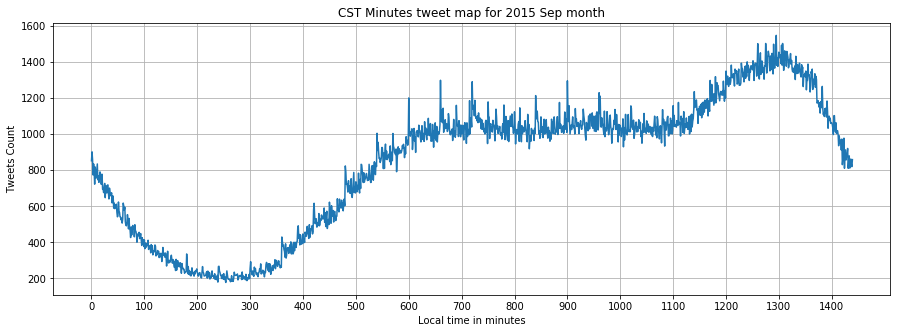

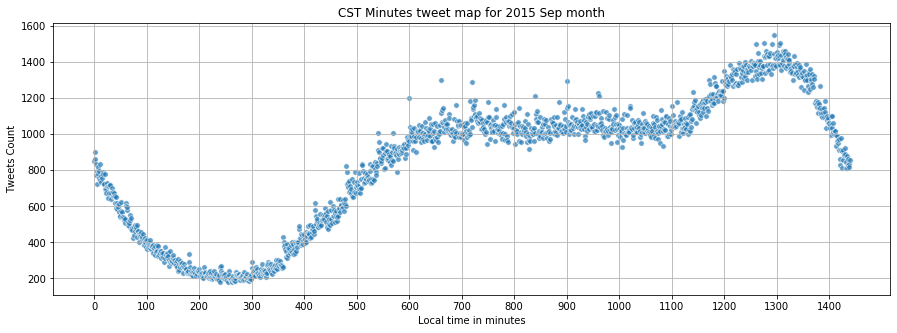

In [114]:
hr_cst , tweets_hr_cst = np.unique(CST_America_Chicago['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('CST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.grid('on')
_ = ax1.plot(hr_cst ,tweets_hr_cst, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_cst , tweets_min_cst = np.unique(CST_America_Chicago['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('CST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
_ = ax1.plot(min_cst ,tweets_min_cst)
plt.show()


min_cst , tweets_min_cst = np.unique(CST_America_Chicago['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('CST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
sns.scatterplot(min_cst,tweets_min_cst, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

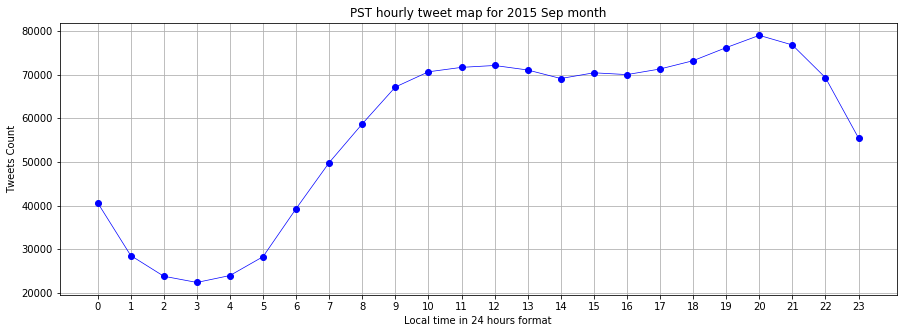

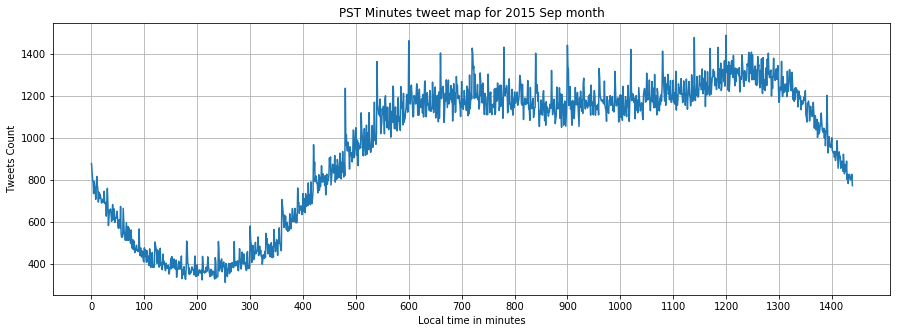

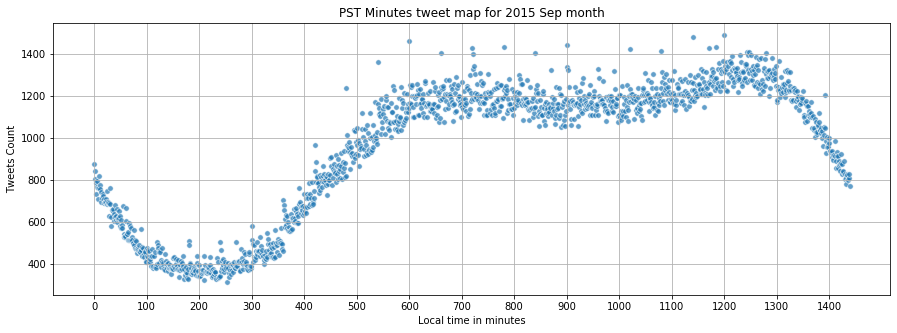

In [115]:
hr_pst , tweets_hr_pst = np.unique(PST_America_Los_Angeles['hour'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('PST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.grid('on')
_ = ax1.plot(hr_pst ,tweets_hr_pst, 'b-', marker='o', linewidth = 0.7)
plt.show()


min_pst , tweets_min_pst = np.unique(PST_America_Los_Angeles['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('PST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
_ = ax1.plot(min_pst ,tweets_min_pst)
plt.show()


min_pst , tweets_min_pst = np.unique(PST_America_Los_Angeles['all_day_minutes'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('PST Minutes tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in minutes')
ax1.set_xticks( range(0,1440,100) )
ax1.grid('on')
sns.scatterplot(min_pst,tweets_min_pst, palette='deep',legend=False,cmap=plt.cm.jet, s=30, linewidths=0, alpha=0.7)
plt.show()

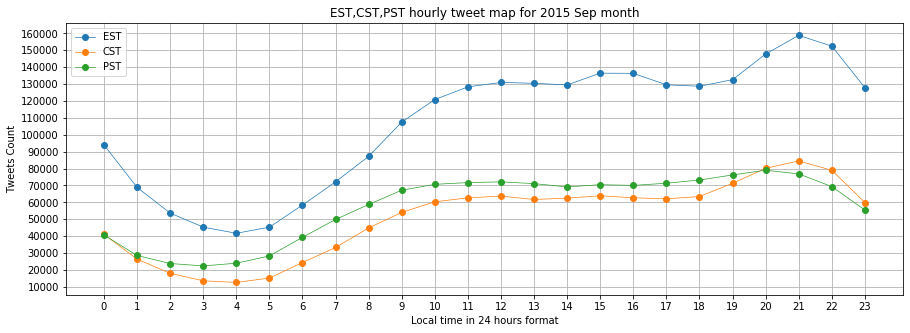

In [116]:
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('EST,CST,PST hourly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Local time in 24 hours format')
ax1.set_xticks( range(0,24,1) )
ax1.set_yticks( range(0,170000,10000) )
ax1.grid('on')
_ = ax1.plot(hr_est ,tweets_hr_est,hr_cst ,tweets_hr_cst,hr_pst ,tweets_hr_pst, marker='o', linewidth = 0.7)
plt.legend(('EST' , 'CST' , 'PST'))
plt.show()

In [117]:
# sep_LA_sun_data = pd.read_csv('/Users/rajesh/Desktop/CSE-519-DSF/Project/Sep_LosAngeles_Sunrise_data.csv')

In [118]:
# sep_LA_sun_data["Sunrise"] = sep_LA_sun_data["Sunrise"].apply(lambda x: x.split(" ")[0])
# Sunrise_Hr = sep_LA_sun_data["Sunrise"].apply(lambda x: x.split(":")[0])
# Sunrise_Min = sep_LA_sun_data["Sunrise"].apply(lambda x: x.split(":")[1])

In [119]:
# def suntime(x):
#     day = x
#     if(day==31):
#         return 6
#     else:
#         return Sunrise_Hr[day-1]

# def suntime_min(x):
#     day = x
#     if(day==31):
#         return 25
#     else:
#         return Sunrise_Min[day-1]


In [120]:
# losangeles_df_us_data["Sunrise_Hr"] = losangeles_df_us_data.day.apply(lambda x : suntime(x))
# losangeles_df_us_data["Sunrise_Min"] = losangeles_df_us_data.day.apply(lambda x : suntime_min(x))


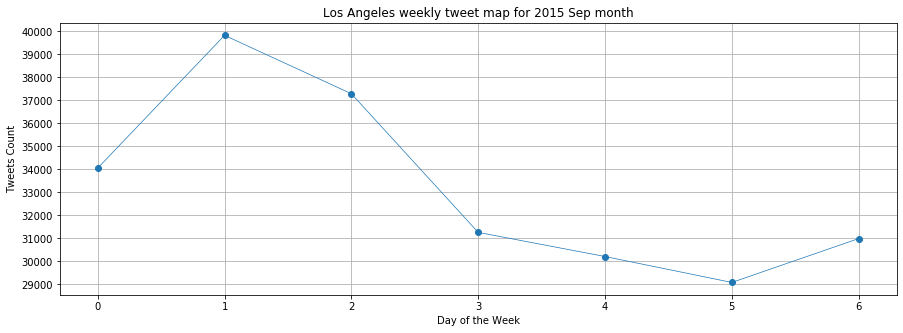

In [121]:
wk_la , tweets_wk_la = np.unique(losangeles_df_us_data['dayofweek'].tolist() , return_counts=True)
fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.set_title('Los Angeles weekly tweet map for 2015 Sep month')
ax1.set_ylabel('Tweets Count')
ax1.set_xlabel('Day of the Week')
ax1.set_xticks( range(0,7,1) )
ax1.set_yticks( range(0,41000,1000) )
ax1.grid('on')
_ = ax1.plot(wk_la ,tweets_wk_la, marker='o', linewidth = 0.7)
plt.show()

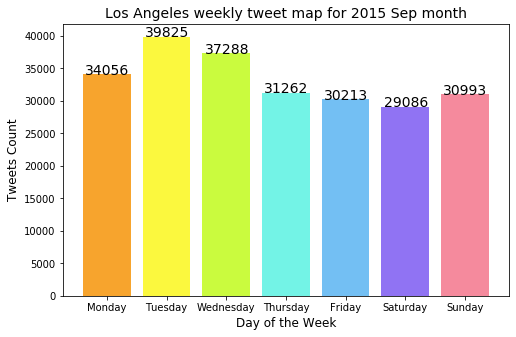

In [122]:
wk_la , tweets_wk_la = np.unique(losangeles_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Los Angeles weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

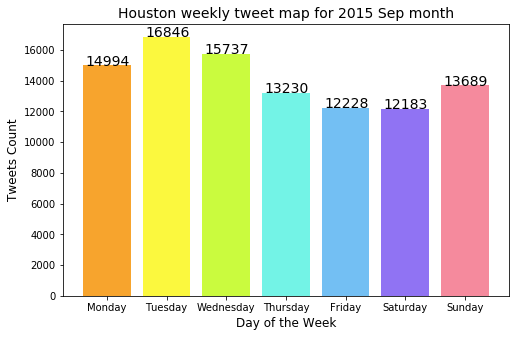

In [123]:
wk_la , tweets_wk_la = np.unique(houston_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Houston weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

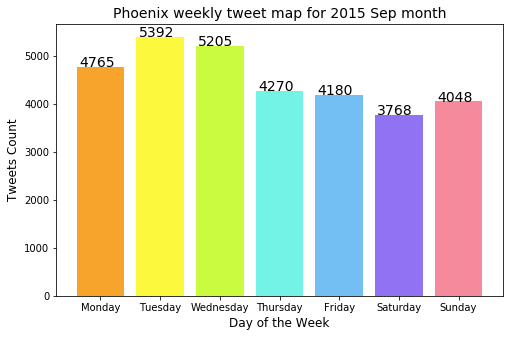

In [124]:
wk_la , tweets_wk_la = np.unique(phoenix_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Phoenix weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

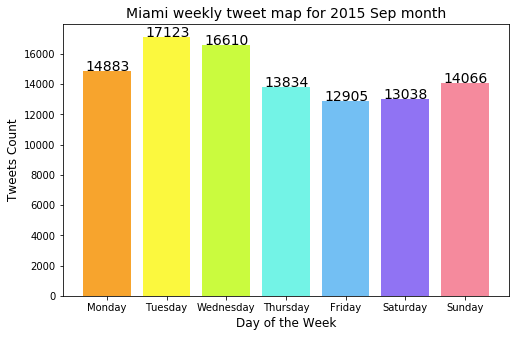

In [125]:
wk_la , tweets_wk_la = np.unique(miami_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Miami weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

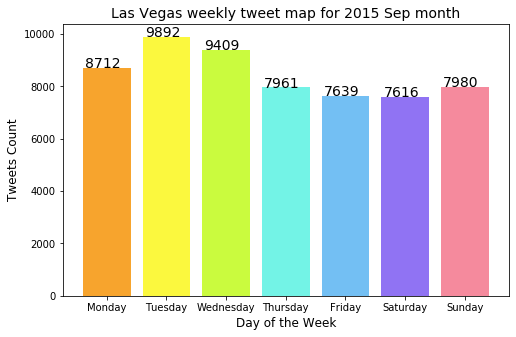

In [126]:
wk_la , tweets_wk_la = np.unique(lasvegas_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Las Vegas weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

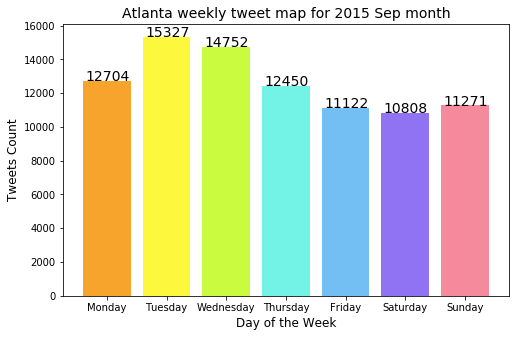

In [127]:
wk_la , tweets_wk_la = np.unique(atlanta_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Atlanta weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

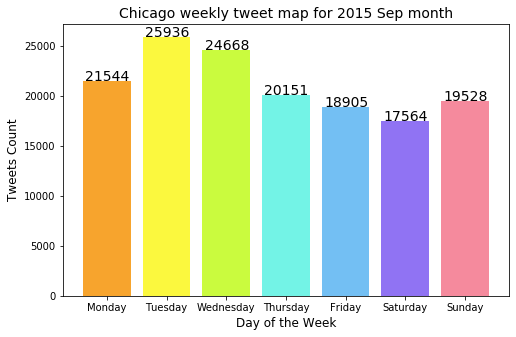

In [128]:
wk_la , tweets_wk_la = np.unique(chicago_df_us_data['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('Chicago weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=14, color='black')

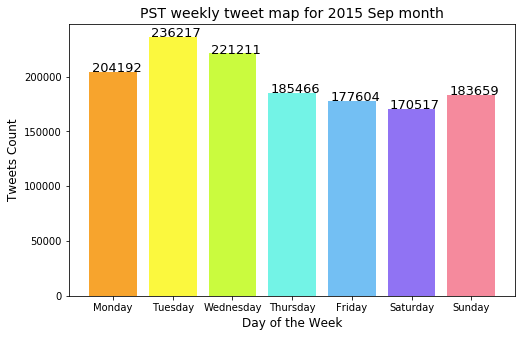

In [129]:
# PST_America_Los_Angeles
# CST_America_Chicago
# EST_America_New_York
# MST_America_Denver

wk_la , tweets_wk_la = np.unique(PST_America_Los_Angeles['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('PST weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=13, color='black')

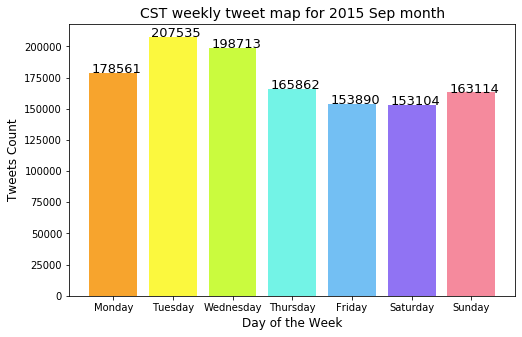

In [130]:
wk_la , tweets_wk_la = np.unique(CST_America_Chicago['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('CST weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=13, color='black')

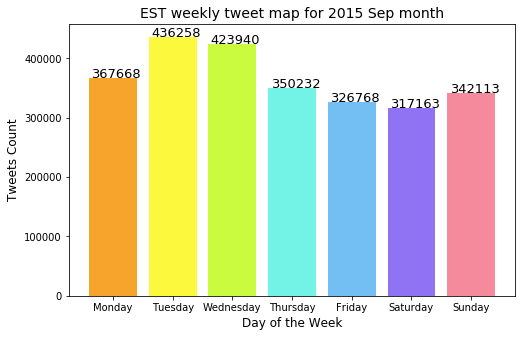

In [131]:
wk_la , tweets_wk_la = np.unique(EST_America_New_York['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('EST weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=13, color='black')

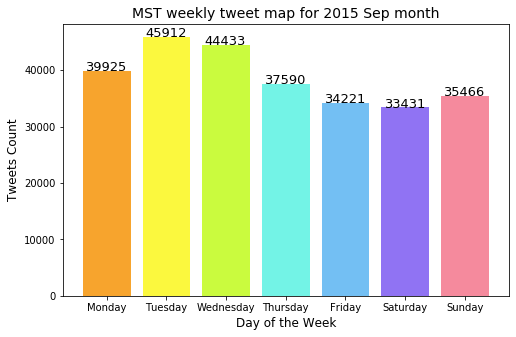

In [132]:
wk_la , tweets_wk_la = np.unique(MST_America_Denver['dayofweek'].tolist() , return_counts=True)
wk_la = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
axs.set_title('MST weekly tweet map for 2015 Sep month', fontsize=14)
axs.set_ylabel('Tweets Count', fontsize=12)
axs.set_xlabel('Day of the Week', fontsize=12)
axs.set_xticks( range(0,7,1) )
# axs.set_yticks( range(0,41000,5000) )
plt.bar(wk_la, tweets_wk_la, color=['#F7A42D', '#FBF83E', '#CAFB3E', '#73F3E6', '#73BFF3','#9073F3','#F58A9D'])


for i in axs.patches:
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=13, color='black')

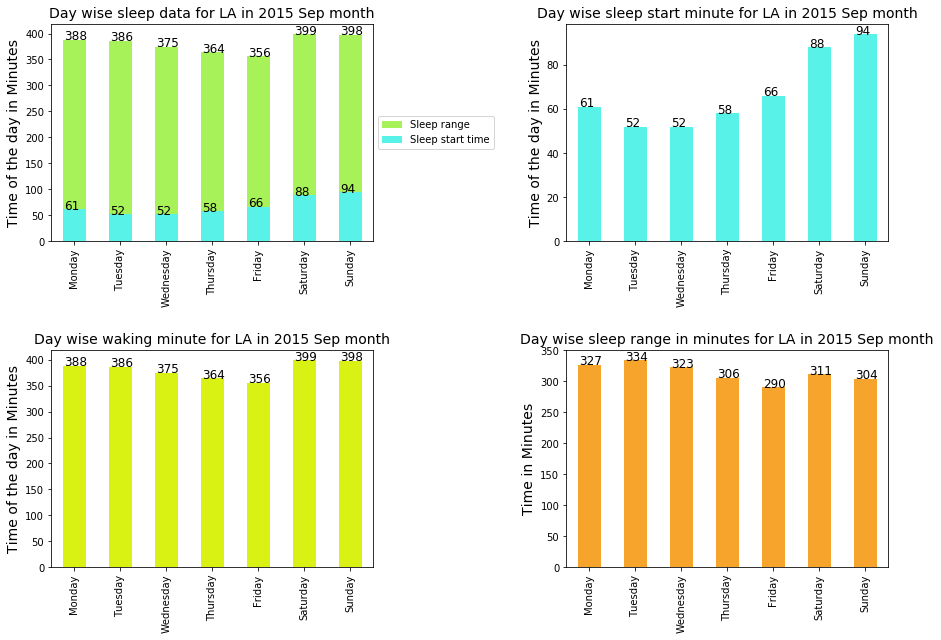

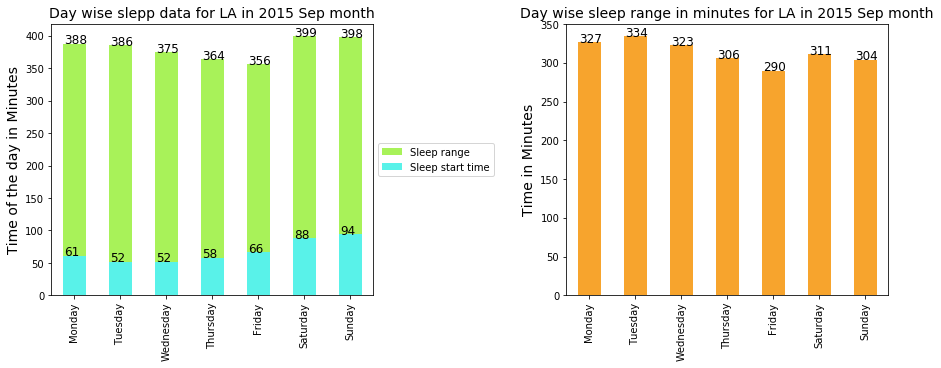

In [133]:
WeekgroupDF = losangeles_df_us_data.groupby('dayofweek')

Monday = WeekgroupDF.get_group(0)
Monday = Monday.reset_index(drop=True)

Tuesday = WeekgroupDF.get_group(1)
Tuesday = Tuesday.reset_index(drop=True)

Wednesday = WeekgroupDF.get_group(2)
Wednesday = Wednesday.reset_index(drop=True)

Thursday = WeekgroupDF.get_group(3)
Thursday = Thursday.reset_index(drop=True)

Friday = WeekgroupDF.get_group(4)
Friday = Friday.reset_index(drop=True)

Saturday = WeekgroupDF.get_group(5)
Saturday = Saturday.reset_index(drop=True)

Sunday = WeekgroupDF.get_group(6)
Sunday = Sunday.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Monday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Monday")

sleep_list = sleeping_mins(Tuesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Tuesday")

sleep_list = sleeping_mins(Wednesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Wednesday")

sleep_list = sleeping_mins(Thursday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Thursday")

sleep_list = sleeping_mins(Friday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Friday")

sleep_list = sleeping_mins(Saturday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Saturday")

sleep_list = sleeping_mins(Sunday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Sunday") 

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 


fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Day wise sleep data for LA in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep start minute for LA in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Day wise waking minute for LA in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Day wise sleep range in minutes for LA in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()



fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Day wise slepp data for LA in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep range in minutes for LA in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()


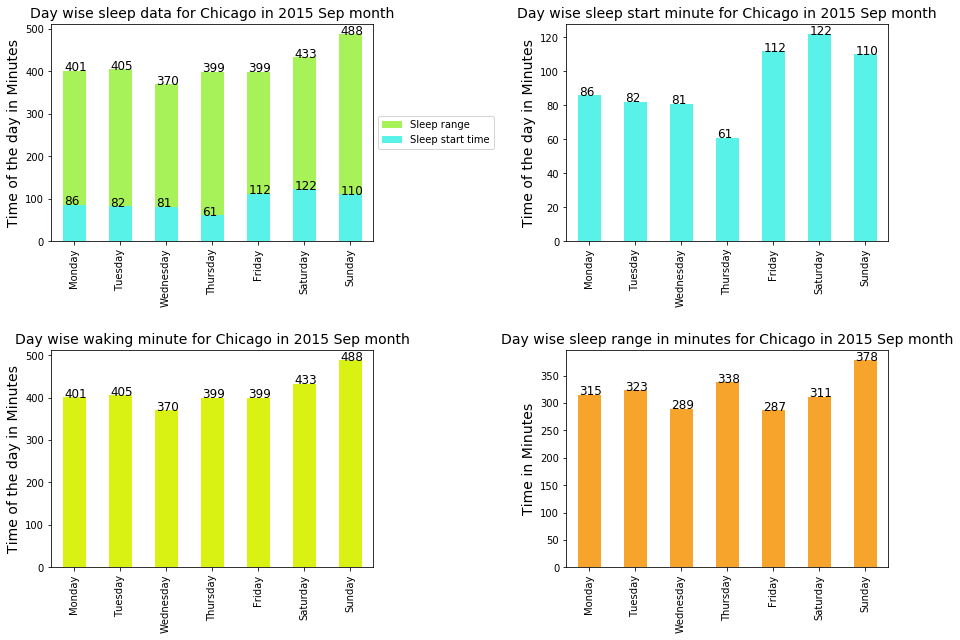

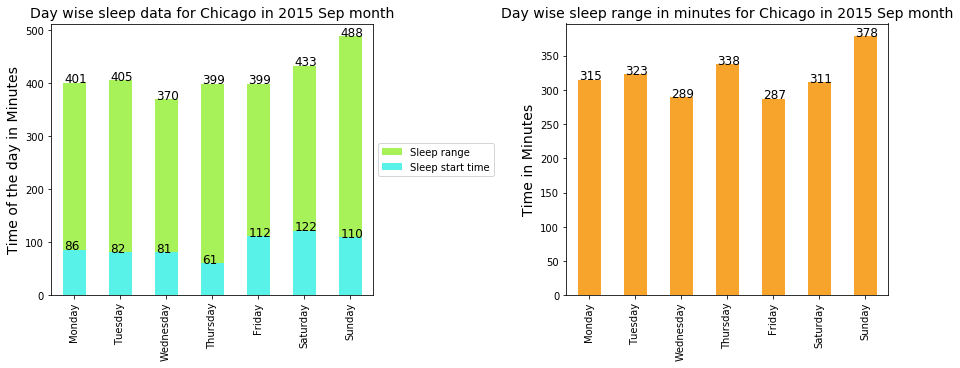

In [134]:
WeekgroupDF = chicago_df_us_data.groupby('dayofweek')

Monday = WeekgroupDF.get_group(0)
Monday = Monday.reset_index(drop=True)

Tuesday = WeekgroupDF.get_group(1)
Tuesday = Tuesday.reset_index(drop=True)

Wednesday = WeekgroupDF.get_group(2)
Wednesday = Wednesday.reset_index(drop=True)

Thursday = WeekgroupDF.get_group(3)
Thursday = Thursday.reset_index(drop=True)

Friday = WeekgroupDF.get_group(4)
Friday = Friday.reset_index(drop=True)

Saturday = WeekgroupDF.get_group(5)
Saturday = Saturday.reset_index(drop=True)

Sunday = WeekgroupDF.get_group(6)
Sunday = Sunday.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Monday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Monday")

sleep_list = sleeping_mins(Tuesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Tuesday")

sleep_list = sleeping_mins(Wednesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Wednesday")

sleep_list = sleeping_mins(Thursday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Thursday")

sleep_list = sleeping_mins(Friday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Friday")

sleep_list = sleeping_mins(Saturday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Saturday")

sleep_list = sleeping_mins(Sunday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Sunday") 

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 




fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Day wise sleep data for Chicago in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep start minute for Chicago in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Day wise waking minute for Chicago in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Day wise sleep range in minutes for Chicago in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Day wise sleep data for Chicago in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep range in minutes for Chicago in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()

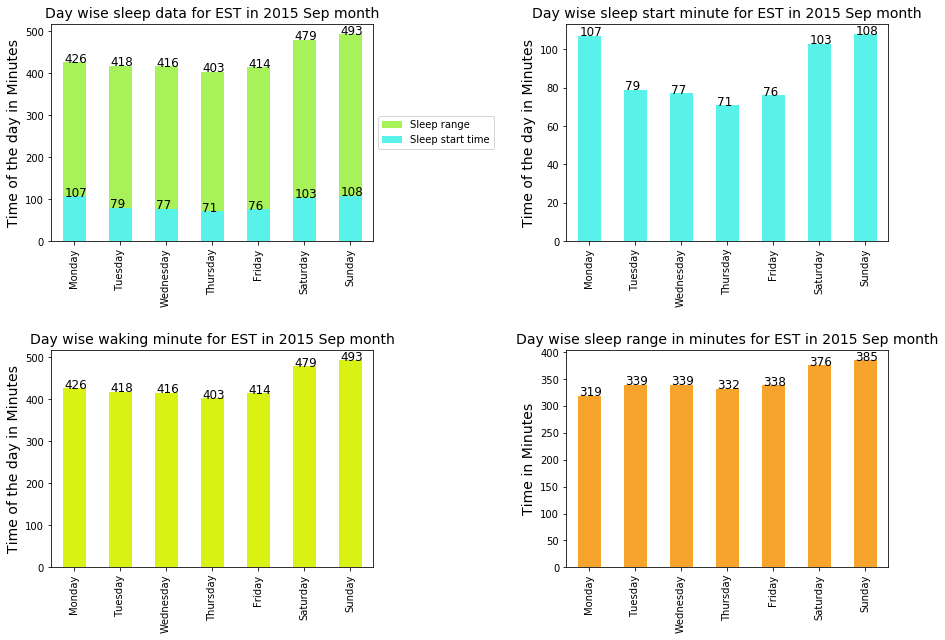

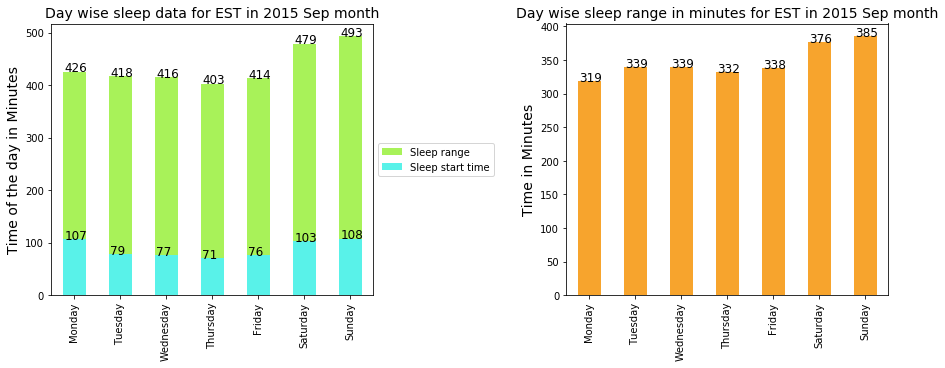

In [135]:
WeekgroupDF = EST_America_New_York.groupby('dayofweek')

Monday = WeekgroupDF.get_group(0)
Monday = Monday.reset_index(drop=True)

Tuesday = WeekgroupDF.get_group(1)
Tuesday = Tuesday.reset_index(drop=True)

Wednesday = WeekgroupDF.get_group(2)
Wednesday = Wednesday.reset_index(drop=True)

Thursday = WeekgroupDF.get_group(3)
Thursday = Thursday.reset_index(drop=True)

Friday = WeekgroupDF.get_group(4)
Friday = Friday.reset_index(drop=True)

Saturday = WeekgroupDF.get_group(5)
Saturday = Saturday.reset_index(drop=True)

Sunday = WeekgroupDF.get_group(6)
Sunday = Sunday.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Monday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Monday")

sleep_list = sleeping_mins(Tuesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Tuesday")

sleep_list = sleeping_mins(Wednesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Wednesday")

sleep_list = sleeping_mins(Thursday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Thursday")

sleep_list = sleeping_mins(Friday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Friday")

sleep_list = sleeping_mins(Saturday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Saturday")

sleep_list = sleeping_mins(Sunday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Sunday") 

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 




fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Day wise sleep data for EST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep start minute for EST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Day wise waking minute for EST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Day wise sleep range in minutes for EST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()




fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Day wise sleep data for EST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep range in minutes for EST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()


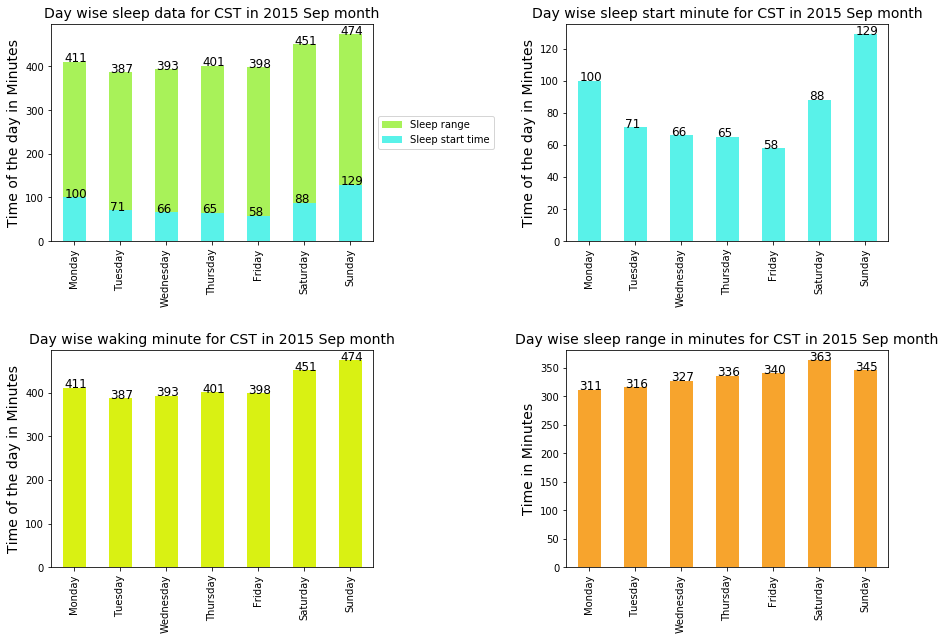

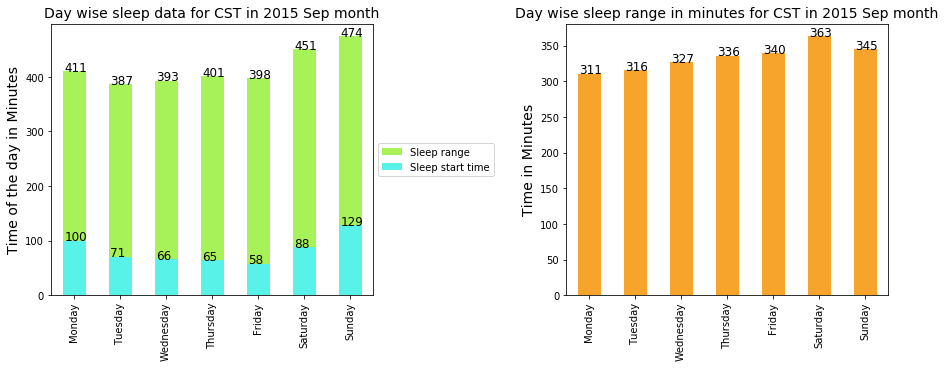

In [136]:
WeekgroupDF = CST_America_Chicago.groupby('dayofweek')

Monday = WeekgroupDF.get_group(0)
Monday = Monday.reset_index(drop=True)

Tuesday = WeekgroupDF.get_group(1)
Tuesday = Tuesday.reset_index(drop=True)

Wednesday = WeekgroupDF.get_group(2)
Wednesday = Wednesday.reset_index(drop=True)

Thursday = WeekgroupDF.get_group(3)
Thursday = Thursday.reset_index(drop=True)

Friday = WeekgroupDF.get_group(4)
Friday = Friday.reset_index(drop=True)

Saturday = WeekgroupDF.get_group(5)
Saturday = Saturday.reset_index(drop=True)

Sunday = WeekgroupDF.get_group(6)
Sunday = Sunday.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Monday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Monday")

sleep_list = sleeping_mins(Tuesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Tuesday")

sleep_list = sleeping_mins(Wednesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Wednesday")

sleep_list = sleeping_mins(Thursday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Thursday")

sleep_list = sleeping_mins(Friday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Friday")

sleep_list = sleeping_mins(Saturday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Saturday")

sleep_list = sleeping_mins(Sunday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Sunday") 

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 




fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Day wise sleep data for CST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep start minute for CST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Day wise waking minute for CST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Day wise sleep range in minutes for CST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Day wise sleep data for CST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep range in minutes for CST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()

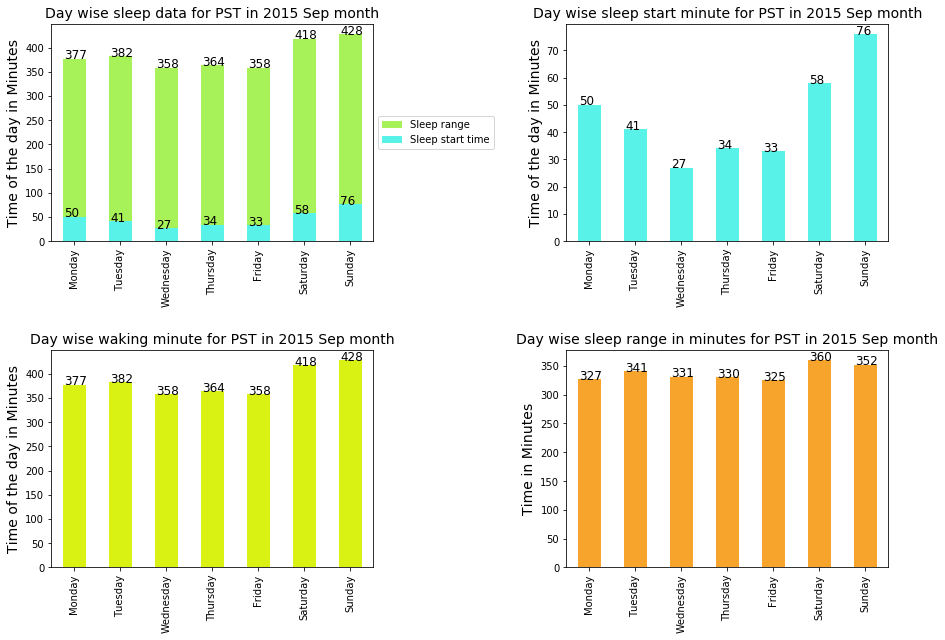

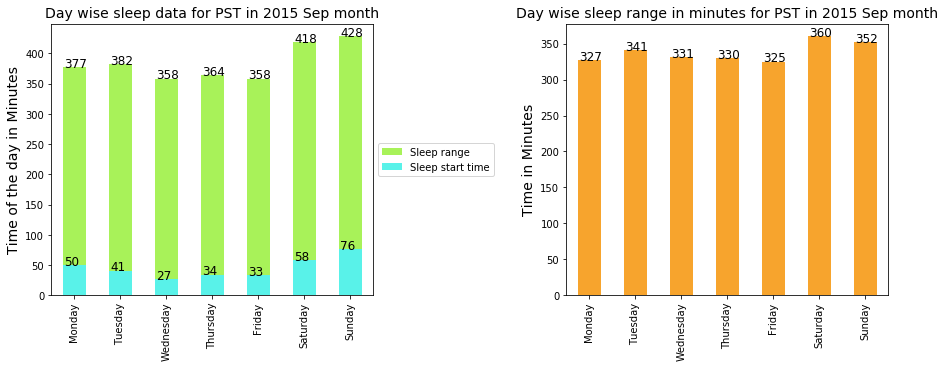

In [137]:
WeekgroupDF = PST_America_Los_Angeles.groupby('dayofweek')

Monday = WeekgroupDF.get_group(0)
Monday = Monday.reset_index(drop=True)

Tuesday = WeekgroupDF.get_group(1)
Tuesday = Tuesday.reset_index(drop=True)

Wednesday = WeekgroupDF.get_group(2)
Wednesday = Wednesday.reset_index(drop=True)

Thursday = WeekgroupDF.get_group(3)
Thursday = Thursday.reset_index(drop=True)

Friday = WeekgroupDF.get_group(4)
Friday = Friday.reset_index(drop=True)

Saturday = WeekgroupDF.get_group(5)
Saturday = Saturday.reset_index(drop=True)

Sunday = WeekgroupDF.get_group(6)
Sunday = Sunday.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Monday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Monday")

sleep_list = sleeping_mins(Tuesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Tuesday")

sleep_list = sleeping_mins(Wednesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Wednesday")

sleep_list = sleeping_mins(Thursday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Thursday")

sleep_list = sleeping_mins(Friday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Friday")

sleep_list = sleeping_mins(Saturday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Saturday")

sleep_list = sleeping_mins(Sunday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Sunday") 

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 




fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Day wise sleep data for PST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep start minute for PST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Day wise waking minute for PST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Day wise sleep range in minutes for PST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Day wise sleep data for PST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep range in minutes for PST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()


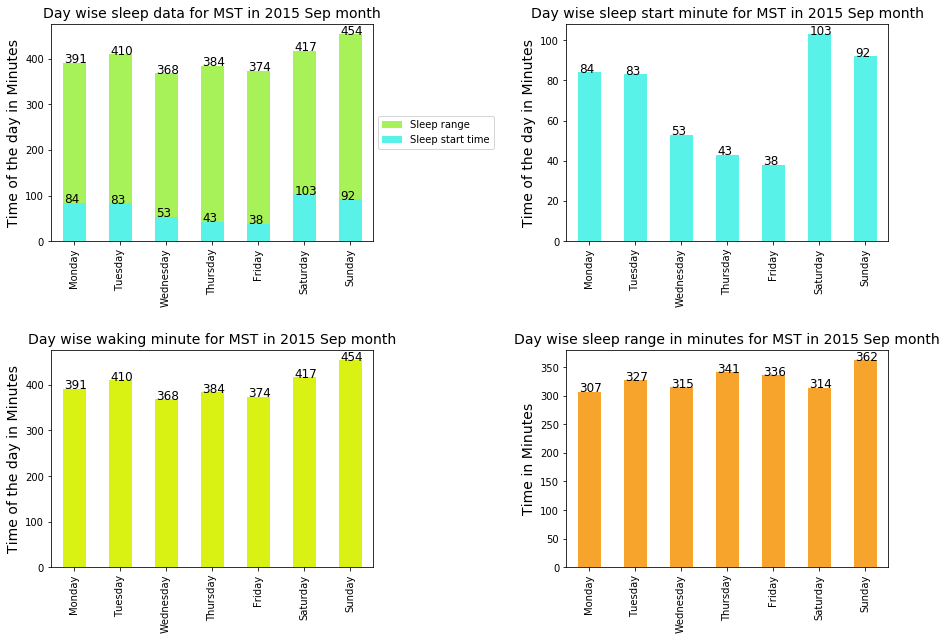

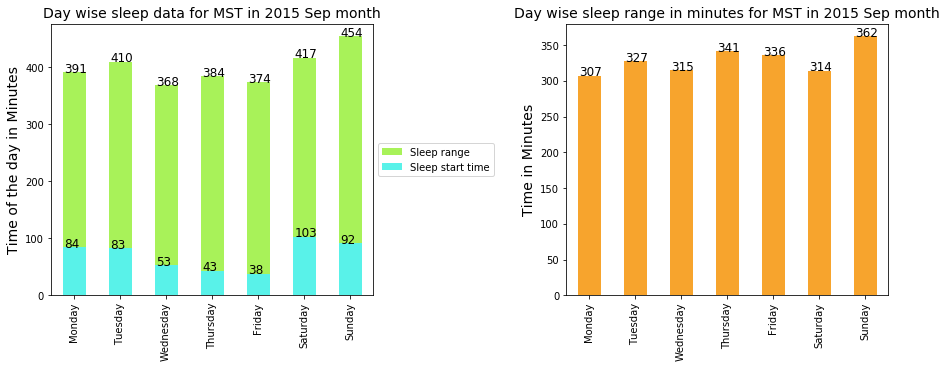

In [138]:
WeekgroupDF = MST_America_Denver.groupby('dayofweek')

Monday = WeekgroupDF.get_group(0)
Monday = Monday.reset_index(drop=True)

Tuesday = WeekgroupDF.get_group(1)
Tuesday = Tuesday.reset_index(drop=True)

Wednesday = WeekgroupDF.get_group(2)
Wednesday = Wednesday.reset_index(drop=True)

Thursday = WeekgroupDF.get_group(3)
Thursday = Thursday.reset_index(drop=True)

Friday = WeekgroupDF.get_group(4)
Friday = Friday.reset_index(drop=True)

Saturday = WeekgroupDF.get_group(5)
Saturday = Saturday.reset_index(drop=True)

Sunday = WeekgroupDF.get_group(6)
Sunday = Sunday.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Monday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Monday")

sleep_list = sleeping_mins(Tuesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Tuesday")

sleep_list = sleeping_mins(Wednesday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Wednesday")

sleep_list = sleeping_mins(Thursday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Thursday")

sleep_list = sleeping_mins(Friday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Friday")

sleep_list = sleeping_mins(Saturday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Saturday")

sleep_list = sleeping_mins(Sunday)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Sunday") 

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 



fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Day wise sleep data for MST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep start minute for MST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Day wise waking minute for MST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Day wise sleep range in minutes for MST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Day wise sleep data for MST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Day wise sleep range in minutes for MST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()

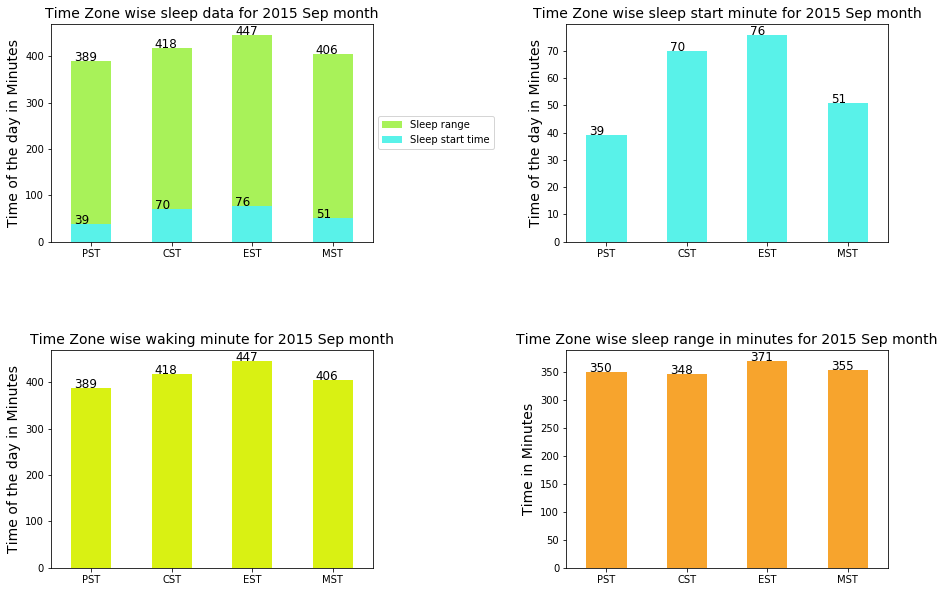

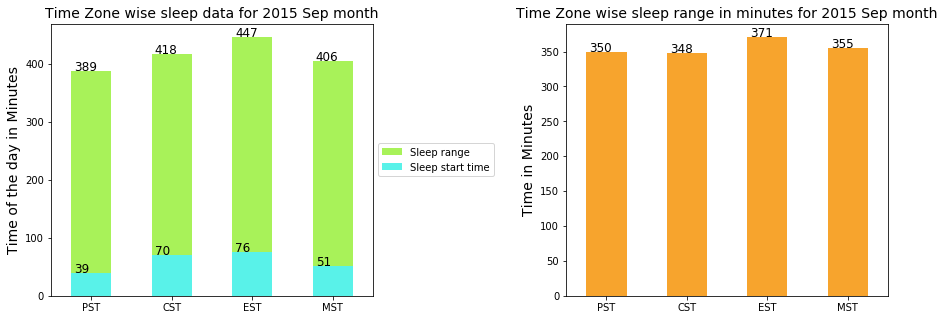

In [139]:
sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []


sleep_list = sleeping_mins(PST_America_Los_Angeles)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("PST")

sleep_list = sleeping_mins(CST_America_Chicago)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("CST") 

sleep_list = sleeping_mins(EST_America_New_York)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("EST")

sleep_list = sleeping_mins(MST_America_Denver)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("MST")

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location} 
  
df = pd.DataFrame(data) 
df 




fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Time Zone wise sleep data for 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 0)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Time Zone wise sleep start minute for 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 0)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Time Zone wise waking minute for 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 0)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Time Zone wise sleep range in minutes for 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 0)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()




fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
# ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Time Zone wise sleep data for 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 0)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Time Zone wise sleep range in minutes for 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 0)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()

In [140]:
sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []
location = []

print("Houston Timezone Sleeping Pattern")
sleep_list = sleeping_mins(houston_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Houston")
print("\n")


print("losangeles_df_us_data Timezone Sleeping Pattern")
sleep_list = sleeping_mins(losangeles_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Los Angeles") 
print("\n")


print("chicago_df_us_data Timezone Sleeping Pattern")
sleep_list = sleeping_mins(chicago_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Chicago")
print("\n")


print("atlanta_df_us_data Timezone Sleeping Pattern")
sleep_list = sleeping_mins(atlanta_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Atlanta")
print("\n")


print("lasvegas_df_us_data Timezone Sleeping Pattern")
sleep_list = sleeping_mins(lasvegas_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Las Vegas")
print("\n")


print("miami_df_us_data Timezone Sleeping Pattern")
sleep_list = sleeping_mins(miami_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Miami")
print("\n")


print("phoenix_df_us_data Timezone Sleeping Pattern")
sleep_list = sleeping_mins(phoenix_df_us_data)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Phoenix")
print("\n")

data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 'sleep_location':sleep_location} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 



Houston Timezone Sleeping Pattern


losangeles_df_us_data Timezone Sleeping Pattern


chicago_df_us_data Timezone Sleeping Pattern


atlanta_df_us_data Timezone Sleeping Pattern


lasvegas_df_us_data Timezone Sleeping Pattern


miami_df_us_data Timezone Sleeping Pattern


phoenix_df_us_data Timezone Sleeping Pattern




sleep_start_min  sleep_range  sleep_range_min sleep_location
0               95          418              323        Houston
1               57          394              337    Los Angeles
2               81          418              337        Chicago
3              107          468              361        Atlanta
4               48          386              338      Las Vegas
5              129          419              290          Miami
6               41          358              317        Phoenix

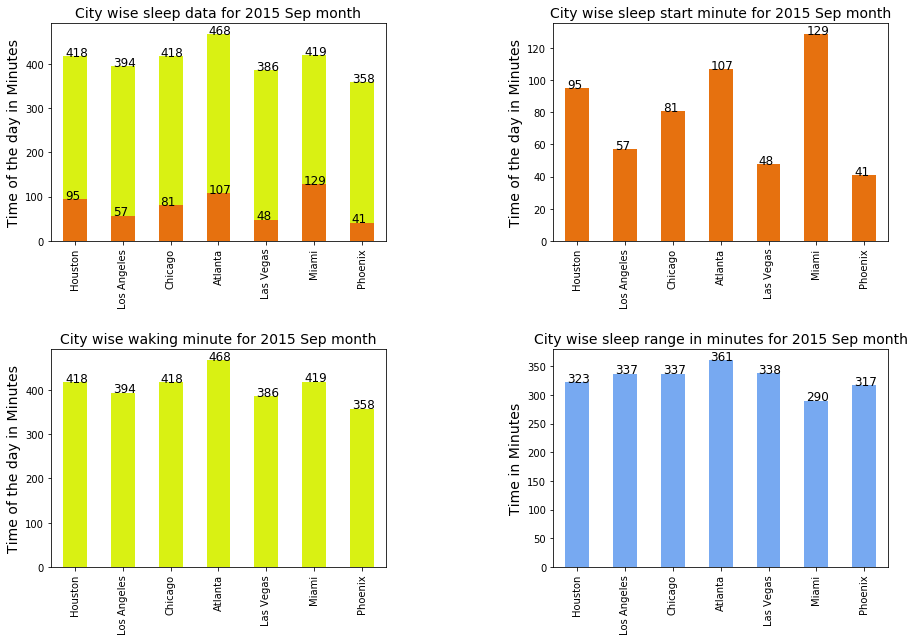

In [141]:
fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


# ax1 = df.plot(kind='bar', fontsize=13, ax=ax1, stacked=True);
ax1 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#E6710F", fontsize=10, ax=ax1);
# ax1 = df.loc[:,['sleep_start_min','sleep_range']].plot.bar(stacked=True, ax=ax1, color = ["#E6710F", "#77A9F1"])

ax1.set_title("City wise sleep data for 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
# ax1.set_xticks(df.sleep_location
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax2 = df.sleep_start_min.plot(kind='bar', color="#E6710F", fontsize=10, ax=ax2);
ax2.set_title("City wise sleep start minute for 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("City wise waking minute for 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#77A9F1", fontsize=10, ax=ax4);
ax4.set_title("City wise sleep range in minutes for 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.5 ,hspace=.5)

plt.show()

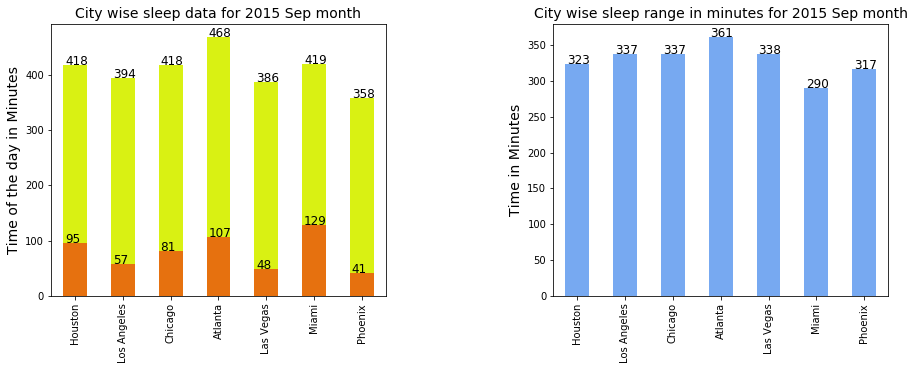

In [142]:
fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


# ax1 = df.plot(kind='bar', fontsize=13, ax=ax1, stacked=True);
ax1 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#E6710F", fontsize=10, ax=ax1);
# ax1 = df.loc[:,['sleep_start_min','sleep_range']].plot.bar(stacked=True, ax=ax1, color = ["#E6710F", "#77A9F1"])
ax1.set_title("City wise sleep data for 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
# ax1.set_xticks(df.sleep_location
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax2 = df.sleep_range_min.plot(kind='bar', color="#77A9F1", fontsize=10, ax=ax2);
ax2.set_title("City wise sleep range in minutes for 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.5 ,hspace=.5)

plt.show()

In [143]:
def getmonth(data):
    week = 10
    if(data[24] == 9):
        week = int(data[26]/7)
    return week

In [144]:
PST_America_Los_Angeles['week'] = PST_America_Los_Angeles.apply(getmonth, axis =1)
CST_America_Chicago['week'] = CST_America_Chicago.apply(getmonth, axis =1)
MST_America_Denver['week'] = MST_America_Denver.apply(getmonth, axis =1)
PST_America_Los_Angeles['week'] = PST_America_Los_Angeles.apply(getmonth, axis =1)
EST_America_New_York['week'] = EST_America_New_York.apply(getmonth, axis =1)

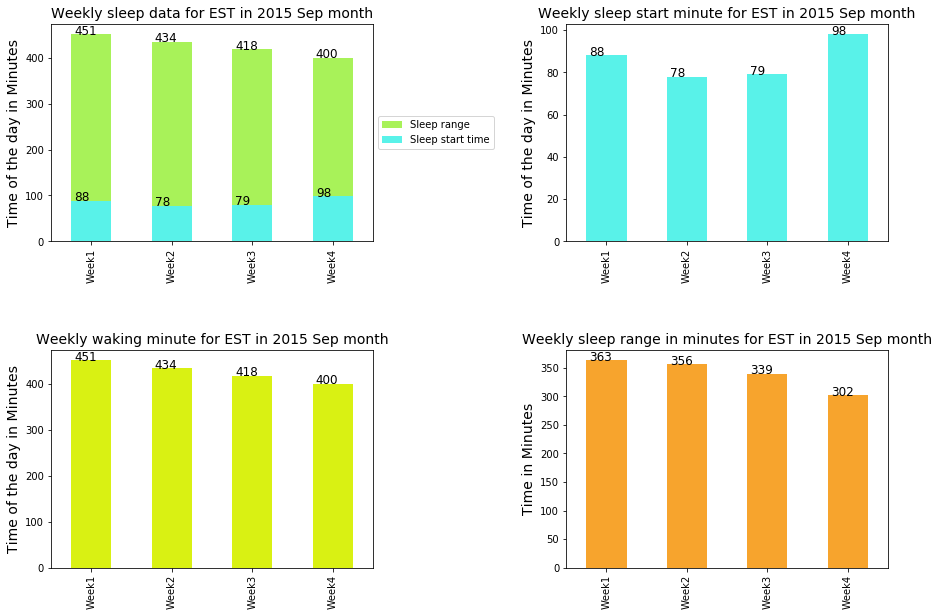

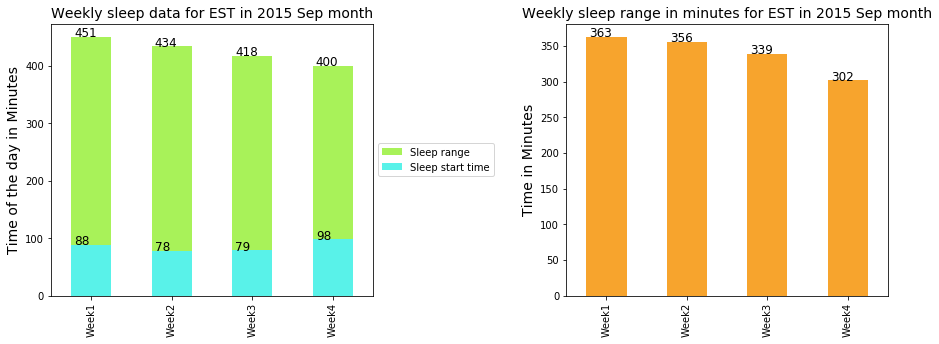

In [145]:
WeekDF = EST_America_New_York.groupby('week')

Week1 = WeekDF.get_group(1)
Week1 = Week1.reset_index(drop=True)

Week2 = WeekDF.get_group(2)
Week2 = Week2.reset_index(drop=True)

Week3 = WeekDF.get_group(3)
Week3 = Week3.reset_index(drop=True)

Week4 = WeekDF.get_group(4)
Week4 = Week4.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Week1)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week1")

sleep_list = sleeping_mins(Week2)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week2")

sleep_list = sleeping_mins(Week3)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week3")

sleep_list = sleeping_mins(Week4)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week4")


data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 



fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Weekly sleep data for EST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep start minute for EST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Weekly waking minute for EST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Weekly sleep range in minutes for EST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Weekly sleep data for EST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep range in minutes for EST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()


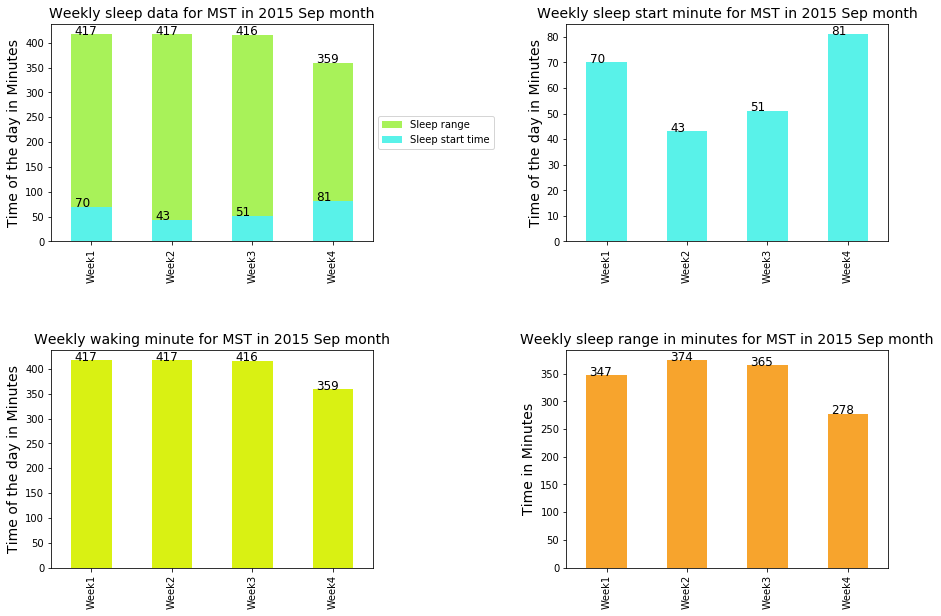

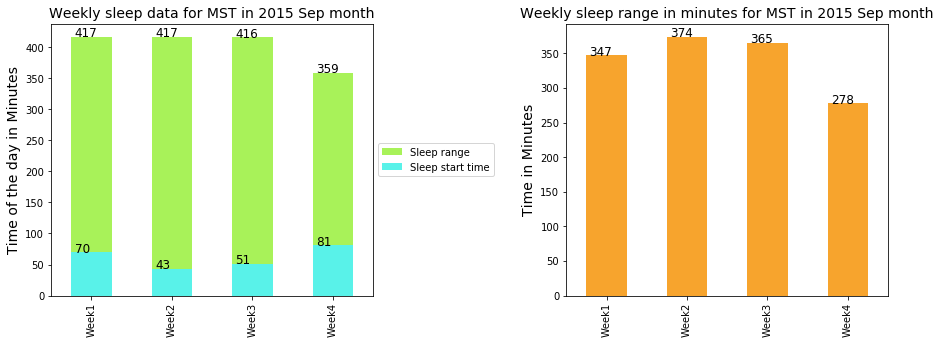

In [146]:
WeekDF = MST_America_Denver.groupby('week')

Week1 = WeekDF.get_group(1)
Week1 = Week1.reset_index(drop=True)

Week2 = WeekDF.get_group(2)
Week2 = Week2.reset_index(drop=True)

Week3 = WeekDF.get_group(3)
Week3 = Week3.reset_index(drop=True)

Week4 = WeekDF.get_group(4)
Week4 = Week4.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Week1)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week1")

sleep_list = sleeping_mins(Week2)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week2")

sleep_list = sleeping_mins(Week3)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week3")

sleep_list = sleeping_mins(Week4)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week4")


data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 



fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Weekly sleep data for MST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep start minute for MST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Weekly waking minute for MST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Weekly sleep range in minutes for MST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Weekly sleep data for MST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep range in minutes for MST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()


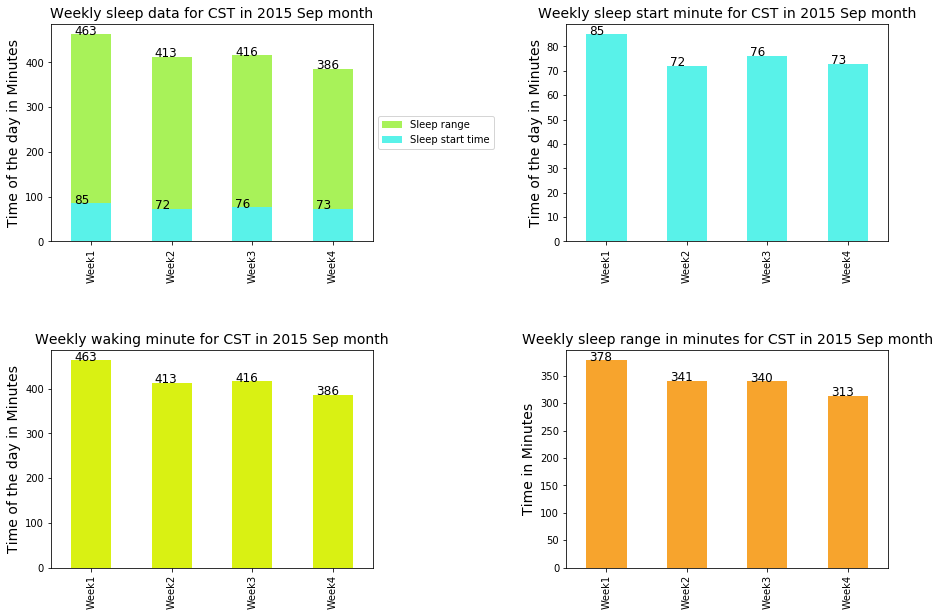

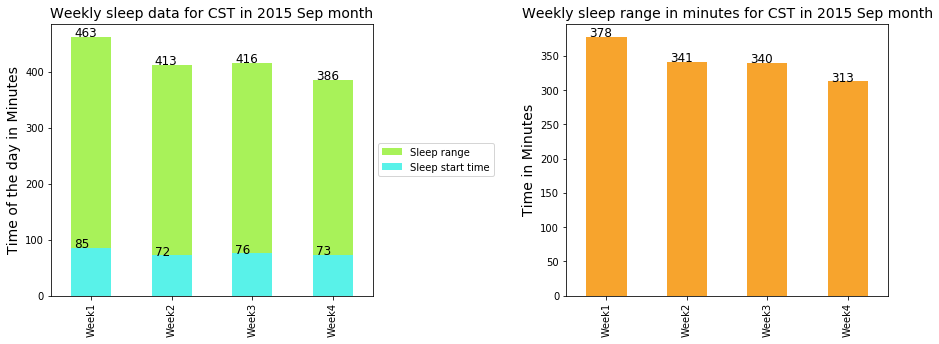

In [147]:
WeekDF = CST_America_Chicago.groupby('week')

Week1 = WeekDF.get_group(1)
Week1 = Week1.reset_index(drop=True)

Week2 = WeekDF.get_group(2)
Week2 = Week2.reset_index(drop=True)

Week3 = WeekDF.get_group(3)
Week3 = Week3.reset_index(drop=True)

Week4 = WeekDF.get_group(4)
Week4 = Week4.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Week1)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week1")

sleep_list = sleeping_mins(Week2)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week2")

sleep_list = sleeping_mins(Week3)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week3")

sleep_list = sleeping_mins(Week4)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week4")


data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 



fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Weekly sleep data for CST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep start minute for CST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Weekly waking minute for CST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Weekly sleep range in minutes for CST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Weekly sleep data for CST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep range in minutes for CST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()

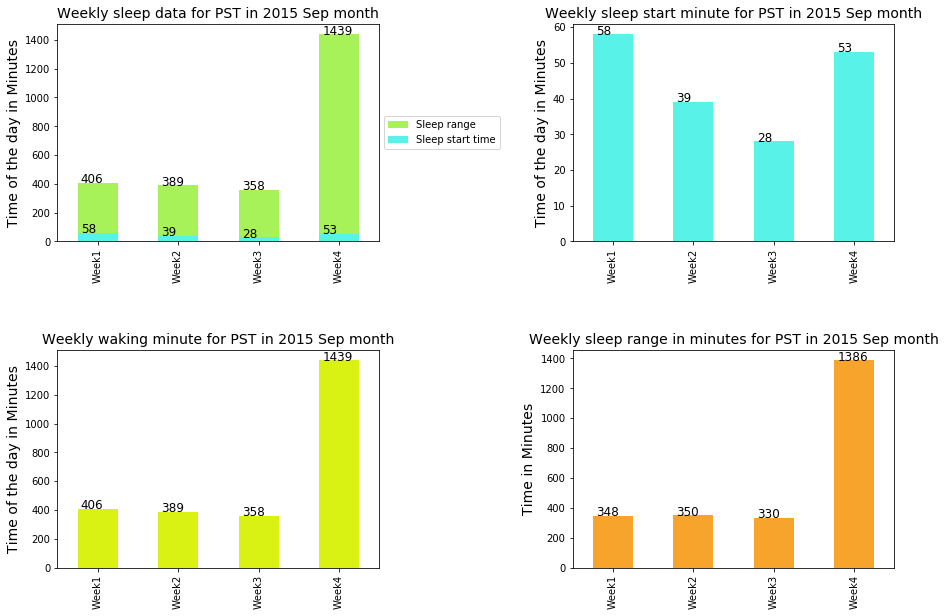

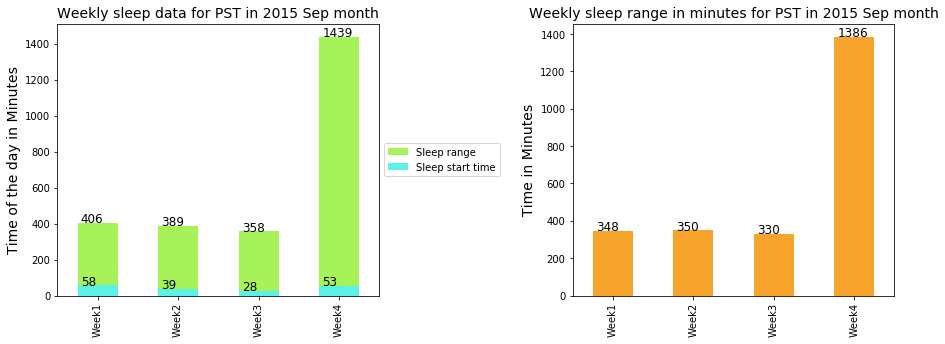

In [148]:
WeekDF = PST_America_Los_Angeles.groupby('week')

Week1 = WeekDF.get_group(1)
Week1 = Week1.reset_index(drop=True)

Week2 = WeekDF.get_group(2)
Week2 = Week2.reset_index(drop=True)

Week3 = WeekDF.get_group(3)
Week3 = Week3.reset_index(drop=True)

Week4 = WeekDF.get_group(4)
Week4 = Week4.reset_index(drop=True)



sleep_start_min = []
sleep_end_min = []
sleep_range_min = []
sleep_location = []

sleep_list = sleeping_mins(Week1)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week1")

sleep_list = sleeping_mins(Week2)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week2")

sleep_list = sleeping_mins(Week3)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week3")

sleep_list = sleeping_mins(Week4)
sleep_start_min.append(sleep_list[0])
sleep_end_min.append(sleep_list[1]) 
sleep_range_min.append(sleep_list[2])
sleep_location.append("Week4")


data = {'sleep_start_min':sleep_start_min, 'sleep_range':sleep_end_min, 'sleep_range_min':sleep_range_min, 
        'sleep_location':sleep_location}  
df = pd.DataFrame(data) 
df 



fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=2)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);

ax1.set_title("Weekly sleep data for PST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep start minute for PST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time of the day in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax3 = df.sleep_range.plot(kind='bar', color="#D9F113", fontsize=10, ax=ax3);
ax3.set_title("Weekly waking minute for PST in 2015 Sep month", fontsize=14)
ax3.set_ylabel("Time of the day in Minutes", fontsize=14);
ax3.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

ax4 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax4);
ax4.set_title("Weekly sleep range in minutes for PST in 2015 Sep month", fontsize=14)
ax4.set_ylabel("Time in Minutes", fontsize=14);
ax4.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax3.patches:
    ax3.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax4.patches:
    ax4.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)

plt.show()








fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1 = df.sleep_range.plot(kind='bar', color="#A8F259", fontsize=10, ax=ax1);
ax1 = df.sleep_start_min.plot(kind='bar', color="#59F2E9", fontsize=10, ax=ax1);
ax1.set_title("Weekly sleep data for PST in 2015 Sep month", fontsize=14)
ax1.set_ylabel("Time of the day in Minutes", fontsize=14);
ax1.xaxis.set_ticklabels(df.sleep_location, rotation = 90)
patches, labels = ax1.get_legend_handles_labels()
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(patches, ["Sleep range", "Sleep start time"], loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = df.sleep_range_min.plot(kind='bar', color="#F7A42D", fontsize=10, ax=ax2);
ax2.set_title("Weekly sleep range in minutes for PST in 2015 Sep month", fontsize=14)
ax2.set_ylabel("Time in Minutes", fontsize=14);
ax2.xaxis.set_ticklabels(df.sleep_location, rotation = 90)

for i in ax1.patches:
    ax1.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

for i in ax2.patches:
    ax2.text(i.get_x()+.04, i.get_height(), str(round((i.get_height()), 2)), fontsize=12, color='black')

fig.subplots_adjust(wspace = 0.6 ,hspace=.5)


plt.show()

In [149]:
data = {'Hour':hr_mst, 'Hr_Tweets':tweets_hr_mst}  
mst_Zone_hr_df = pd.DataFrame(data) 

data = {'Hour':hr_pst, 'Hr_Tweets':tweets_hr_pst}  
pst_Zone_hr_df= pd.DataFrame(data) 

data = {'Hour':hr_est, 'Hr_Tweets':tweets_hr_est}  
est_Zone_hr_df = pd.DataFrame(data) 

data = {'Hour':hr_cst, 'Hr_Tweets':tweets_hr_cst}
cst_Zone_hr_df = pd.DataFrame(data) 



data = {'Minutes':min_mst, 'Mn_Tweets':tweets_min_mst}  
mst_Zone_mn_df = pd.DataFrame(data) 

data = {'Minutes':min_pst, 'Mn_Tweets':tweets_min_pst}  
pst_Zone_mn_df = pd.DataFrame(data) 

data = {'Minutes':min_est, 'Mn_Tweets':tweets_min_est}  
est_Zone_mn_df = pd.DataFrame(data) 

data = {'Minutes':min_cst, 'Mn_Tweets':tweets_min_mst}  
cst_Zone_mn_df = pd.DataFrame(data) 


mst_Zone_hr_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/mst_Zone_hr_df.csv',index=False);
pst_Zone_hr_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/pst_Zone_hr_df',index=False);
est_Zone_hr_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/est_Zone_hr_df',index=False);
cst_Zone_hr_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/cst_Zone_hr_df',index=False);


mst_Zone_mn_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/mst_Zone_mn_df',index=False);
pst_Zone_mn_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/pst_Zone_mn_df',index=False);
est_Zone_mn_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/est_Zone_mn_df',index=False);
cst_Zone_mn_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/cst_Zone_mn_df',index=False);


City_df = pd.concat([houston_df_us_data, phoenix_df_us_data, miami_df_us_data,
                lasvegas_df_us_data, atlanta_df_us_data, chicago_df_us_data, losangeles_df_us_data], ignore_index=True)

City_df.to_csv('/Users/rajesh/Desktop/DSF_CSV/SEP/City_df_SEP.csv',index=False);
